<a href="https://colab.research.google.com/github/Customer-Analytic-Application/integrated-automl-framework/blob/main/Customer_Churn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hardware specifications of the colab Notebook

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   27G   82G  25% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /usr/sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        70G   44G   26G  64% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

# Importing the pre-requisites

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#installing H2O AutoML
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=60a0a44ff571eb7ee6b8345a440d25f9f0edb9b44e21b23da4b87aaa242f143c
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [ ]:
import h2o

In [ ]:
#Starts the H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb5mpng1g
  JVM stdout: /tmp/tmpb5mpng1g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb5mpng1g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_05pivb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [ ]:
from h2o.automl import H2OAutoML
from h2o.estimators import H2OKMeansEstimator, H2OInfogram

# Exploratory Data Analysis

In [ ]:
df_data = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_data.shape

(7043, 21)

In [ ]:
df_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in the dataset

([<matplotlib.patches.Wedge at 0x7f3d2c904c70>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')])

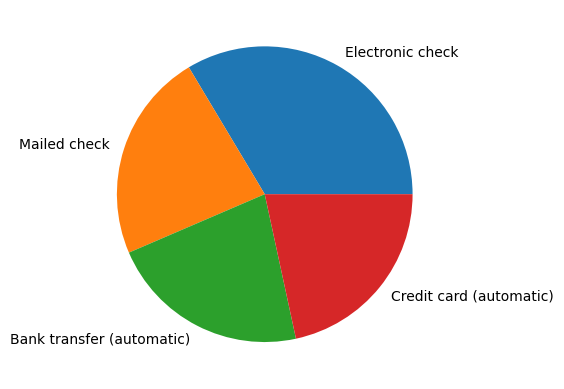

In [ ]:
plt.pie(list(df_data['PaymentMethod'].value_counts()), labels = df_data['PaymentMethod'].unique())

In [ ]:
df_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

tenure and MonthlyCharges are the only numerical features present in the dataset, Converting TotalCharges to numerical data

In [ ]:
df_data['TotalCharges'] = df_data['TotalCharges'].str.strip()
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'])

In [ ]:
numerical_data = df_data[['tenure','MonthlyCharges', 'TotalCharges']]

In [ ]:
from sklearn import preprocessing

x = numerical_data.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
scaled_num_data = pd.DataFrame(x_scaled, columns = numerical_data.columns)

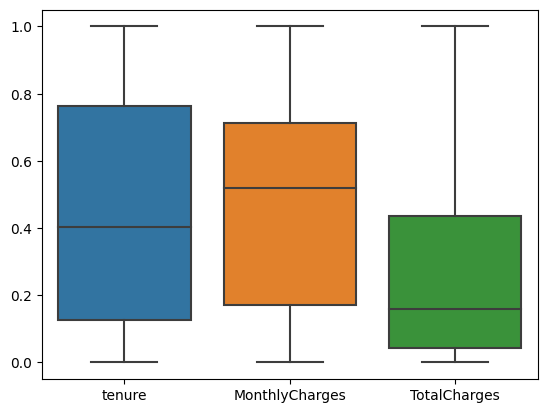

In [ ]:
box_plot_1 = sns.boxplot(data = scaled_num_data[["tenure", "MonthlyCharges", "TotalCharges"]])

In [ ]:
heatmap_data = df_data.drop(['customerID', 'Churn'], axis=1)
heatmap_data_copy = heatmap_data

In [ ]:
heatmap_data_copy.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [ ]:
encoder = preprocessing.LabelEncoder()
cat_data = heatmap_data_copy.select_dtypes(include=object)

In [ ]:
cat_data = cat_data.apply(encoder.fit_transform)

In [ ]:
heatmap_data_copy[cat_data.columns] = cat_data
heatmap_data_copy

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              3           84.80       1990.50  
7039                 1              1          103.20       7362.90  
7040                 1              2           29.60        346.45  
7041                 1              3           74.40        306.60  
7042                 1              0          105.65       6844.50  

[7043 rows x 19 columns]

# Churn Data Preprocessing and H2O model training (Using the given dataset without data preprocessing)

In [ ]:
churn_df = h2o.import_file("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
churn_df.describe()

Rows:7043
Cols:21

customerID    gender    SeniorCitizen       Partner    Dependents    tenure              PhoneService    MultipleLines     InternetService    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport    StreamingTV    StreamingMovies    Contract        PaperlessBilling    PaymentMethod              MonthlyCharges      TotalCharges       Churn
-------  ------------  --------  ------------------  ---------  ------------  ------------------  --------------  ----------------  -----------------  ----------------  --------------  ------------------  -------------  -------------  -----------------  --------------  ------------------  -------------------------  ------------------  -----------------  -------
type     string        enum      int                 enum       enum          int                 enum            enum              enum               enum              enum            enum                enum           enum           enum               enum            enum                enum                       real                real               enum
mins     NaN                     0.0                                          0.0                                                                                                                                                                                                                                            18.25               18.8
mean     NaN                     0.1621468124378816                           32.37114865824223                                                                                                                                                                                                                              64.76169246059916   2283.300440841865
maxs     NaN                     1.0                                          72.0                                                                                                                                                                                                                                           118.75              8684.8
sigma    NaN                     0.3686116056100131                           24.559481023094456                                                                                                                                                                                                                             30.090047097678482  2266.771361883145
zeros    0                       5901                                         11                                                                                                                                                                                                                                             0                   0
missing  0             0         0                   0          0             0                   0               0                 0                  0                 0               0                   0              0              0                  0               0                   0                          0                   11                 0
0        7590-VHVEG    Female    0.0                 Yes        No            1.0                 No              No phone service  DSL                No                Yes             No                  No             No             No                 Month-to-month  Yes                 Electronic check           29.85               29.85              No
1        5575-GNVDE    Male      0.0                 No         No            34.0                Yes             No                DSL                Yes               No              Yes                 No             No             No                 One year        No                  Mailed check               56.95               1889.5             No
2        3668-QPYBK    Male      0.0                 No         No            2.0                 Yes          

In [ ]:
#taking the test, train and validation data respectively
churn_train, churn_test, churn_valid = churn_df.split_frame(ratios = [.7, .15])

In [ ]:
print("training set shape: ", churn_train.shape)
print("test set shape: ", churn_test.shape)
print("validation set shape: ", churn_valid.shape)

training set shape:  (4983, 21)
test set shape:  (992, 21)
validation set shape:  (1068, 21)


In [ ]:
auto_model = H2OAutoML(max_models = 10, seed = 10, exclude_algos= ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds = 0)
#use a maximum of 10 models-the more models the more time consuming it is
#exclude_algos disables the alogs mentioned in it
#nfolds takes the number of folds that is required to perform k-fold cross validation, took zero as we have a validation dataset, by default takes 5 

In [ ]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
auto_model.train(x = x, y = y, training_frame = churn_train, validation_frame = churn_valid)

AutoML progress: |
08:38:18.113: Project: AutoML_1_20230330_83818
08:38:18.115: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:38:18.119: Setting stopping tolerance adaptively based on the training frame: 0.014166238734668348
08:38:18.120: Build control seed: 10
08:38:18.121: training frame: Frame key: AutoML_1_20230330_83818_training_py_2_sid_b01e    cols: 21    rows: 4983  chunks: 8    size: 268026  checksum: 7618811302832231675
08:38:18.121: validation frame: Frame key: py_4_sid_b01e    cols: 21    rows: 1068  chunks: 8    size: 139345  checksum: 7690955687600769119
08:38:18.121: leaderboard frame: Frame key: py_4_sid_b01e    cols: 21    rows: 1068  chunks: 8    size: 139345  checksum: 7690955687600769119
08:38:18.121: blending frame: NULL
08:38:18.121: response column: Churn
08:38:18.122: fold column: null
08:38:18.122: weights column: null
08:38:18.167: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230330_83818


GLM Model: summary
    family    link    regularization             lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.0194 )  nlambda = 30, lambda.max = 15.284, lambda.min = 0.0194, lambda.1se = -1.0  45                            45                             30                      AutoML_1_20230330_83818_training_py_2_sid_b01e

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13392641178528347
RMSE: 0.3659595767093457
LogLoss: 0.4132939016349001
AUC: 0.8491032354668718
AUCPR: 0.6702507295039196
Gini: 0.6982064709337437
Null degrees of freedom: 4982
Residual degrees of freedom: 4937
Null deviance: 5761.5508400226245
Residual deviance: 4118.887023693414
AIC: 4210.887023693414

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31612747104347294
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2885  778    0.2124   (778.0/3663.0)
Yes    333   987    0.2523   (333.0/1320.0)
Total  3218  1765   0.223    (1111.0/4983.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.316127     0.63987   209
max f2                       0.125145     0.7497    310
max f0point5                 0.508049     0.642666  123
max accuracy                 0.508049     0.80875   123
max precision                0.844881     1         0
max recall                   0.0164694    1         393
max specificity              0.844881     1         0
max absolute_mcc             0.316127     0.493929  209
max min_per_class_accuracy   0.297214     0.765152  218
max mean_per_class_accuracy  0.275459     0.771526  228
max tns                      0.844881     3663      0
max fns                      0.844881     1318      0
max fps                      0.0101822    3663      399
max tps                      0.0164694    1320      393
max tnr                      0.844881     1         0
max fnr                      0.844881     0.998485  0
max fpr                      0.0101822    1         399
max tpr                      0.0164694    1         393

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.49 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100341                   0.781151           3.5485     3.5485             0.94             0.804705   0.94                        0.804705            0.0356061       0.0356061                  254.85    254.85             0.0347871
2        0.0200682                   0.748917           3.473      3.51075            0.92             0.76382    0.93                        0.784263            0.0348485       0.0704545                  247.3     251.075            0.0685435
3        0.0301023                   0.733167           2.869      3.29683            0.76             0.740862   0.873333                    0.769796            0.0287879       0.0992424                  186.9     229.

In [ ]:
lb = auto_model.leaderboard 

In [ ]:
lb.head()

model_id                                auc    logloss     aucpr    mean_per_class_error      rmse       mse
---------------------------------  --------  ---------  --------  ----------------------  --------  --------
GLM_1_AutoML_1_20230330_83818      0.829093   0.430461  0.593217                0.233174  0.374116  0.139963
GBM_1_AutoML_1_20230330_83818      0.828379   0.432431  0.622503                0.252827  0.374724  0.140418
XGBoost_3_AutoML_1_20230330_83818  0.827377   0.443029  0.616456                0.250467  0.377009  0.142136
GBM_2_AutoML_1_20230330_83818      0.823113   0.443707  0.595259                0.256615  0.379182  0.143779
XRT_1_AutoML_1_20230330_83818      0.822898   0.437328  0.604602                0.25774   0.37681   0.141986
GBM_3_AutoML_1_20230330_83818      0.821544   0.448501  0.593821                0.25527   0.381987  0.145914
GBM_4_AutoML_1_20230330_83818      0.820673   0.452747  0.590937                0.243577  0.382138  0.14603
DRF_1_AutoML_1_20230330_83818      0.817697   0.482036  0.602177                0.266991  0.380598  0.144855
XGBoost_2_AutoML_1_20230330_83818  0.81516    0.479569  0.578009                0.256533  0.390482  0.152476
XGBoost_1_AutoML_1_20230330_83818  0.809796   0.471047  0.590008                0.276241  0.389334  0.151581
[10 rows x 7 columns]

In [ ]:
churn_pred = auto_model.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
auto_model.leader.model_performance(churn_test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14230338833623585
RMSE: 0.3772312133642123
LogLoss: 0.43719724645576447
AUC: 0.8334759815983738
AUCPR: 0.6426040146126655
Gini: 0.6669519631967475
Null degrees of freedom: 991
Residual degrees of freedom: 946
Null deviance: 1167.8505848074633
Residual deviance: 867.3993369682366
AIC: 959.3993369682366

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29122562586269446
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     547   172    0.2392   (172.0/719.0)
Yes    69    204    0.2527   (69.0/273.0)
Total  616   376    0.2429   (241.0/992.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.291226     0.628659  205
max f2                       0.117521     0.755375  304
max f0point5                 0.52356      0.648596  107
max accuracy                 0.52356      0.803427  107
max precision                0.838236     1         0
max recall                   0.0165532    1         392
max specificity              0.838236     1         0
max absolute_mcc             0.389327     0.478574  161
max min_per_class_accuracy   0.287828     0.750916  207
max mean_per_class_accuracy  0.200743     0.759077  255
max tns                      0.838236     719       0
max fns                      0.838236     272       0
max fps                      0.0103829    719       399
max tps                      0.0165532    273       392
max tnr                      0.838236     1         0
max fnr                      0.838236     0.996337  0
max fpr                      0.0103829    1         399
max tpr                      0.0165532    1         392

Gains/Lift Table: Avg response rate: 27.52 %, avg score: 26.74 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100806                   0.772299           2.90696    2.90696            0.8              0.802747   0.8                         0.802747            0.029304        0.029304                   190.696   190.696            0.0265224
2        0.0201613                   0.750197           3.6337     3.27033            1                0.758298   0.9                         0.780523            0.03663         0.0659341                  263.37    227.033            0.0631524
3        0.0302419                   0.737614           2.54359    3.02808            0.7              0.744554   0.833333                    0.768533            0.025641        0.0915751                  154.359   202.808            0.084621
4        0.0403226                   0.724665           2.18022    2.81612            0.6              0.732609   0.775                       0.759552            0.021978        0.113553                   118.022   181.612            0.101036
5        0.0504032                   0.712158           2.54359    2.76161            0.7              0.716818   0.76                        0.751005            0.025641        0.139194                   154.359   176.161            0.122504
6        0.100806                    0.629732           2.39824    2.57993            0.66             0.672856   0.71                        0.71193             0.120879        0.260073                   139.824   157.993            0.219739
7        0.150202                    0.575805           2.81797    2.65821            0.77551          0.599821   0.731544                    0

In [ ]:
churn_pred.head()

predict          No        Yes
---------  --------  ---------
Yes        0.346233  0.653767
No         0.831098  0.168902
No         0.713554  0.286446
Yes        0.423743  0.576257
No         0.978164  0.0218361
Yes        0.238159  0.761841
Yes        0.521608  0.478392
No         0.977927  0.0220733
No         0.653803  0.346197
No         0.662639  0.337361
[10 rows x 3 columns]

#Explainablity Interface for the H2O autoML model 

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
GBM_1_AutoML_1_20230330_83818      0.837878   0.43156   0.659145                0.232165  0.374101  0.139952                4584                   0.076506  GBM
GLM_1_AutoML_1_20230330_83818      0.833476   0.437197  0.642604                0.245984  0.377231  0.142303                1919                   0.022244  GLM
GBM_2_AutoML_1_20230330_83818      0.832113   0.440988  0.643053                0.246886  0.378586  0.143328                2146                   0.058193  GBM
GBM_3_AutoML_1_20230330_83818      0.831729   0.443418  0.641758                0.231559  0.381075  0.145218                3039                   0.091541  GBM
XGBoost_3_AutoML_1_20230330_83818  0.831107   0.445766  0.648218                0.250949  0.378835  0.143516                1874                   0.038848  XGBoost
XGBoost_1_AutoML_1_20230330_83818  0.826779   0.457395  0.623972                0.235945  0.384123  0.147551                3546                   0.025179  XGBoost
XRT_1_AutoML_1_20230330_83818      0.824909   0.445212  0.634416                0.246473  0.381     0.145161                4330                   0.073112  DRF
GBM_4_AutoML_1_20230330_83818      0.823595   0.461344  0.614849                0.25099   0.386937  0.14972                 2287                   0.063262  GBM
DRF_1_AutoML_1_20230330_83818      0.823231   0.544511  0.620771                0.243822  0.385064  0.148274                6594                   0.086098  DRF
XGBoost_2_AutoML_1_20230330_83818  0.814618   0.482067  0.613427                0.271164  0.392544  0.154091                3260                   0.03232   XGBoost
[10 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20230330_83818

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29122562586269446
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     547   172    0.2392   (172.0/719.0)
Yes    69    204    0.2527   (69.0/273.0)
Total  616   376    0.2429   (241.0/992.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

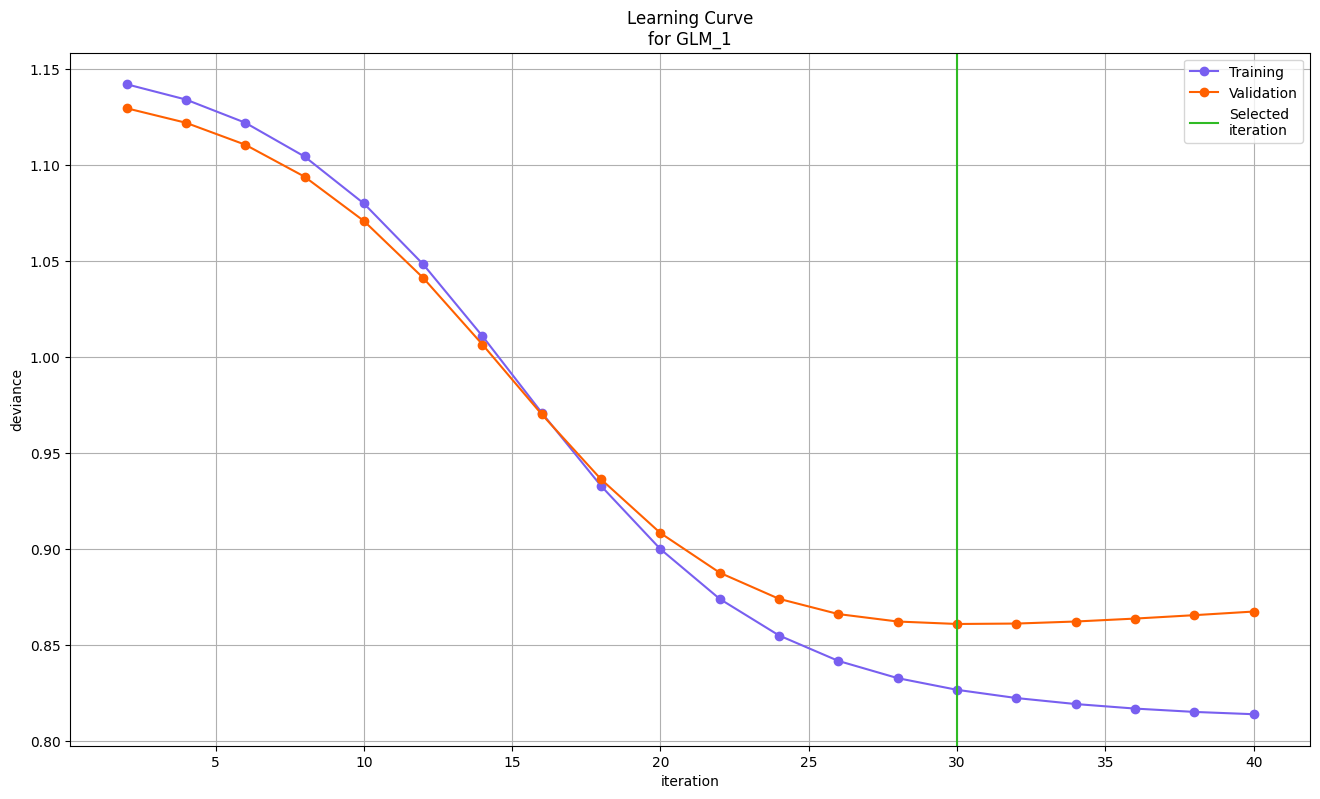

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

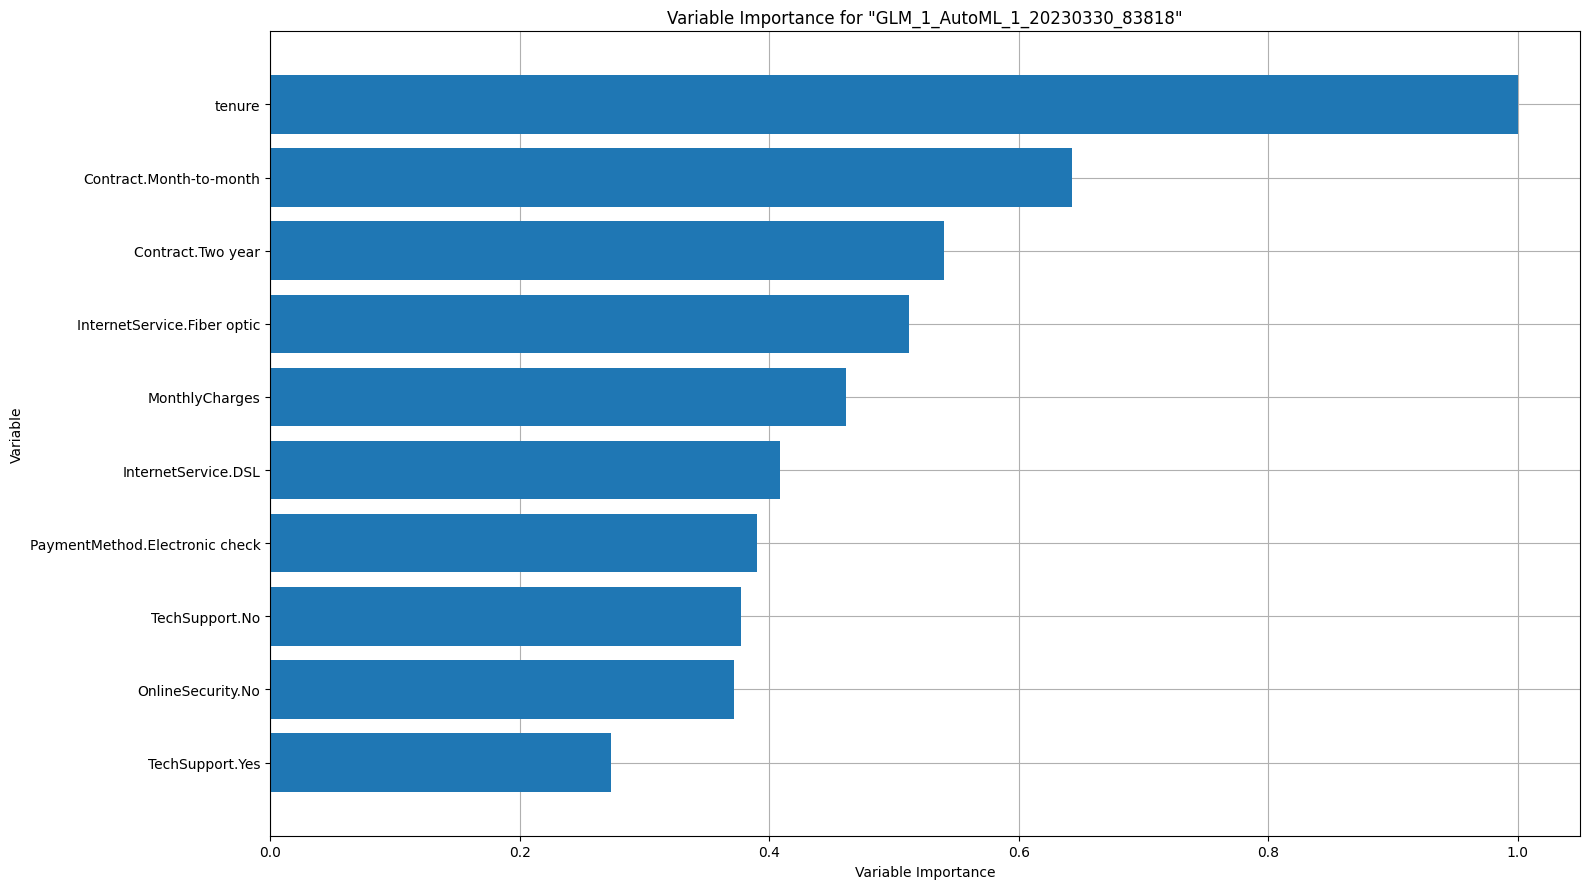

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

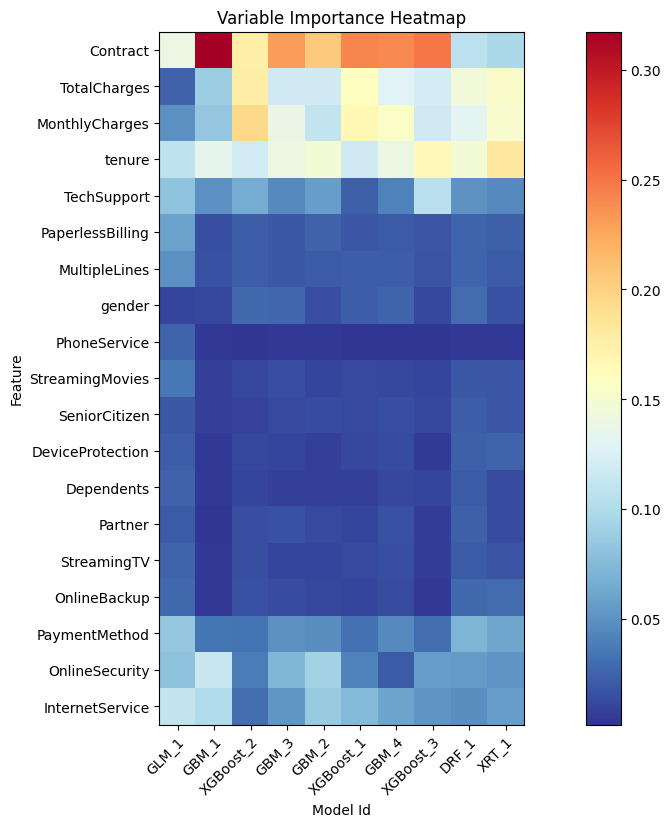

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

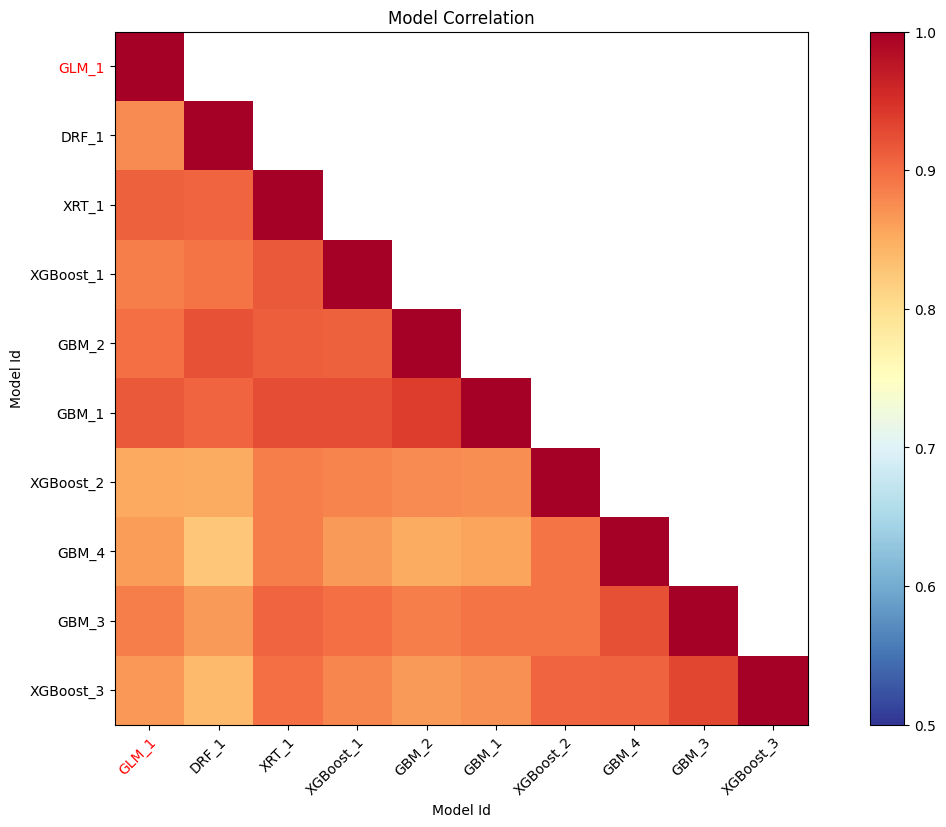

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

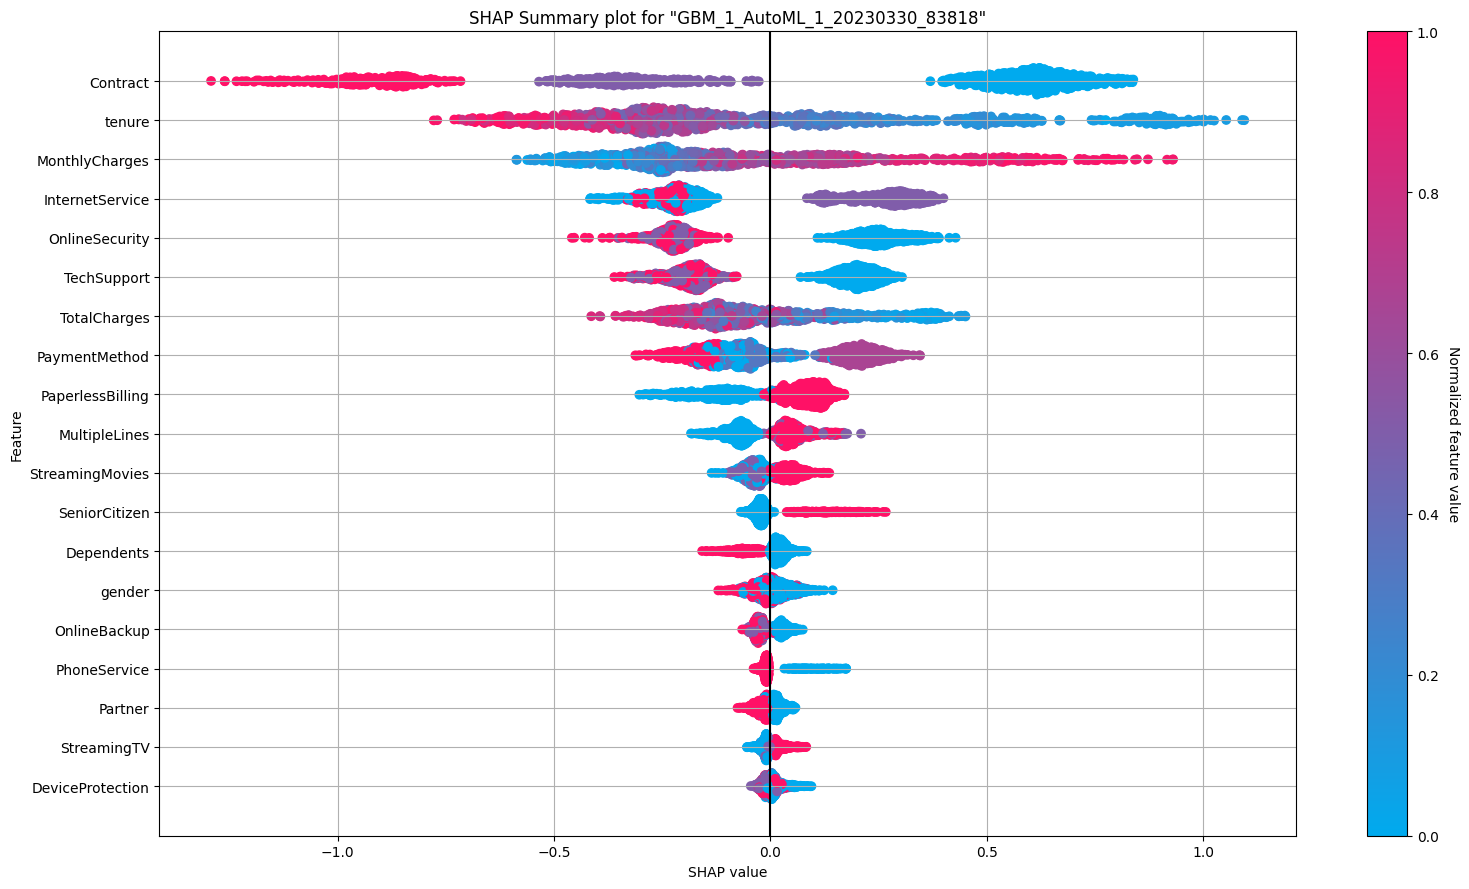

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

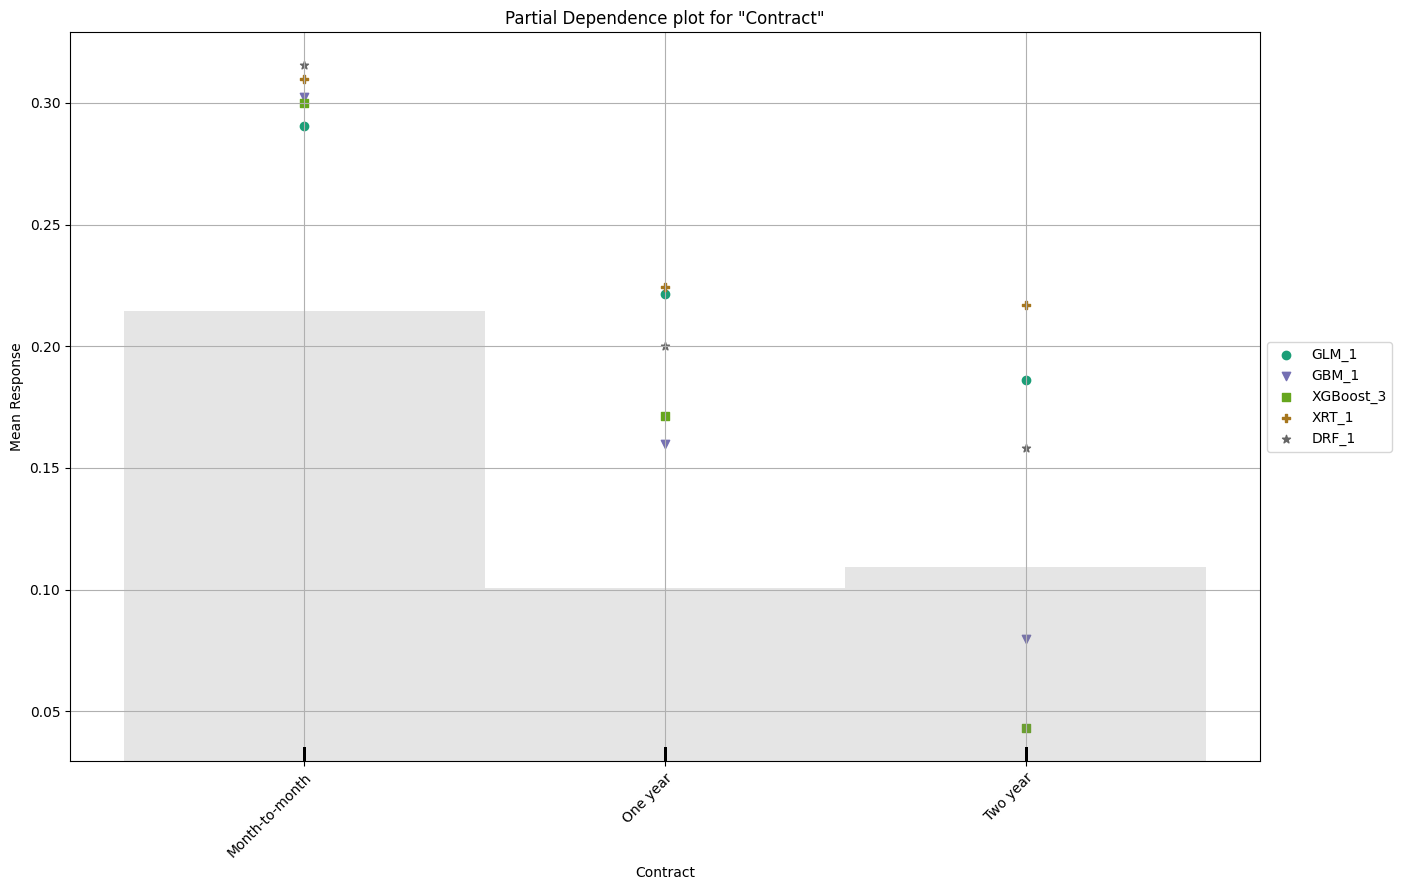

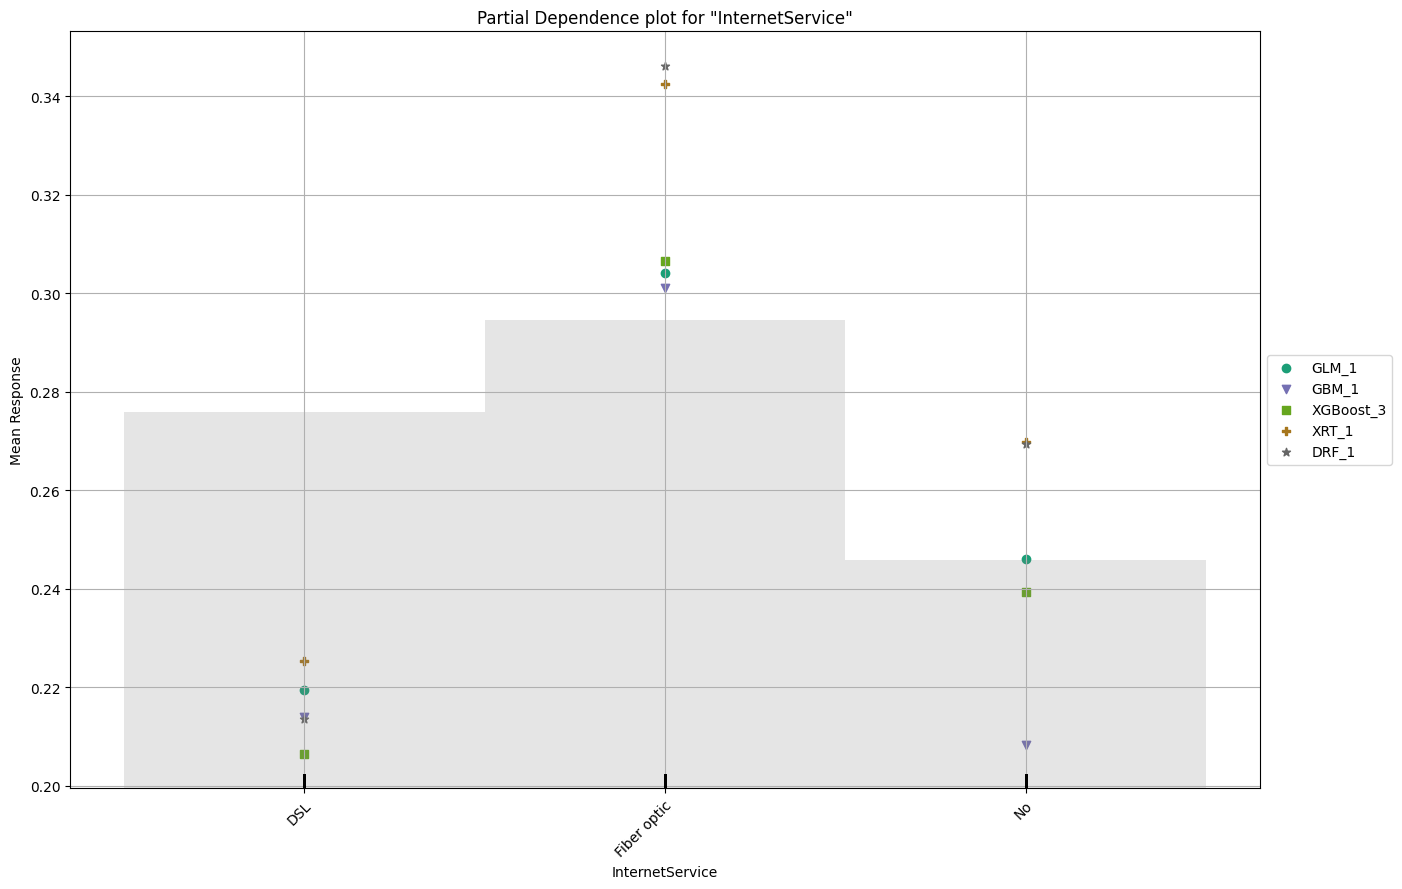

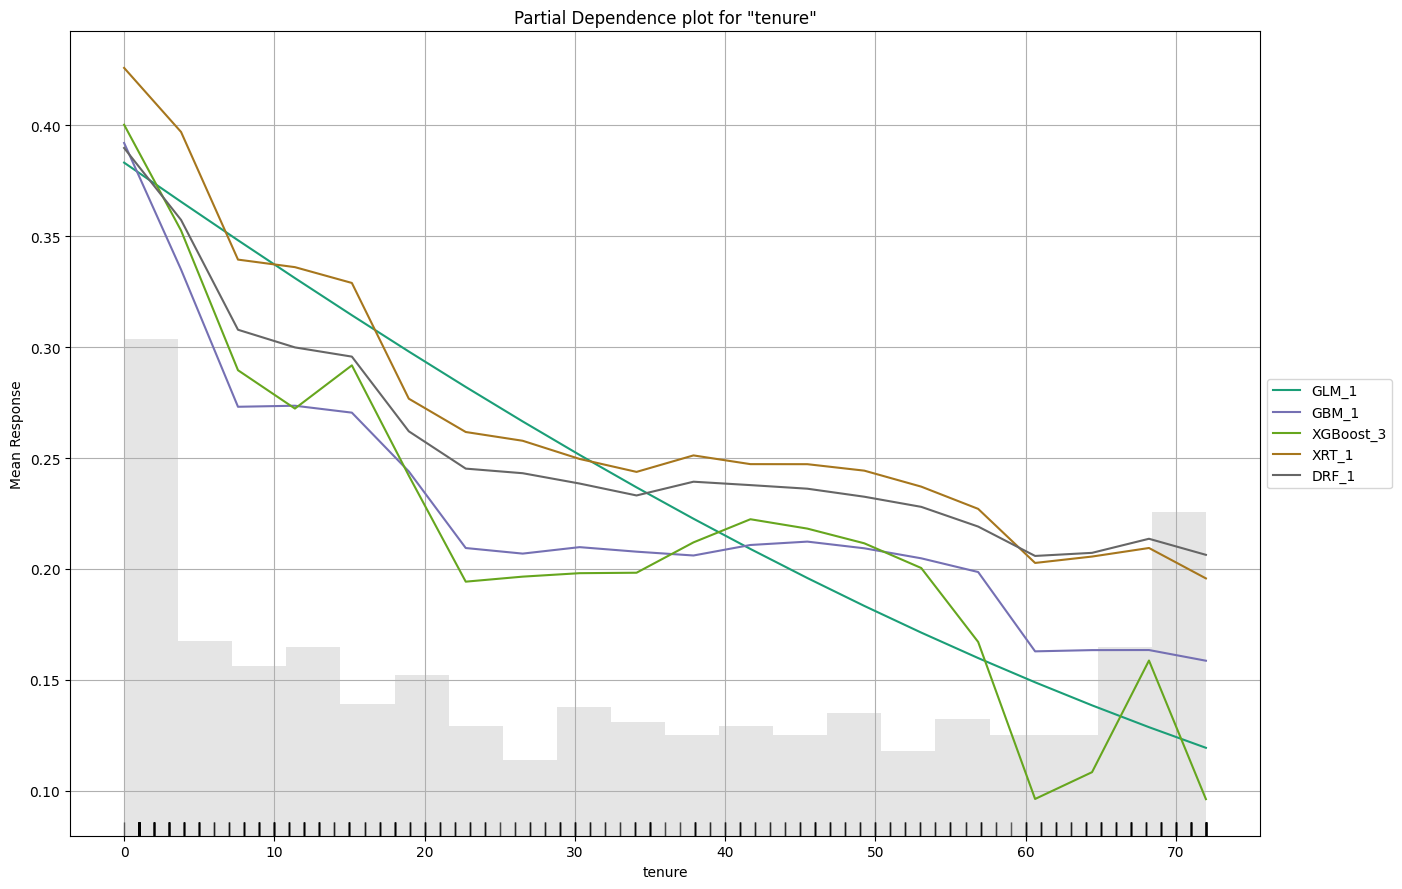

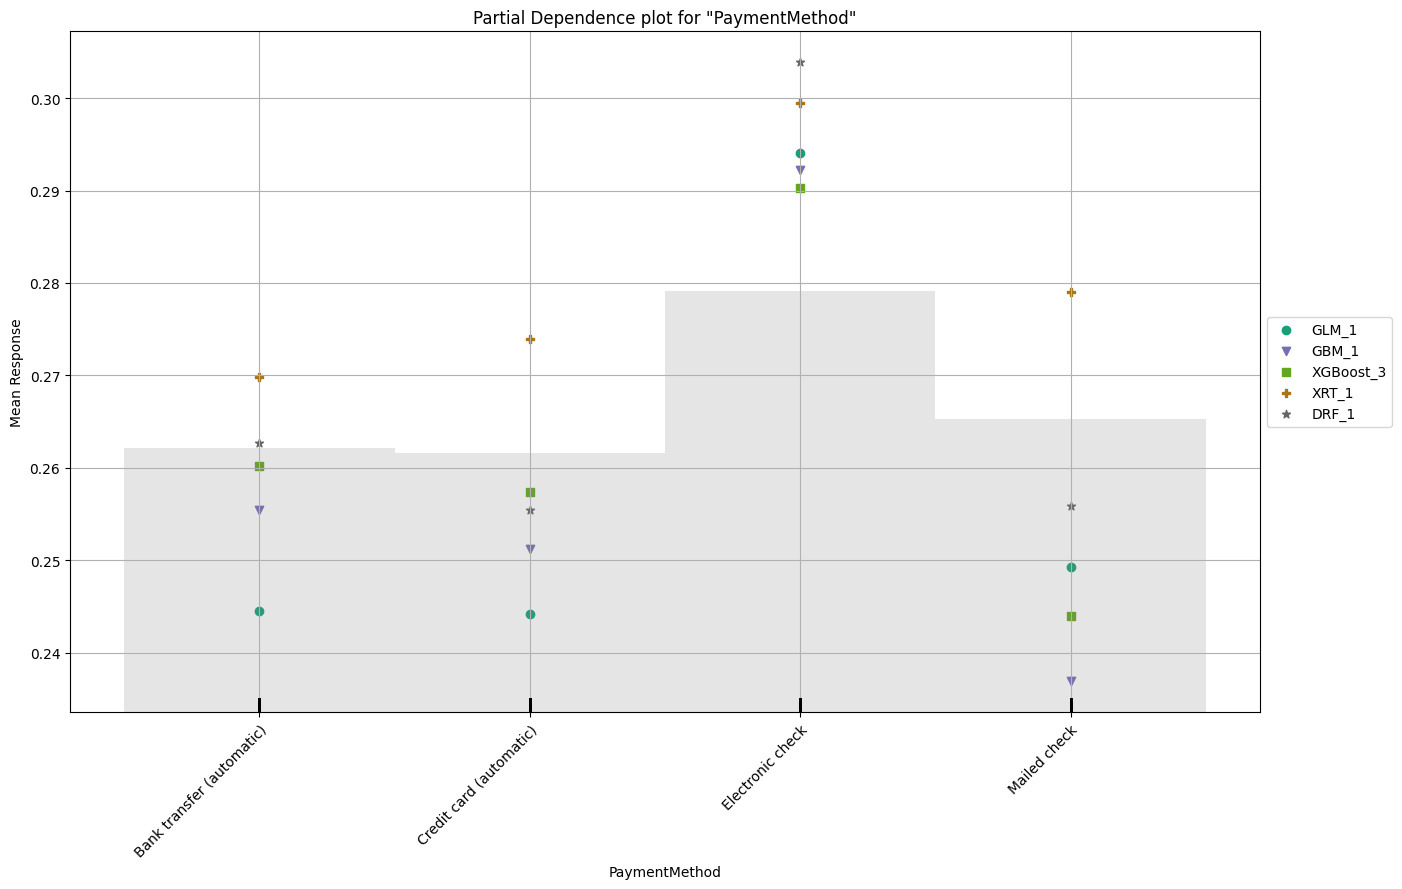

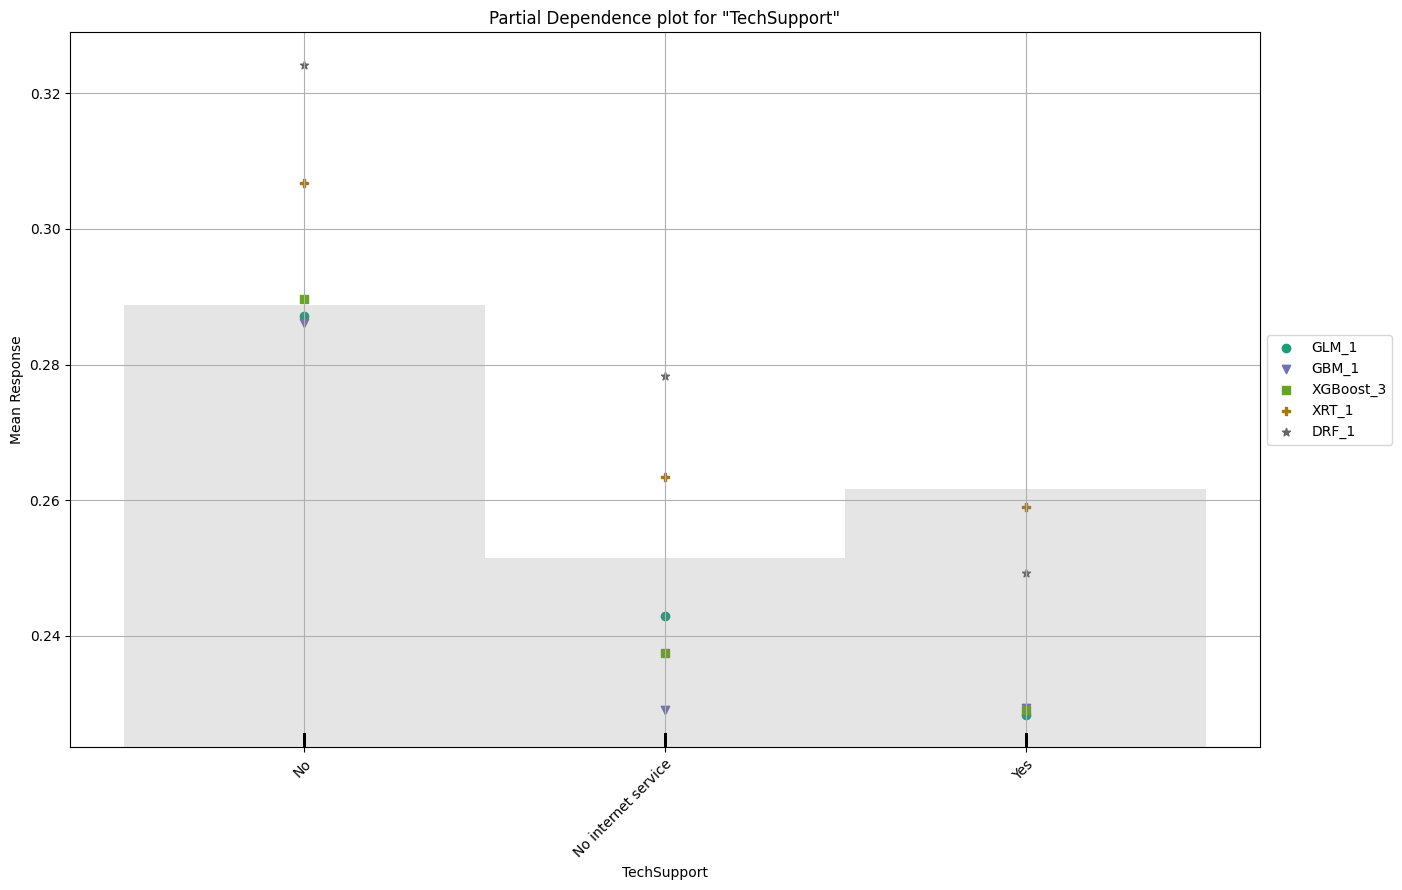

In [ ]:
exa = auto_model.explain(churn_test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20230330_83818

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29122562586269446
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     547   172    0.2392   (172.0/719.0)
Yes    69    204    0.2527   (69.0/273.0)
Total  616   376    0.2429   (241.0/992.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

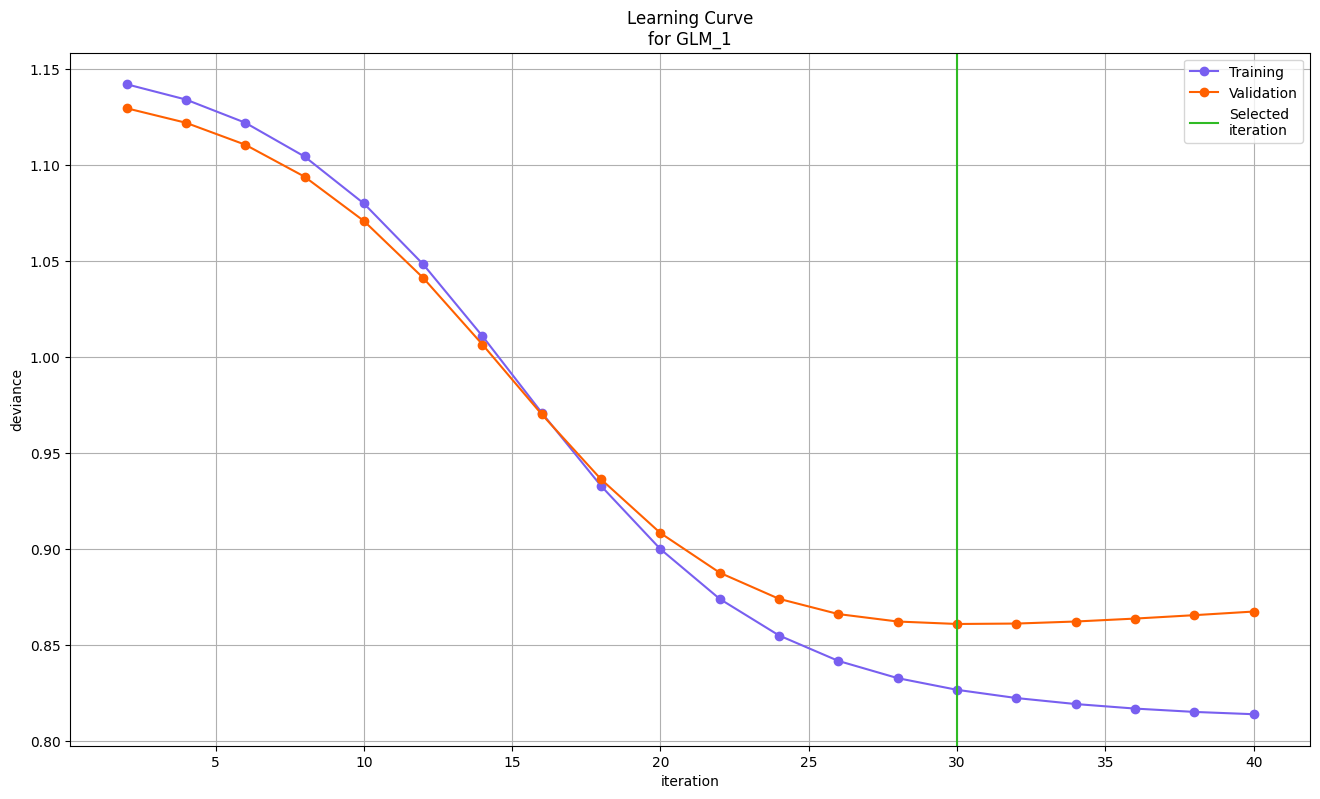

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

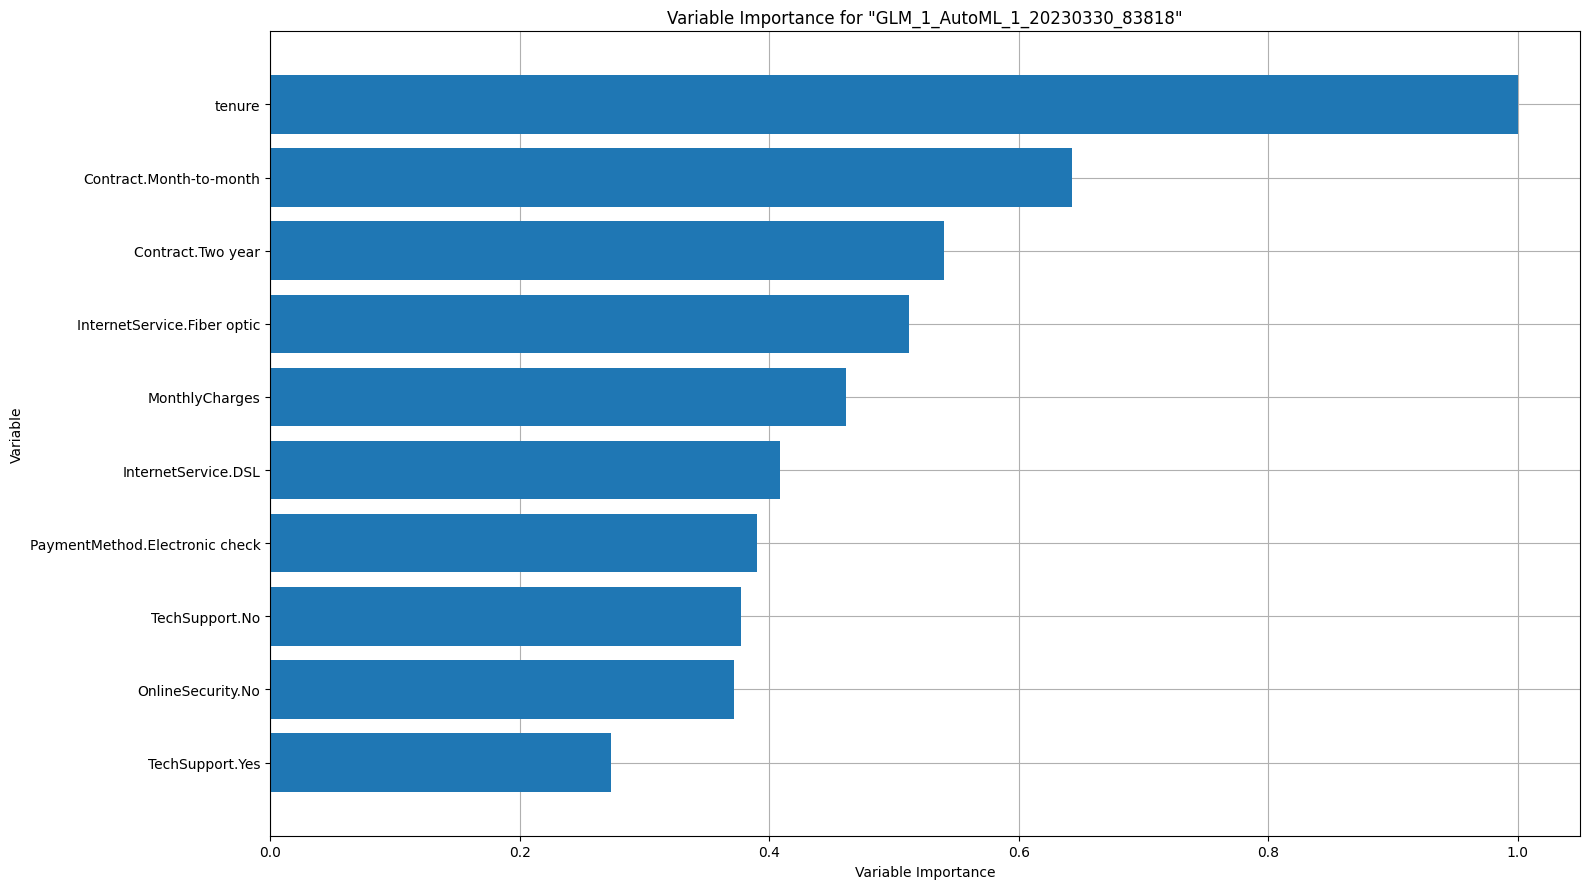

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

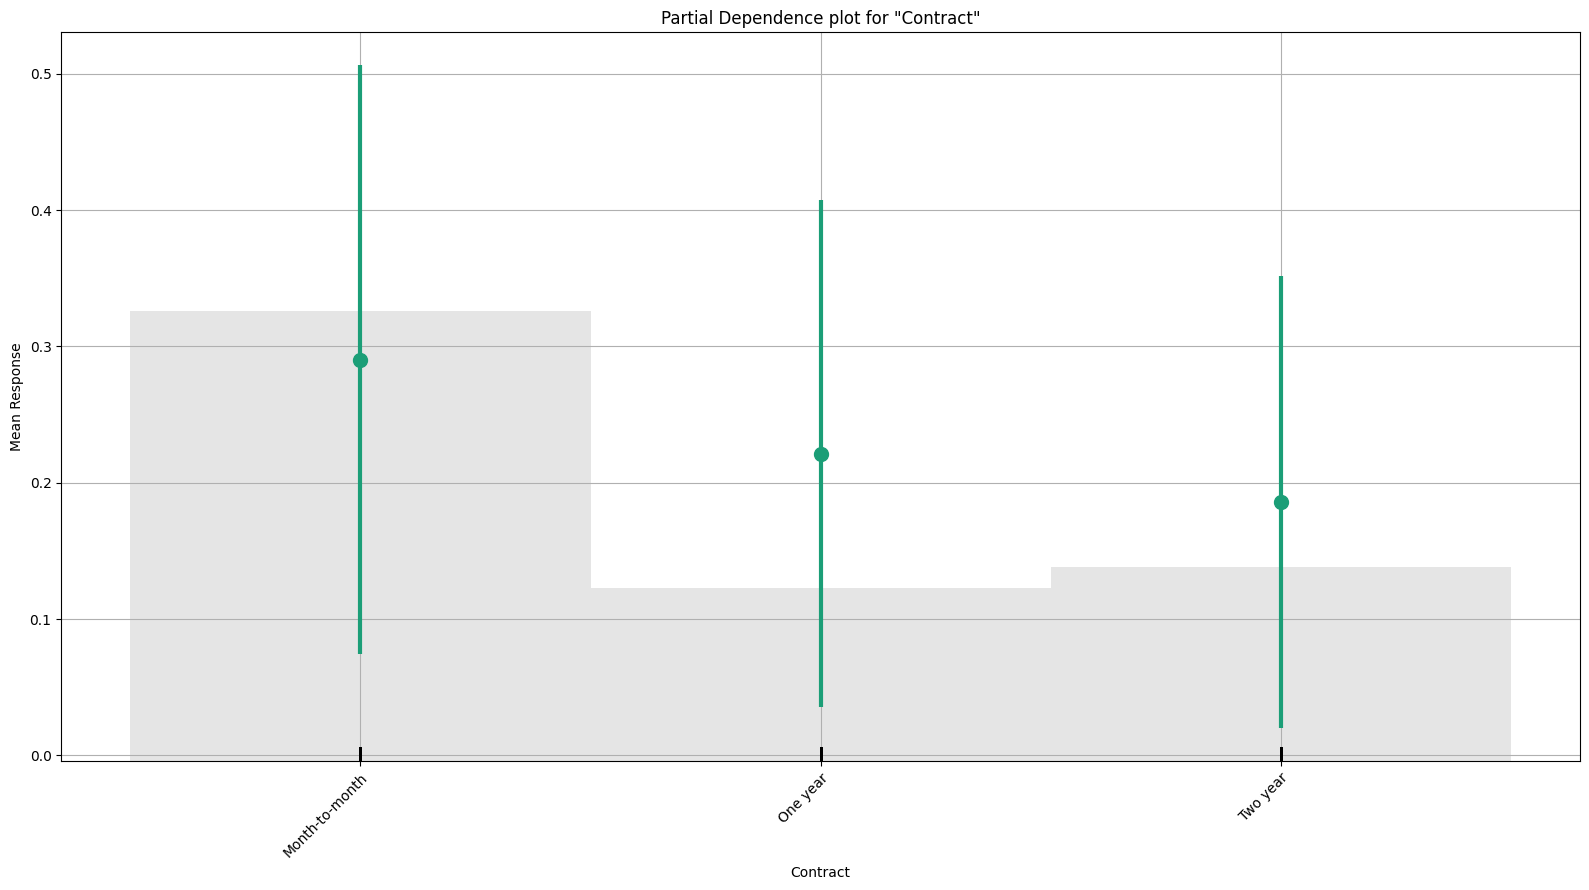

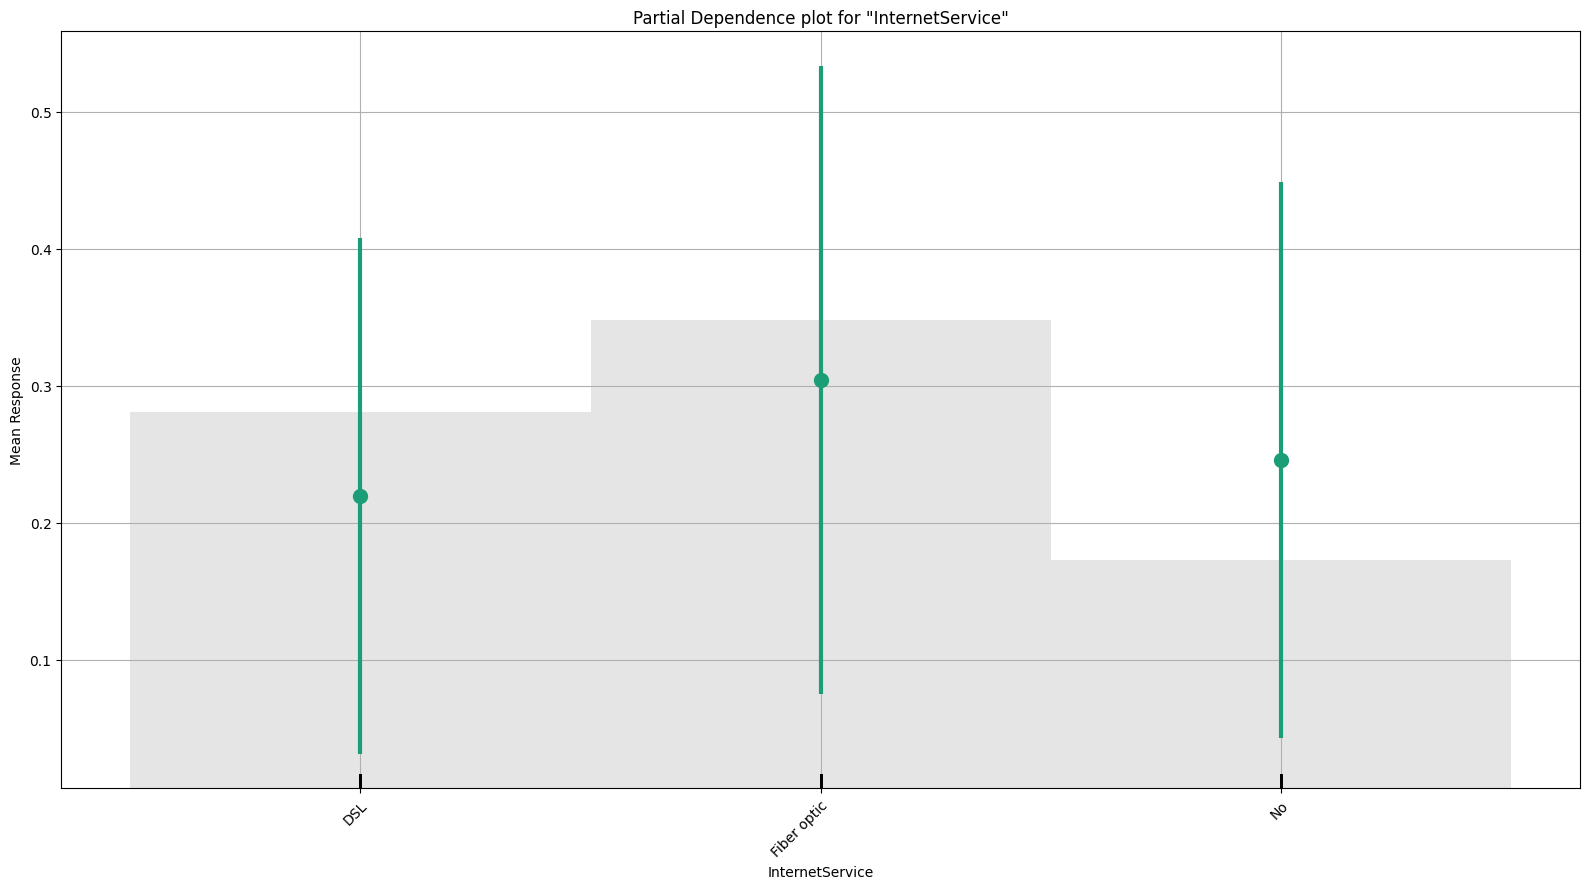

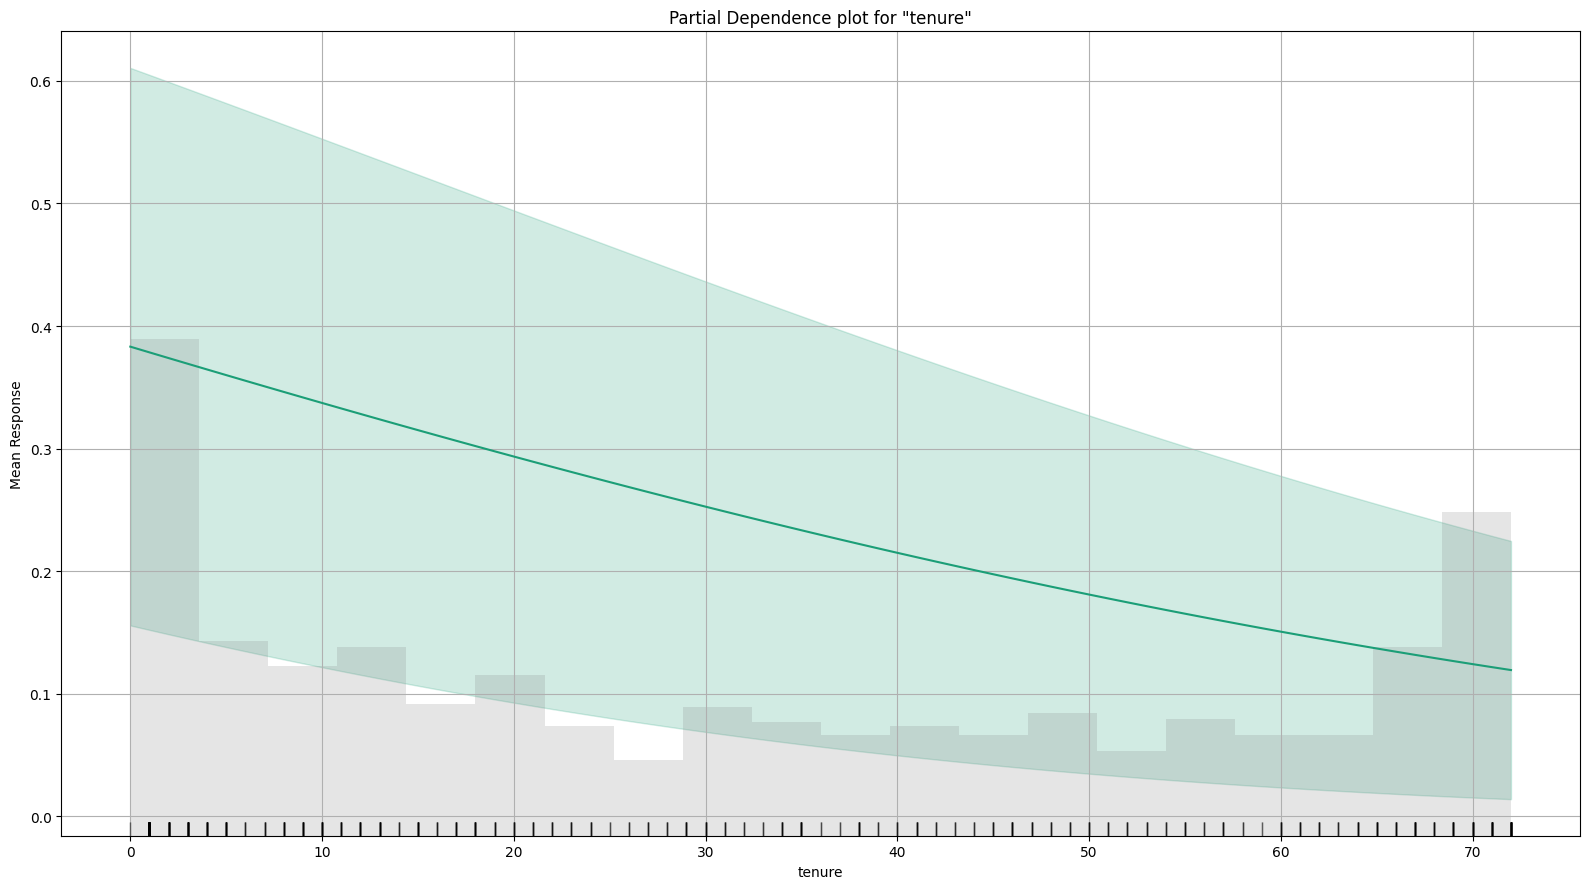

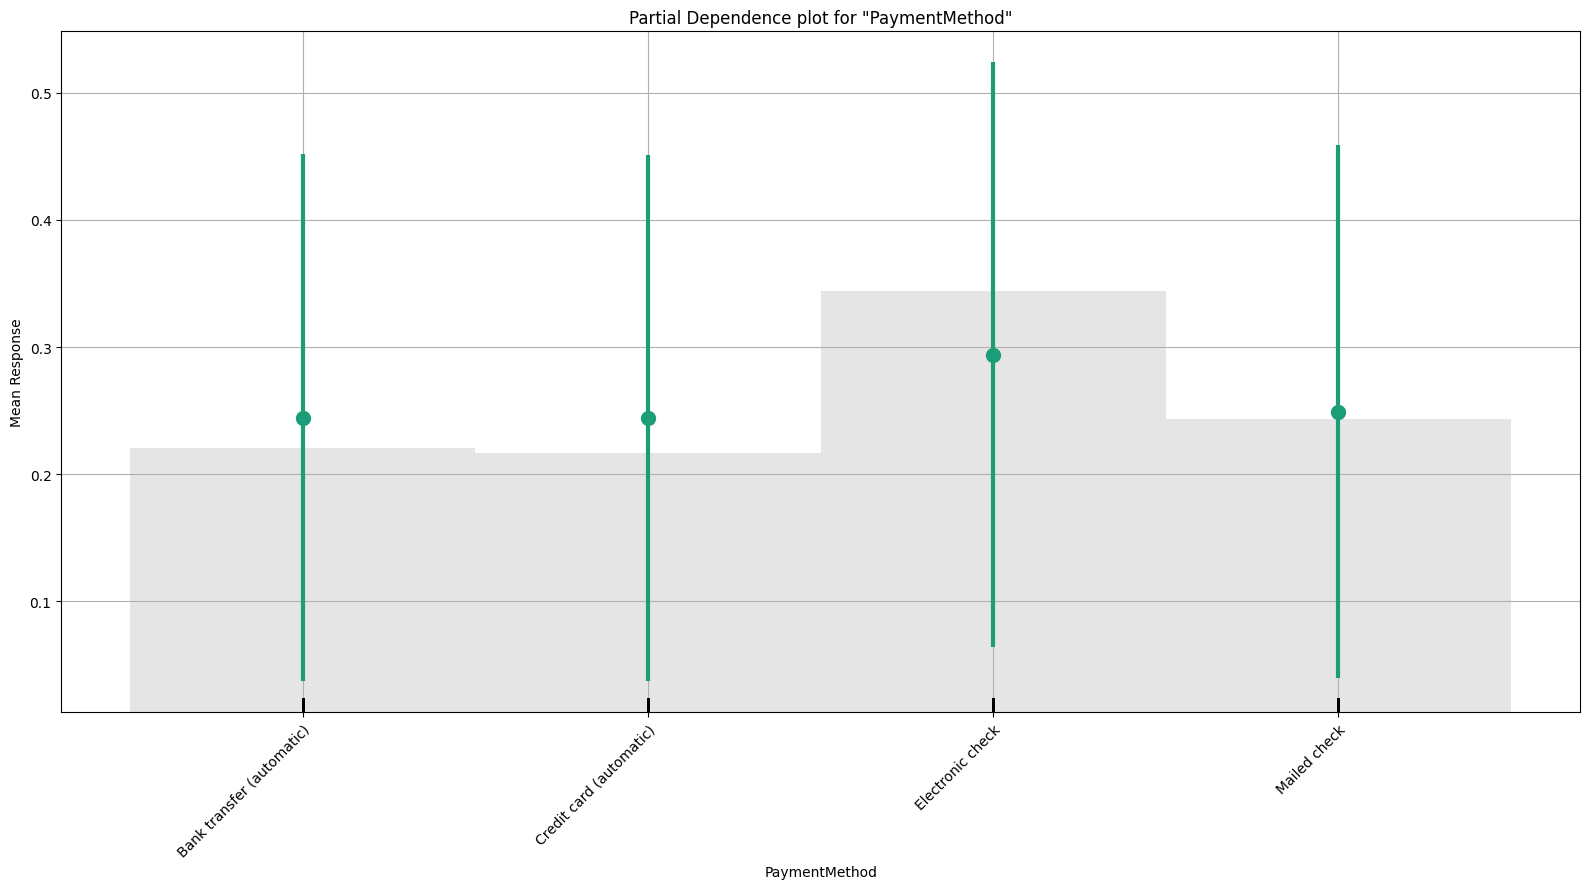

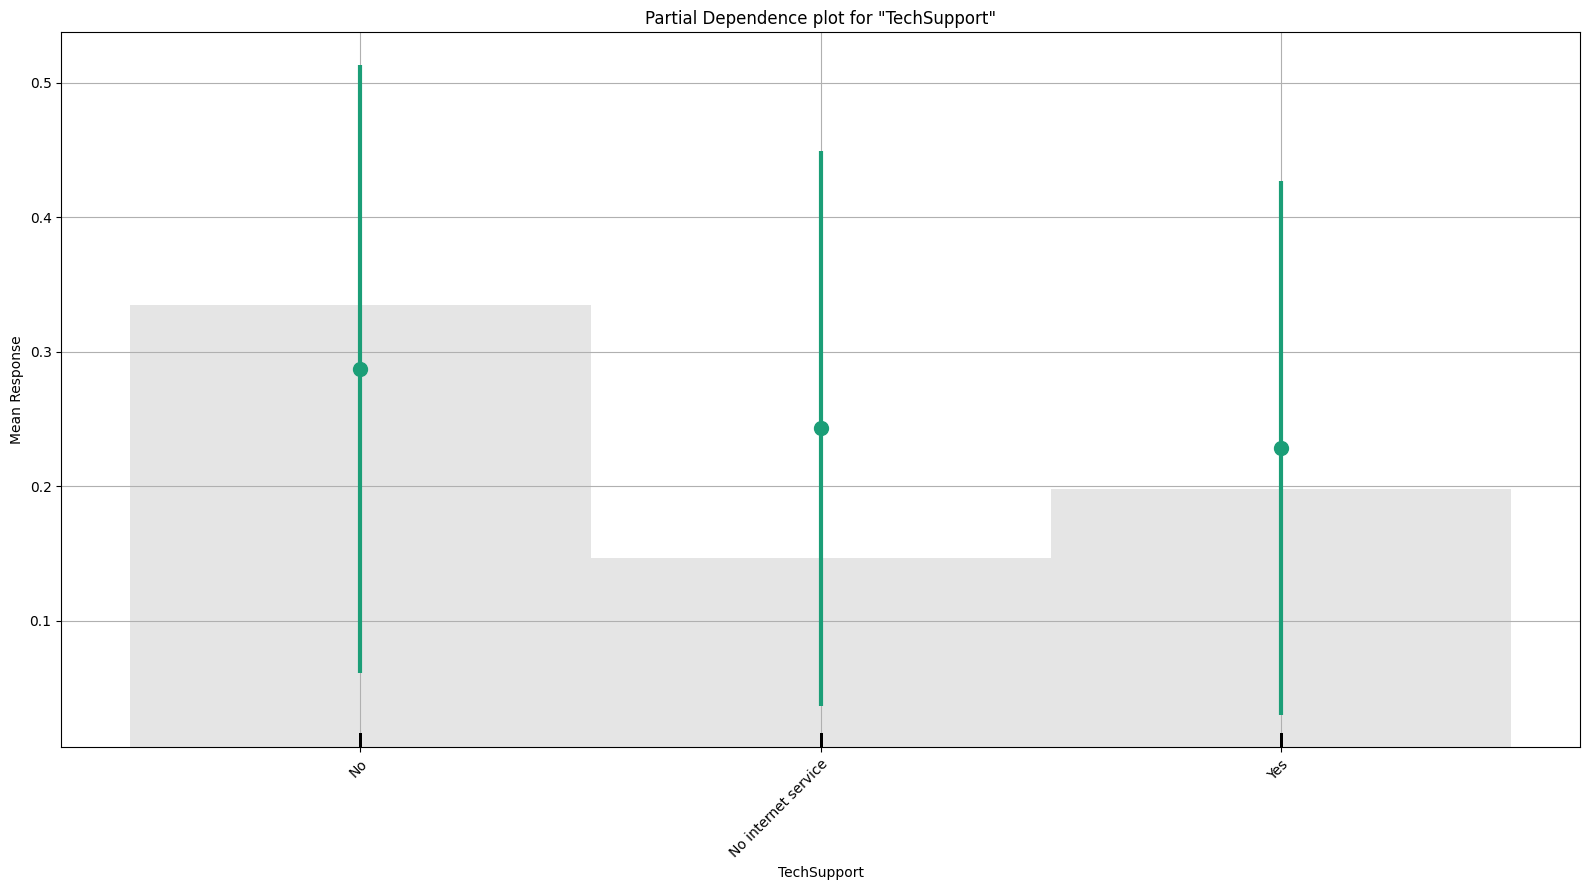

In [ ]:
#interpretation of the best model results from the leaderboard
exa_leader = auto_model.leader.explain(churn_test)

In [ ]:
# shapr_plot = auto_model.leader.shap_explain_row_plot(churn_test, row_index = 0) #SHAP local explanation row plot

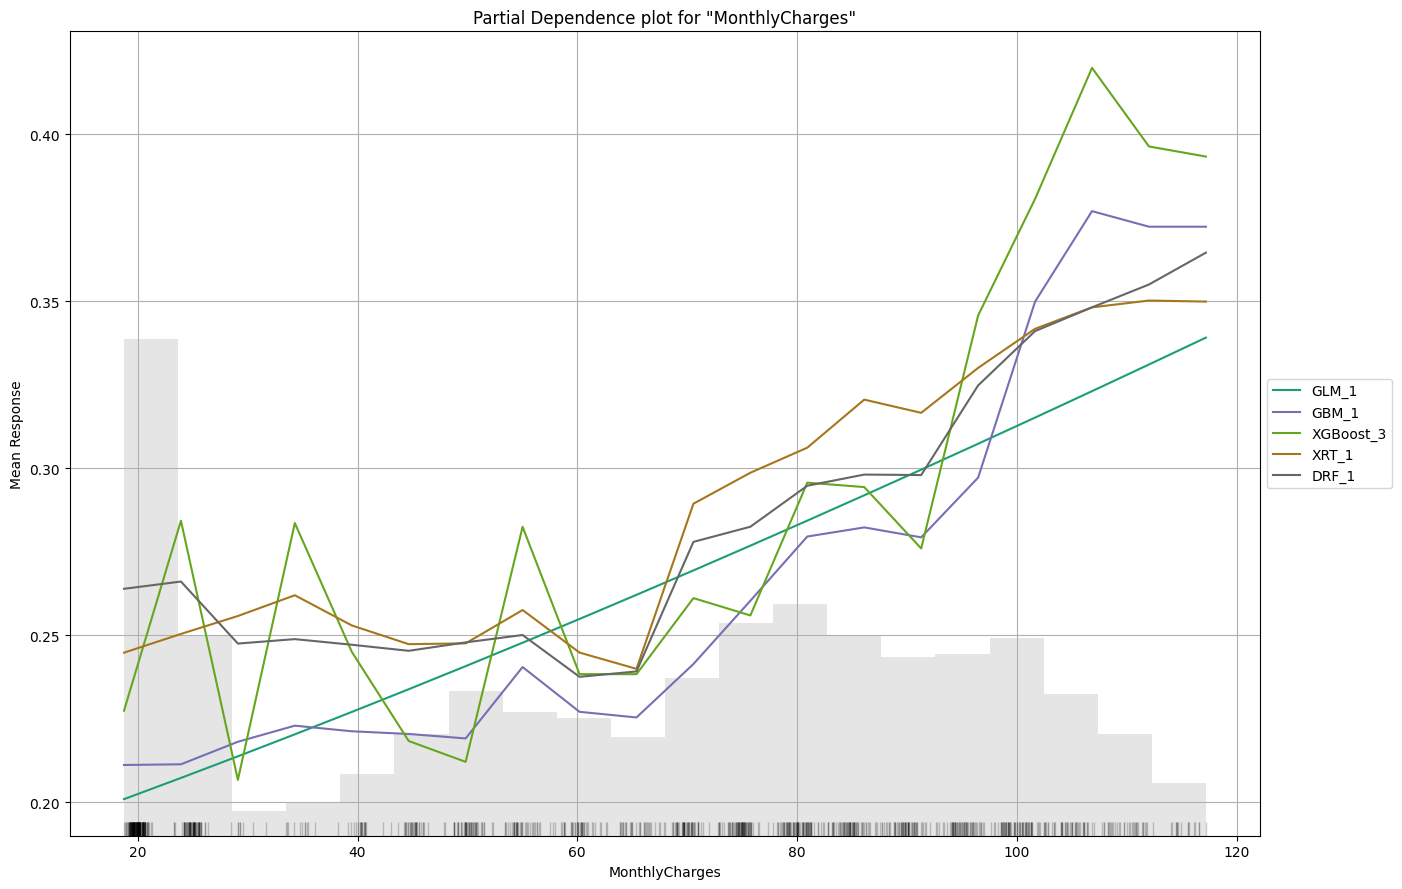

In [ ]:
#PDP plot for the autoML model for single column, Monthly Charges
pd_plot = auto_model.pd_multi_plot(churn_test, "MonthlyCharges")

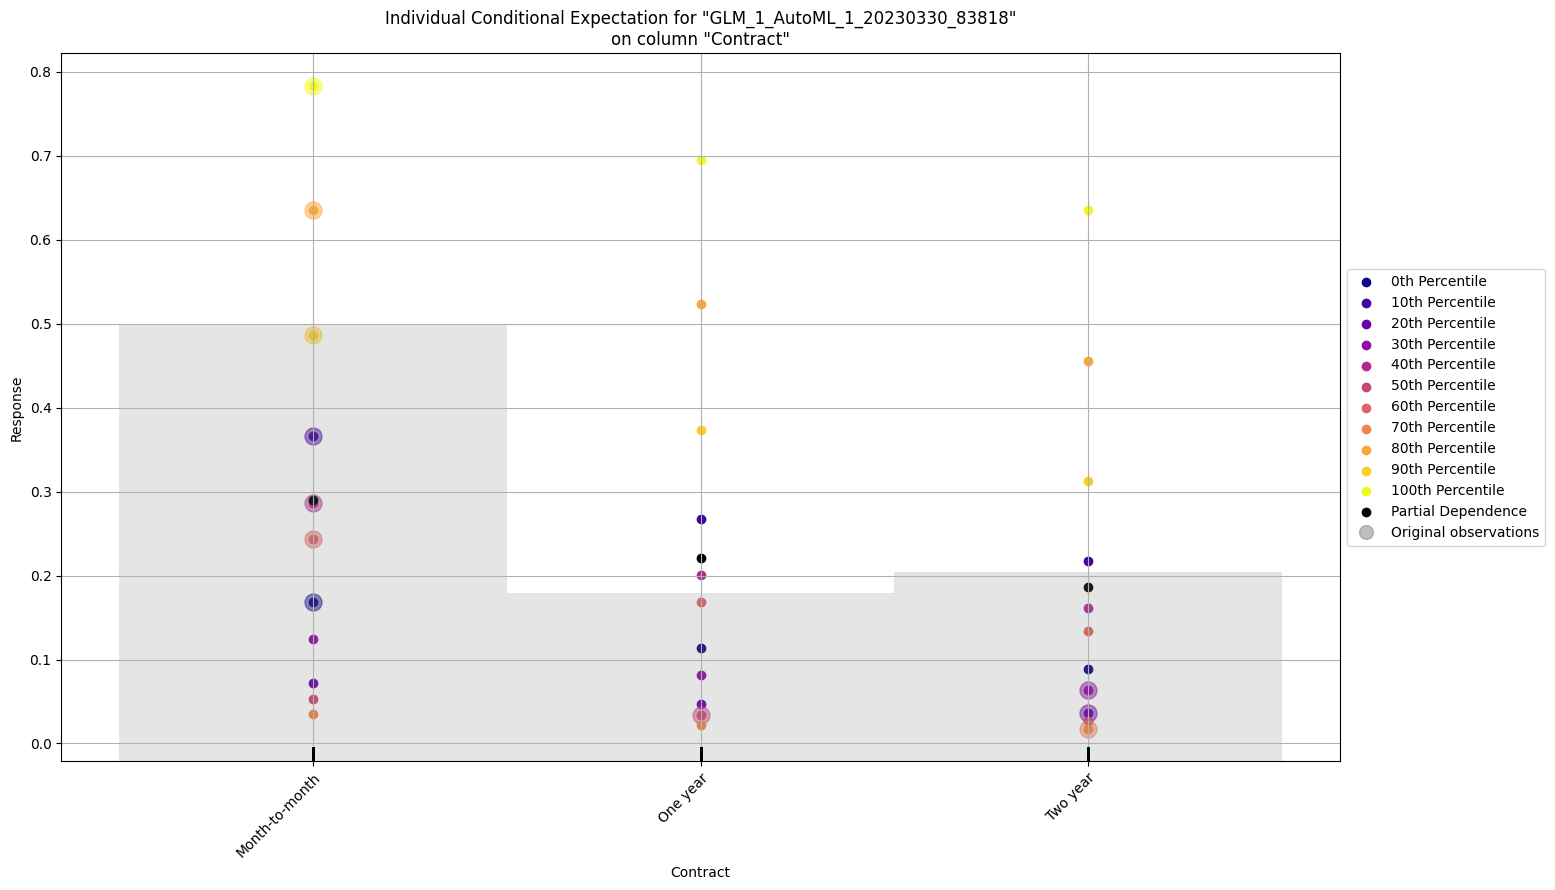

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "Contract")

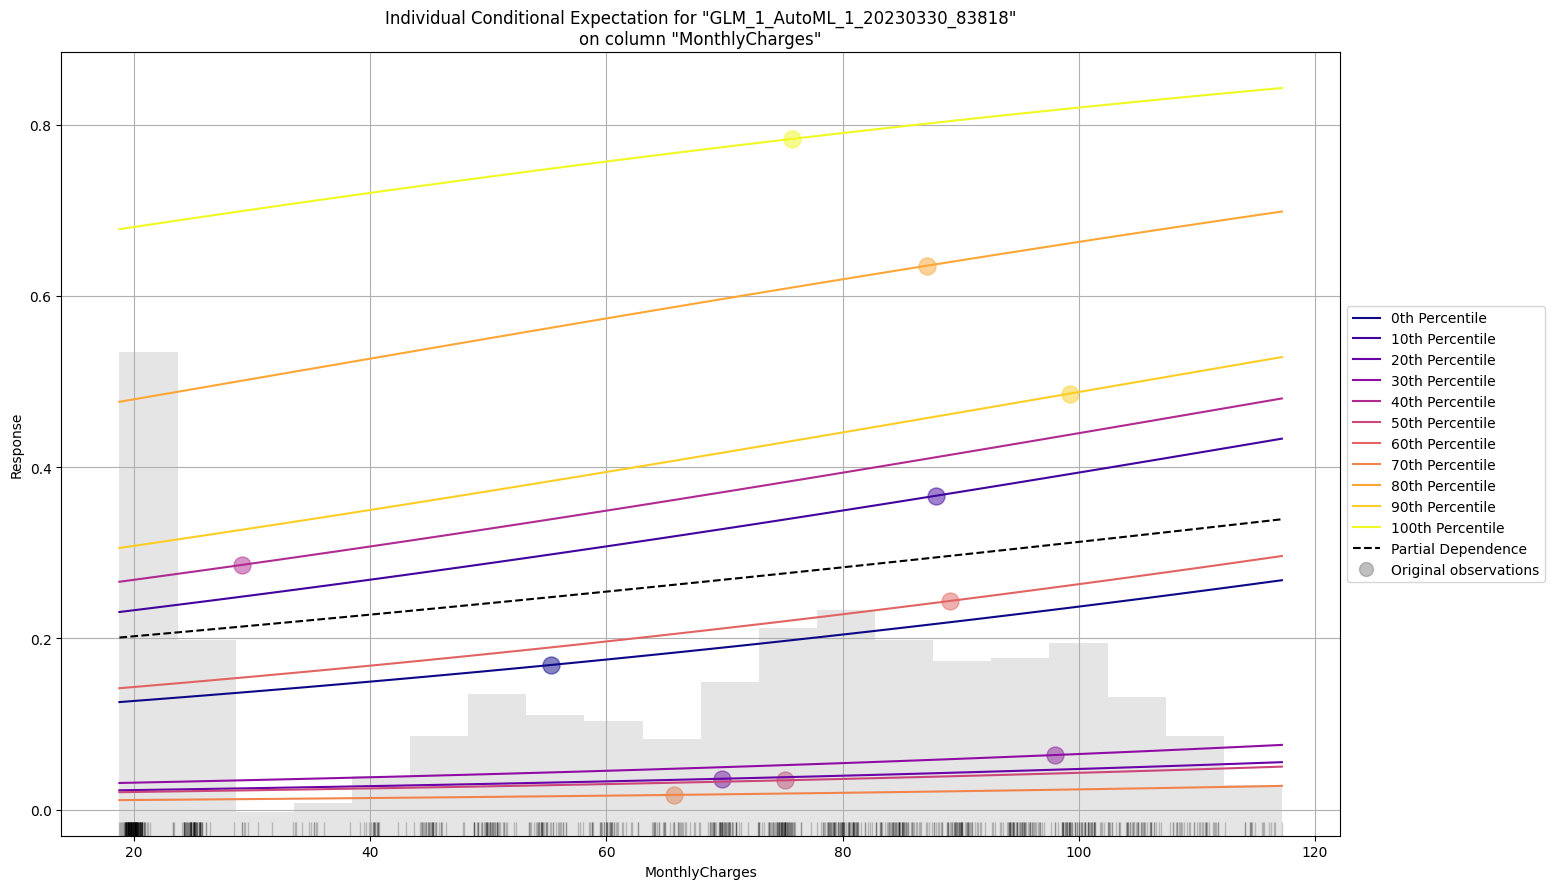

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "MonthlyCharges") #ICE (Individual Conditional Expectation) plots for the column MonthlyCharges

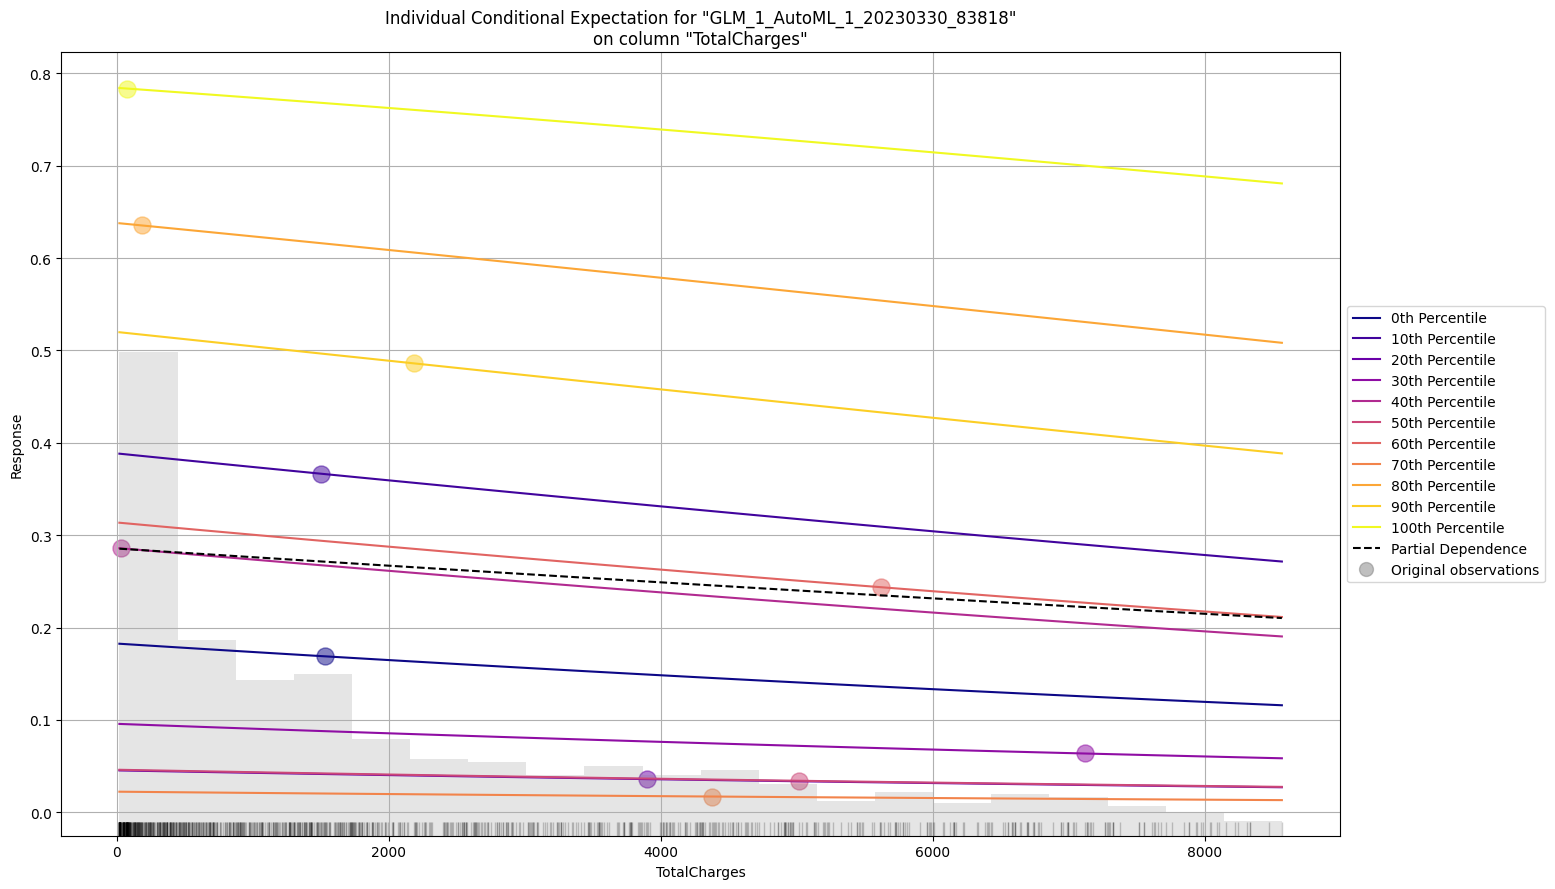

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "TotalCharges")

# Churn Prediction and Interpretation using Data Preprocessing

In [ ]:
heatmap_data_copy['Churn'] = df_data['Churn']
heatmap_data_copy

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                    1              2           29.85         29.85    No  
1                    0              3           56.95       1889.50    No  
2                    1              3           53.85        108.15   Yes  
3                    0              0           42.30       1840.75    No  
4                    1              2           70.70        151.65   Yes  
...                ...            ...             ...           ...   ...  
7038                 1              3           84.80       1990.50    No  
7039                 1              1          103.20       7362.90    No  
7040                 1              2           29.60        346.45    No  
7041                 1              3           74.40        306.60   Yes  
7042                 1              0          105.65       6844.50    No  

[7043 rows x 20 columns]

In [ ]:
heatmap_data_copy.to_csv("churnfile.csv")

In [ ]:
churn_df_p = h2o.import_file("churnfile.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df_p.describe()

Rows:7043
Cols:21

C1                  gender              SeniorCitizen        Partner              Dependents           tenure              PhoneService         MultipleLines       InternetService     OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies     Contract            PaperlessBilling    PaymentMethod       MonthlyCharges      TotalCharges        Churn
-------  ------------------  ------------------  -------------------  -------------------  -------------------  ------------------  -------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  -------
type     int                 int                 int                  int                  int                  int                 int                  int                 int                 int                 int                 int                 int                 int                 int                 int                 int                 int                 real                real                enum
mins     0.0                 0.0                 0.0                  0.0                  0.0                  0.0                 0.0                  0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 18.25               18.8
mean     3521.0              0.504756495811444   0.1621468124378816   0.4830327985233565   0.2995882436461735   32.37114865824224   0.9031662643759761   0.9405083061195513  0.8729234701121681  0.7900042595484876  0.906431918216669   0.904444128922334   0.7971035070282553  0.98537555019168    0.9924747976714468  0.6904728098821525  0.5922192247621753  1.574329121113162   64.76169246059916   2283.3004408418656
maxs     7042.0              1.0                 1.0                  1.0                  1.0                  72.0                1.0                  2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 1.0                 3.0                 118.75              8684.8
sigma    2033.2833053954878  0.5000128736471514  0.36861160561001305  0.49974751071998724  0.45811016751001526  24.559481023094456  0.29575223178363474  0.9485540334470453  0.7377963405848539  0.859847504351883   0.8801624706484423  0.8799488523681205  0.8615505621474112  0.8850018638488104  0.8850907112876594  0.8337552328756319  0.4914569240494068  1.0681040055096733  30.090047097678497  2266.771361883145
zeros    1                   3488                5901                 3641                 4933                 11                  682                  3390                2421                3498                3088                3095                3473                2810                2785                3875                2872                1544                0                   0
missing  0                   0                   0                    0                    0                    0                   0                    0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   11                  0
0        0.0                 0.0                 0.0                  1.0                  0.0                  1.0                 0.0                  1.0                 0.0                 0.0                 2.0                 0.0                 0.0                 0.0                 0.0                 0.0    

In [ ]:
#taking the test, train and validation data respectively
train, test, valid = churn_df_p.split_frame(ratios = [.7, .15])

In [ ]:
auto_model_2 = H2OAutoML(max_models = 15, seed = 10, exclude_algos= ["DeepLearning"], verbosity="info", nfolds = 0)
#use a maximum of 10 models-the more models the more time consuming it is
#exclude_algos disables the alogs mentioned in it
#nfolds takes the number of folds that is required to perform k-fold cross validation, took zero as we have a validation dataset, by default takes 5 

In [ ]:
y_p = "Churn"
x_p = churn_df_p.columns
x_p.remove(y_p)
x_p.remove("C1")

In [ ]:
churn_df_p.columns

['C1',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
auto_model_2.train(x = x_p, y = y_p, training_frame = train, validation_frame = valid)

AutoML progress: |
08:41:18.770: Project: AutoML_2_20230330_84118
08:41:18.770: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:41:18.770: Setting stopping tolerance adaptively based on the training frame: 0.014222003099714357
08:41:18.770: Build control seed: 10
08:41:18.770: training frame: Frame key: AutoML_2_20230330_84118_training_py_464_sid_b01e    cols: 21    rows: 4944  chunks: 8    size: 113213  checksum: 2389409501090695672
08:41:18.771: validation frame: Frame key: py_466_sid_b01e    cols: 21    rows: 998  chunks: 8    size: 34807  checksum: 7098514840757572732
08:41:18.771: leaderboard frame: Frame key: py_466_sid_b01e    cols: 21    rows: 998  chunks: 8    size: 34807  checksum: 7098514840757572732
08:41:18.771: blending frame: NULL
08:41:18.771: response column: Churn
08:41:18.771: fold column: null
08:41:18.771: weights column: null
08:41:18.771: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20230330_84118_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          9474                   3            3            3             7             8             7.93333

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12838439372639293
RMSE: 0.3583076802503582
LogLoss: 0.39912868752181574
Mean Per-Class Error: 0.2164118079464423
AUC: 0.8639461432718544
AUCPR: 0.701430825816838
Gini: 0.7278922865437087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32464696448202573
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2881  729    0.2019   (729.0/3610.0)
Yes    308   1026   0.2309   (308.0/1334.0)
Total  3189  1755   0.2097   (1037.0/4944.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.324647     0.664293  216
max f2                       0.179321     0.767362  284
max f0point5                 0.509015     0.663733  136
max accuracy                 0.466496     0.816343  154
max precision                0.919023     1         0
max recall                   0.0239049    1         392
max specificity              0.919023     1         0
max absolute_mcc             0.324647     0.526119  216
max min_per_class_accuracy   0.309263     0.782609  223
max mean_per_class_accuracy  0.26265      0.78544   243
max tns                      0.919023     3610      0
max fns                      0.919023     1332      0
max fps                      0.0165568    3610      399
max tps                      0.0239049    1334      392
max tnr                      0.919023     1         0
max fnr                      0.919023     0.998501  0
max fpr                      0.0165568    1         399
max tpr                      0.0239049    1         392

Gains/Lift Table: Avg response rate: 26.98 %, avg score: 27.00 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101133                   0.840558           3.33553    3.33553            0.9              0.859063   0.9                         0.859063            0.0337331       0.0337331                  233.553   233.553            0.0323481
2        0.0200243                   0.814621           3.25233    3.29435            0.877551         0.829839   0.888889                    0.844598            0.0322339       0.065967                   225.233   229.435            0.0629199
3        0.0311489                   0.790247           3.36922    3.32109            0.909091         0.79922    0.896104                    0.828392            0.0374813       0.103448                   236.922   232.109            0.0990161
4        0.0400485                   0.763161           3.28499    3.31307            0.886364         0.775156   0.893939                    0.816562            0.0292354       0.132684                   228.499   231.307            0.126866
5        0.0501618                   0.743849           3.11316    3.27277            0.84             0.753686   0.88306

In [ ]:
lb2 = auto_model_2.leaderboard
lb2

model_id                                             auc    logloss     aucpr    mean_per_class_error      rmse       mse
----------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
GBM_grid_1_AutoML_2_20230330_84118_model_1      0.850037   0.417329  0.68152                 0.221962  0.368761  0.135984
GBM_1_AutoML_2_20230330_84118                   0.848374   0.416796  0.682093                0.224432  0.368839  0.136042
XGBoost_grid_1_AutoML_2_20230330_84118_model_3  0.847174   0.418694  0.672511                0.234585  0.370613  0.137354
GLM_1_AutoML_2_20230330_84118                   0.840442   0.427121  0.651966                0.231429  0.374185  0.140014
XGBoost_3_AutoML_2_20230330_84118               0.840245   0.427553  0.661051                0.2377    0.37412   0.139966
GBM_5_AutoML_2_20230330_84118                   0.837024   0.42992   0.655159                0.23588   0.376967  0.142104
GBM_3_AutoML_2_20230330_84118                   0.835242   0.433367  0.655569                0.238189  0.377062  0.142176
XGBoost_grid_1_AutoML_2_20230330_84118_model_1  0.833354   0.437095  0.648621                0.233753  0.379225  0.143812
GBM_2_AutoML_2_20230330_84118                   0.831973   0.435026  0.653744                0.249047  0.378391  0.14318
XGBoost_2_AutoML_2_20230330_84118               0.829473   0.447     0.63675                 0.236858  0.382501  0.146307
[15 rows x 7 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                             auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
GBM_grid_1_AutoML_2_20230330_84118_model_1      0.852965   0.389548  0.672967                0.238916  0.354173  0.125438                 852                   0.02567   GBM
XGBoost_grid_1_AutoML_2_20230330_84118_model_3  0.849496   0.392298  0.660822                0.228352  0.356451  0.127057                2705                   0.018756  XGBoost
GBM_1_AutoML_2_20230330_84118                   0.849026   0.392103  0.652252                0.253996  0.355797  0.126591                1498                   0.031185  GBM
GLM_1_AutoML_2_20230330_84118                   0.84795    0.394854  0.640457                0.239641  0.358655  0.128634                1031                   0.017547  GLM
GBM_2_AutoML_2_20230330_84118                   0.846091   0.394814  0.653099                0.221045  0.356625  0.127182                1321                   0.023531  GBM
GBM_5_AutoML_2_20230330_84118                   0.84566    0.396118  0.64866                 0.239197  0.359083  0.12894                 1283                   0.023792  GBM
XGBoost_grid_1_AutoML_2_20230330_84118_model_2  0.845149   0.399423  0.64005                 0.237336  0.360825  0.130194                1648                   0.036091  XGBoost
XGBoost_3_AutoML_2_20230330_84118               0.845149   0.395766  0.64046                 0.242077  0.358964  0.128855                 968                   0.013671  XGBoost
XRT_1_AutoML_2_20230330_84118                   0.844451   0.398426  0.635974                0.224747  0.358842  0.128768                2151                   0.040247  DRF
GBM_3_AutoML_2_20230330_84118                   0.842314   0.400101  0.636826                0.256862  0.36001   0.129607                1189                   0.026699  GBM
XGBoost_grid_1_AutoML_2_20230330_84118_model_1  0.841997   0.402961  0.631689                0.243863  0.36163   0.130776                1231                   0.013747  XGBoost
XGBoost_1_AutoML_2_20230330_84118               0.841731   0.404823  0.627066                0.228612  0.361822  0.130915                1975                   0.014182  XGBoost
GBM_4_AutoML_2_20230330_84118                   0.836501   0.406772  0.630501                0.253031  0.361988  0.131035                1190                   0.022902  GBM
XGBoost_2_AutoML_2_20230330_84118               0.835447   0.411936  0.613597                0.256602  0.365064  0.133271                1470                   0.01078   XGBoost
DRF_1_AutoML_2_20230330_84118                   0.833076   0.406657  0.623091                0.241229  0.367574  0.135111                3682                   0.049055  DRF
[15 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_2_20230330_84118_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.337078812749743
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     680   160    0.1905   (160.0/840.0)
Yes    75    186    0.2874   (75.0/261.0)
Total  755   346    0.2134   (235.0/1101.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

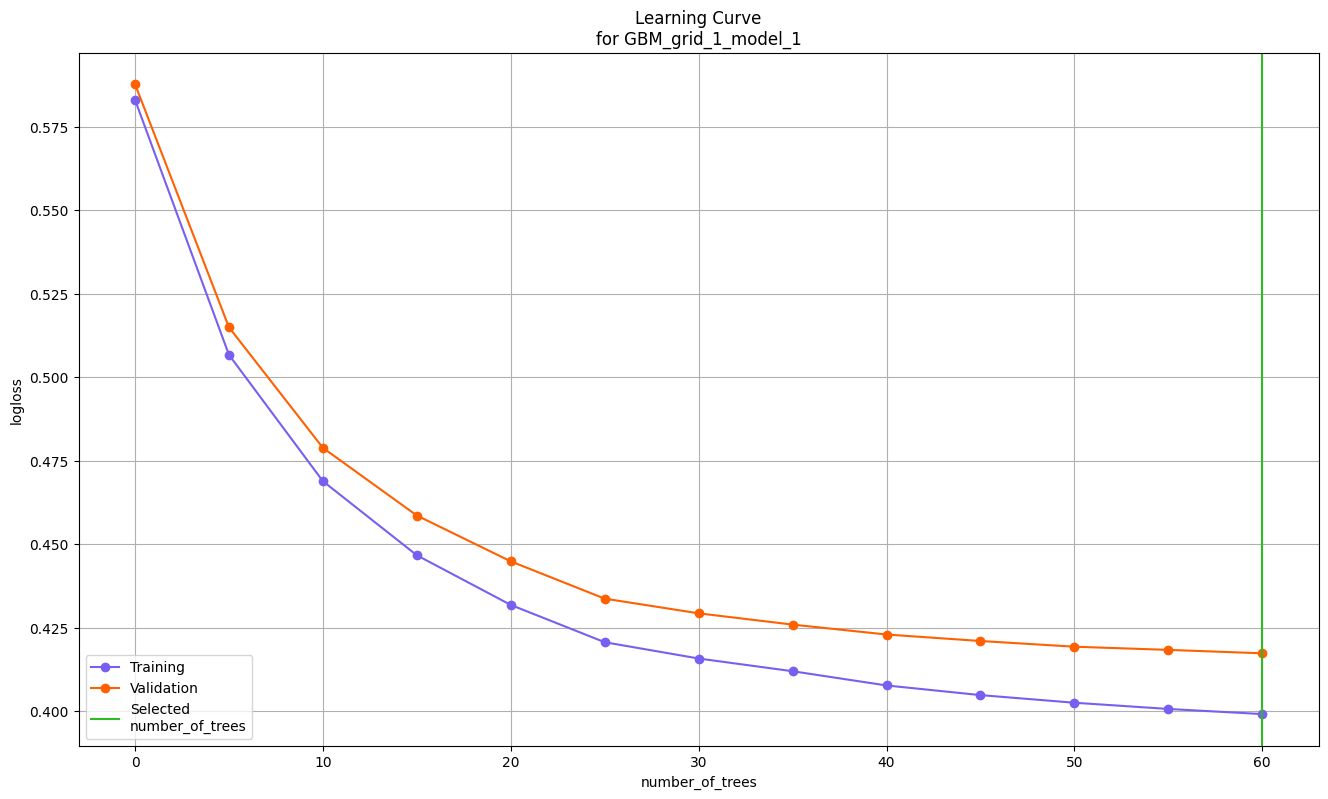

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

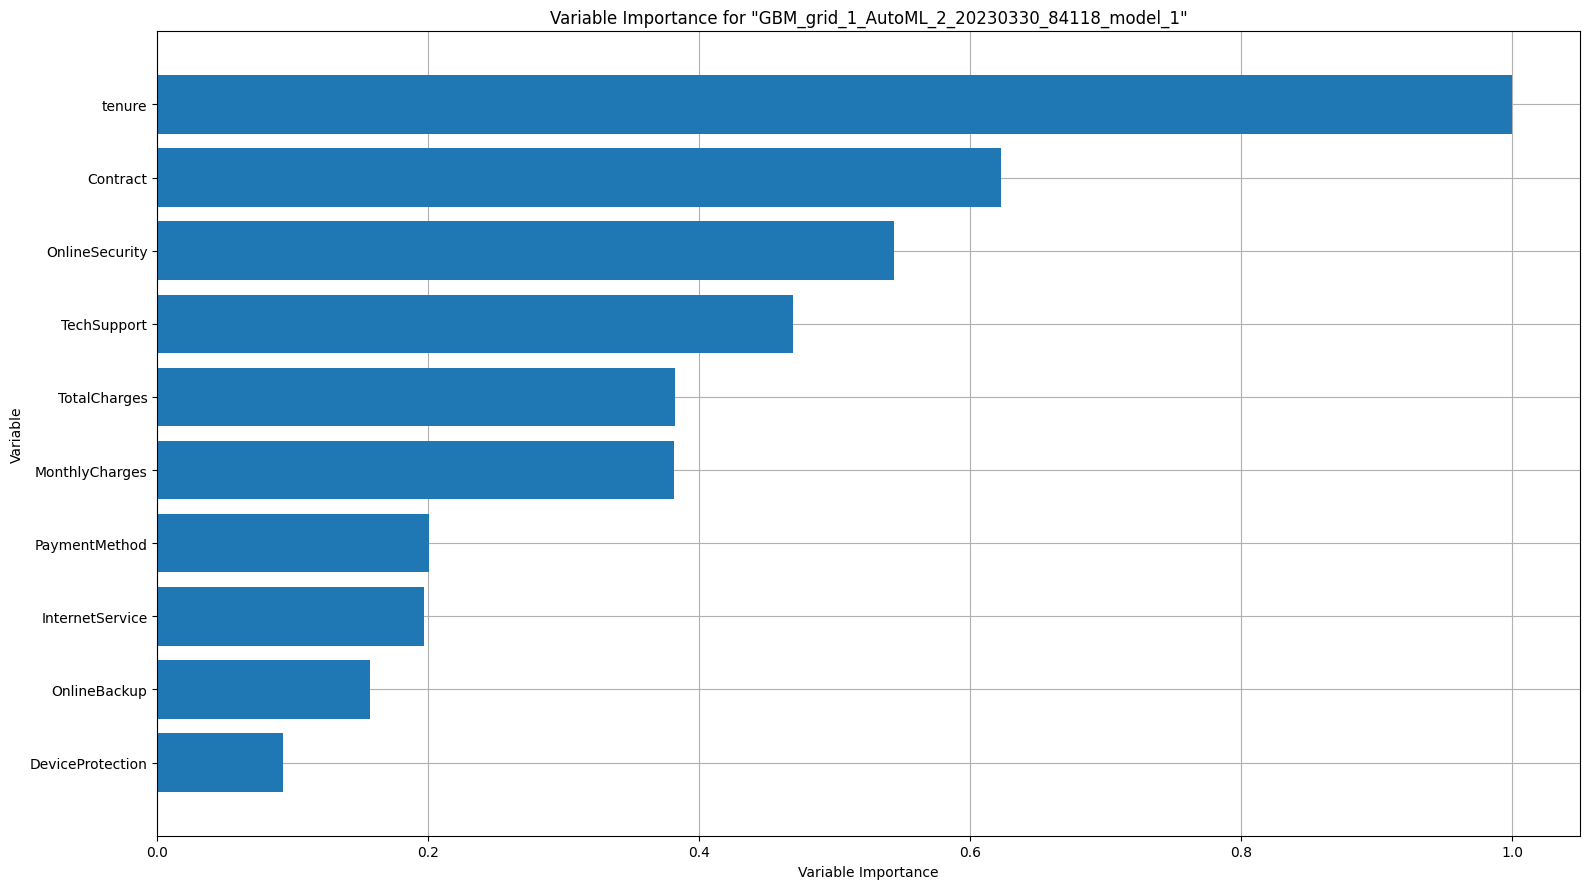

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

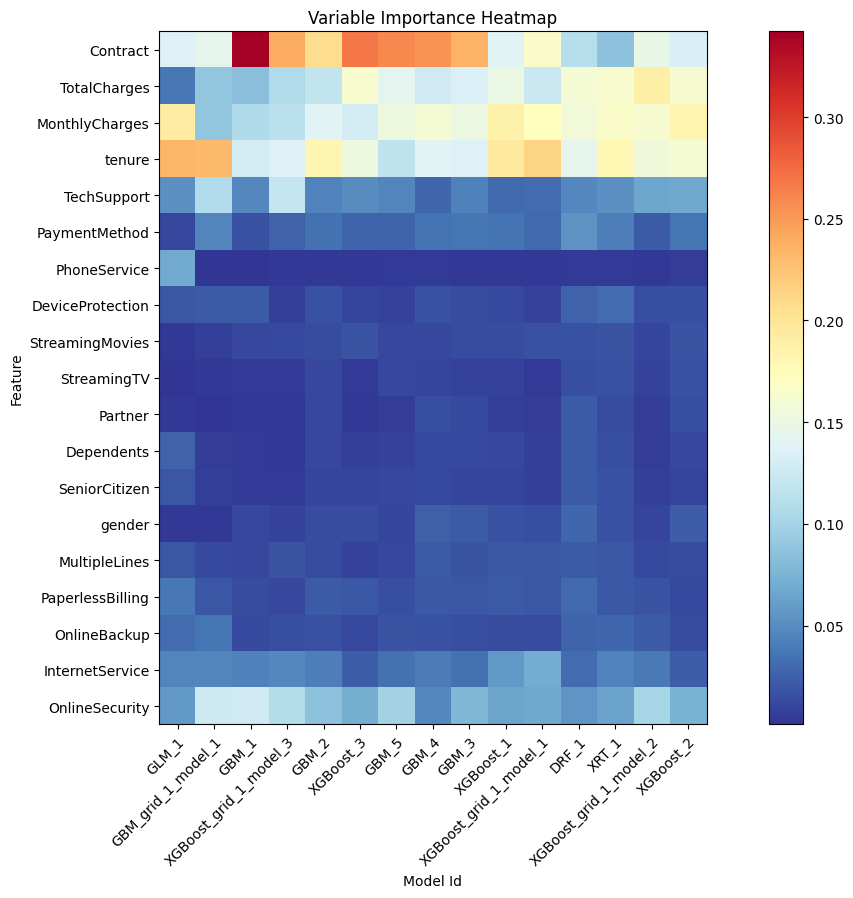

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

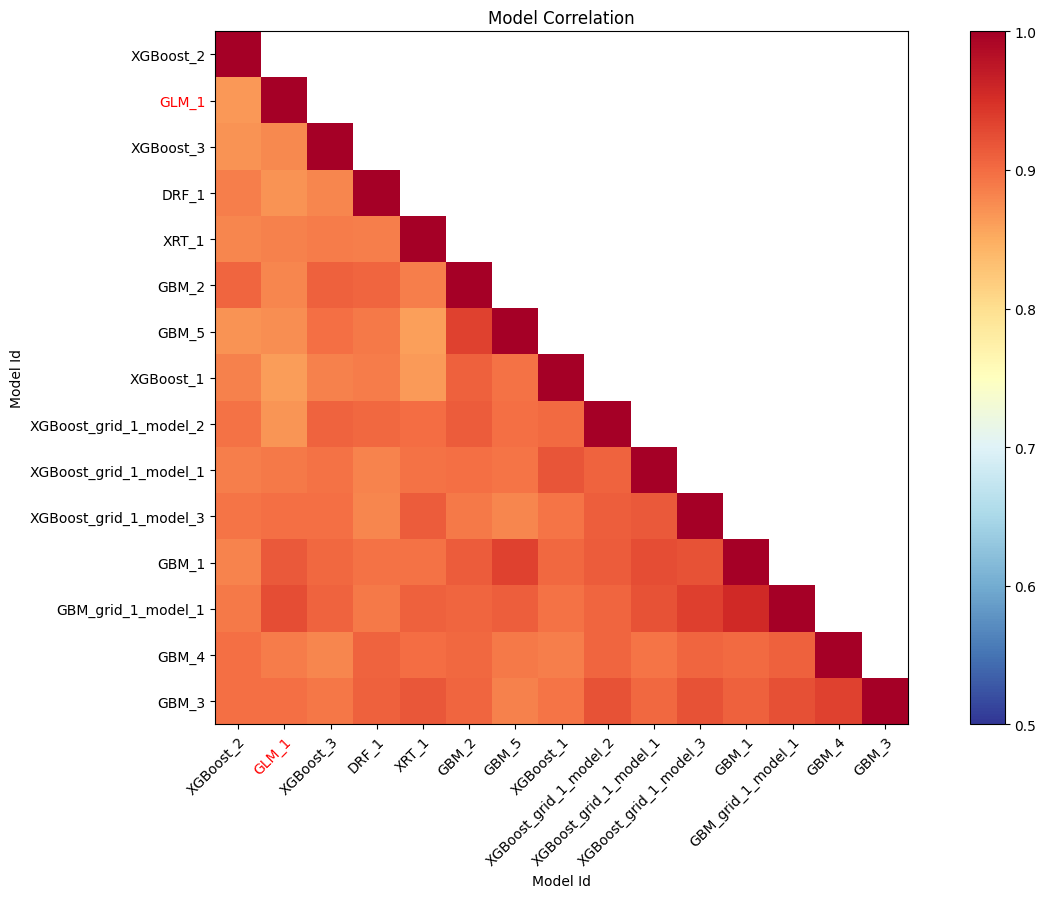

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

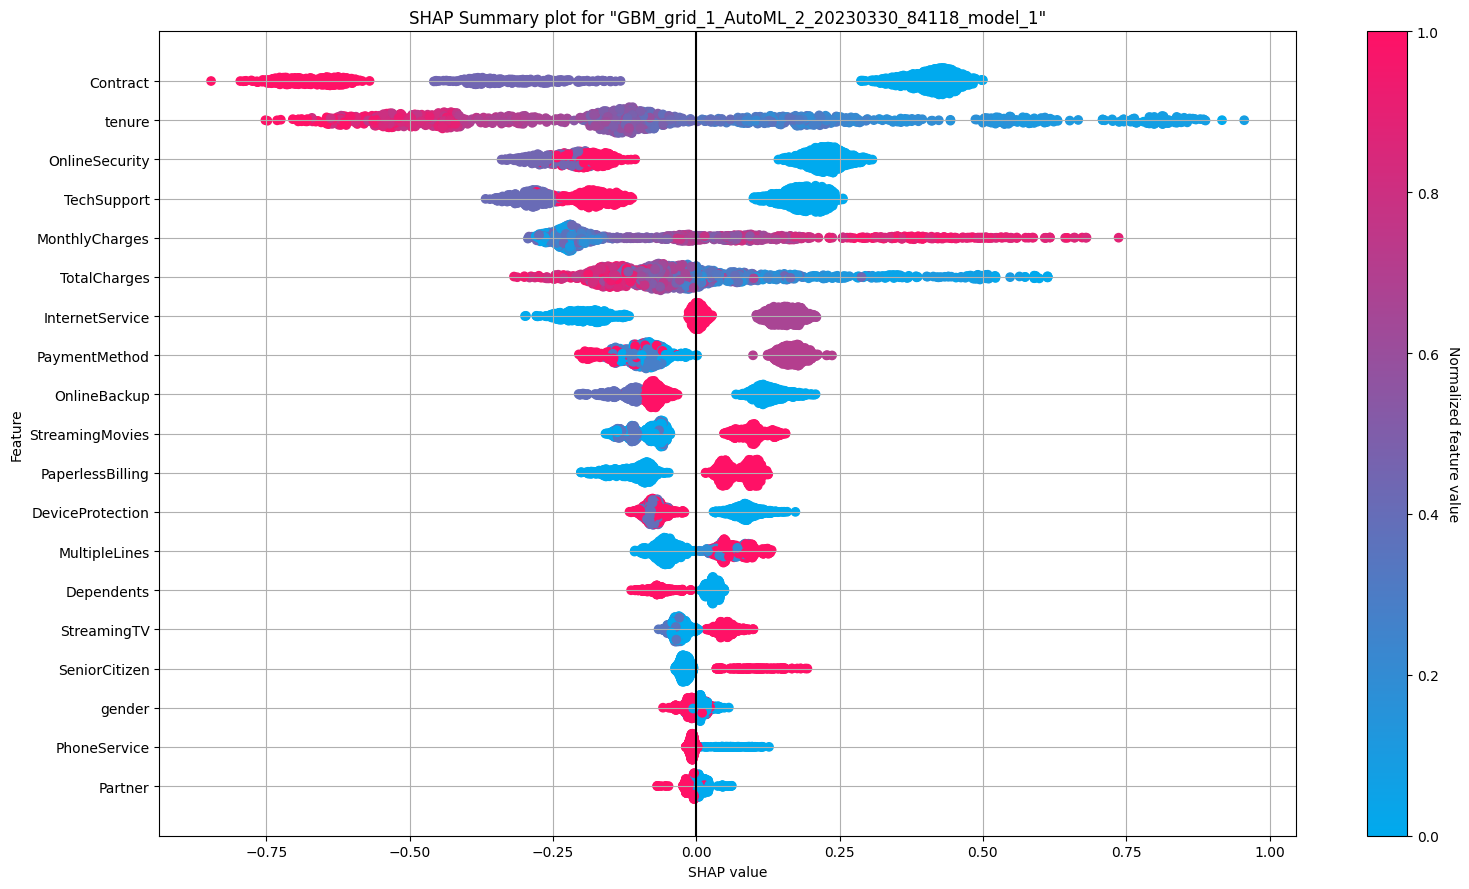

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

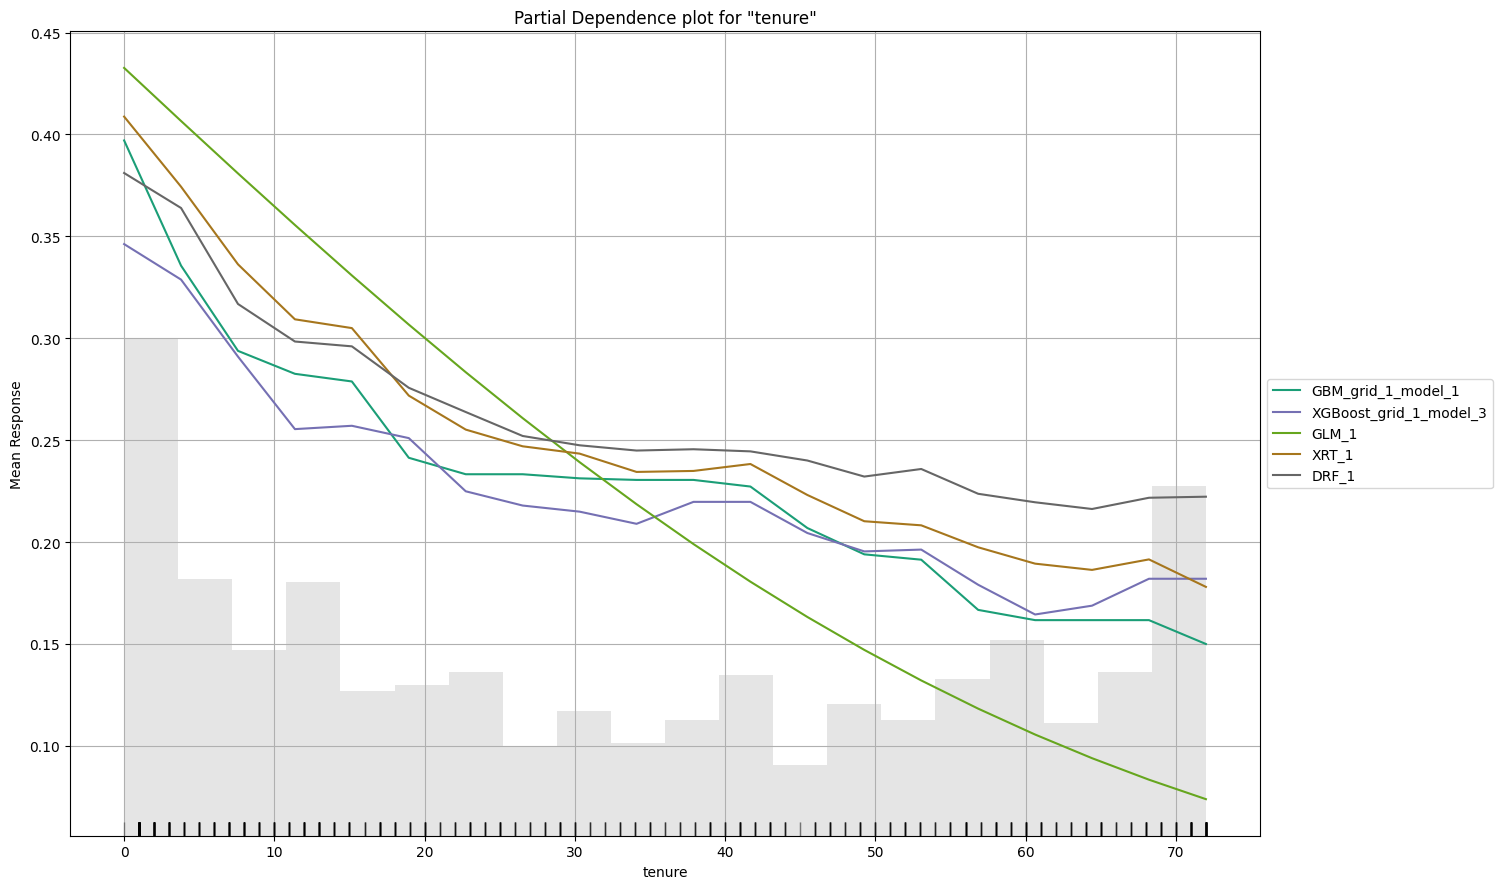

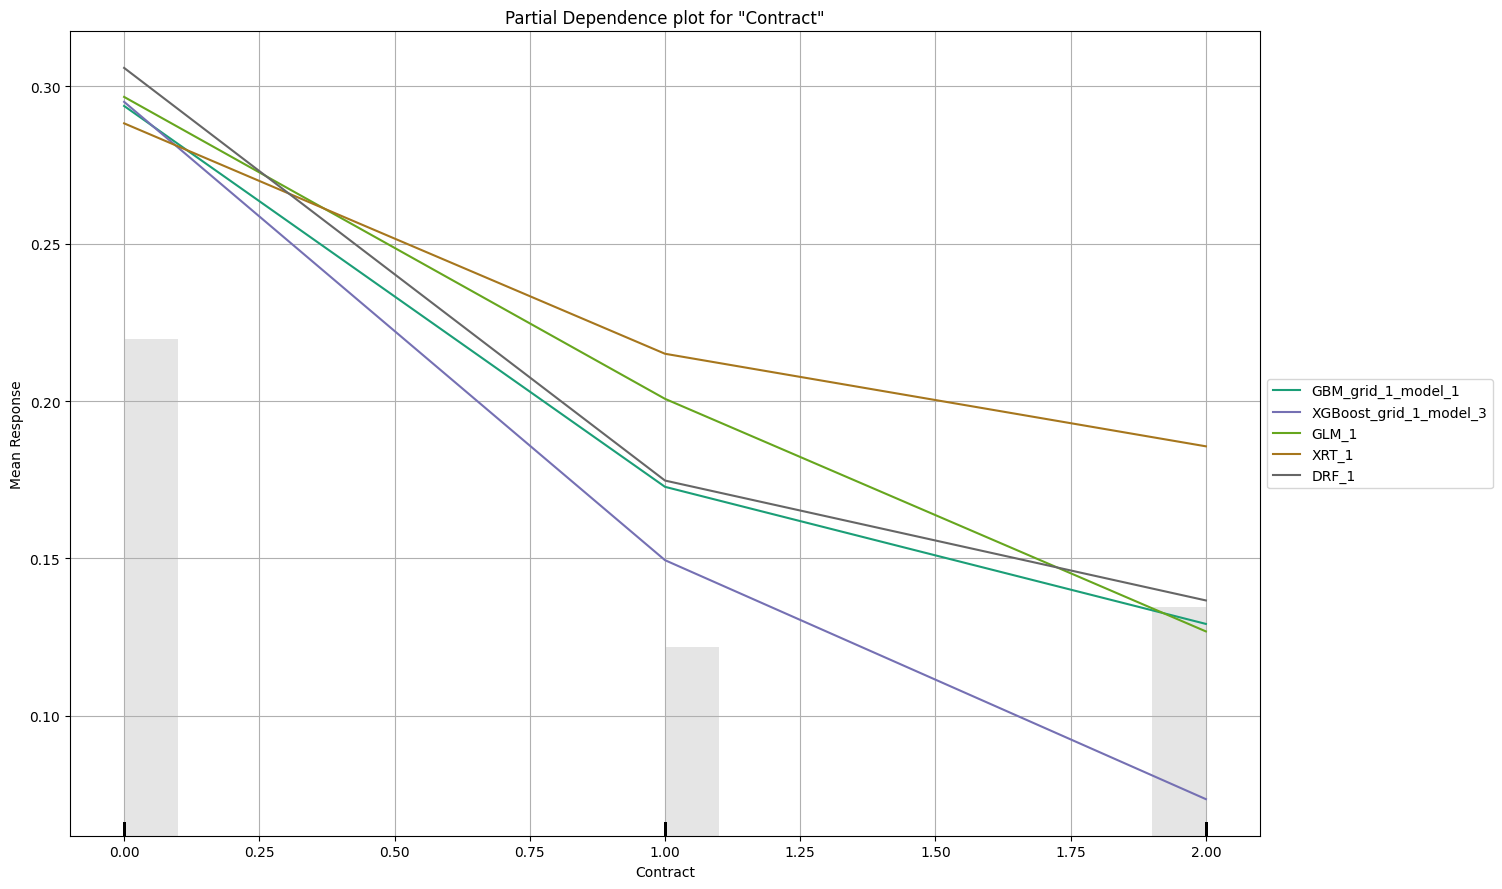

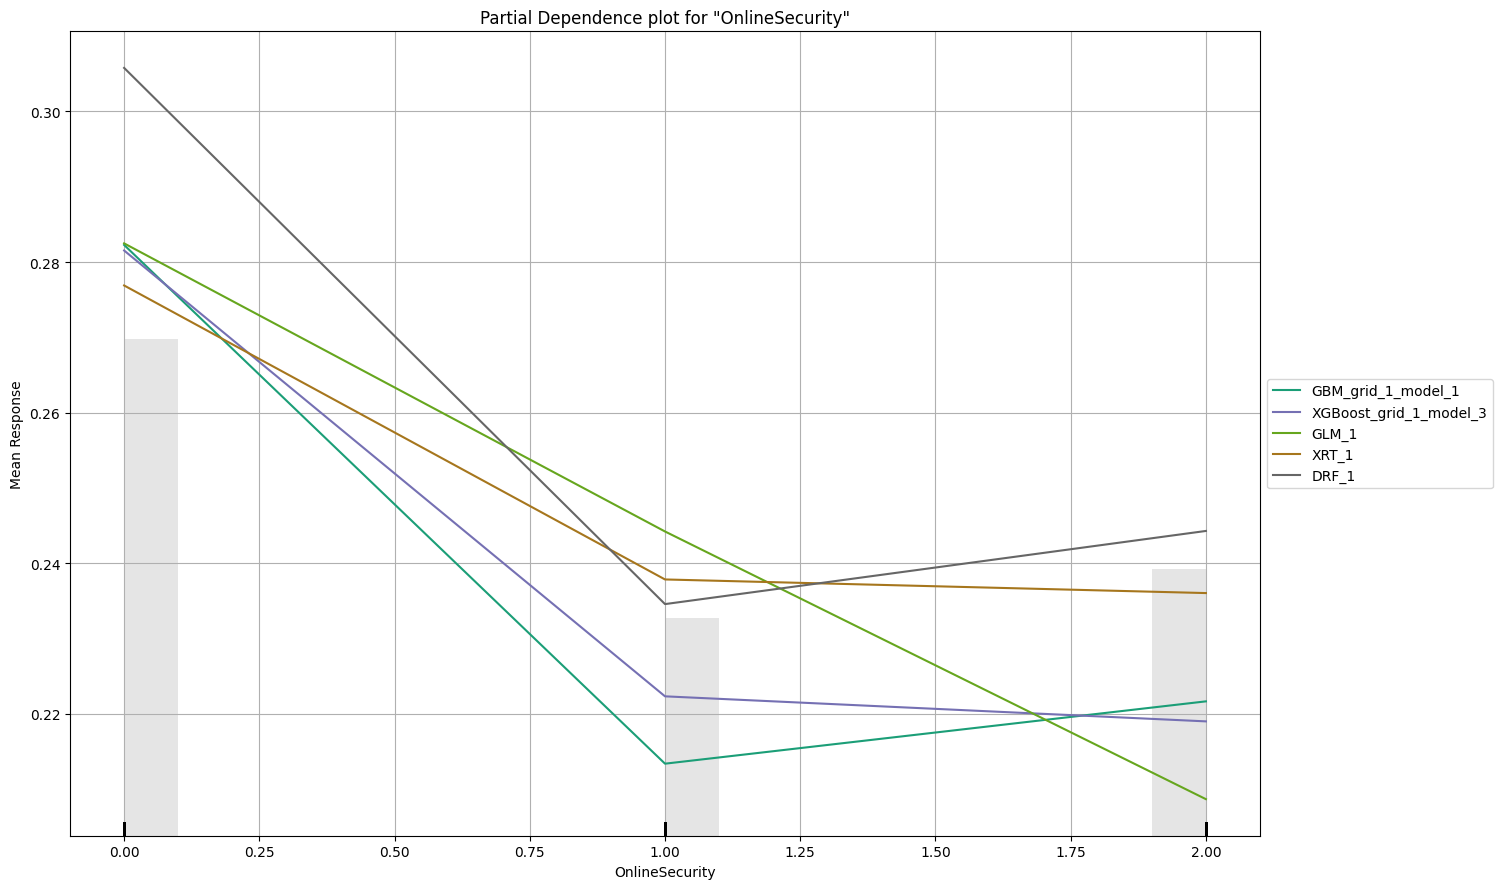

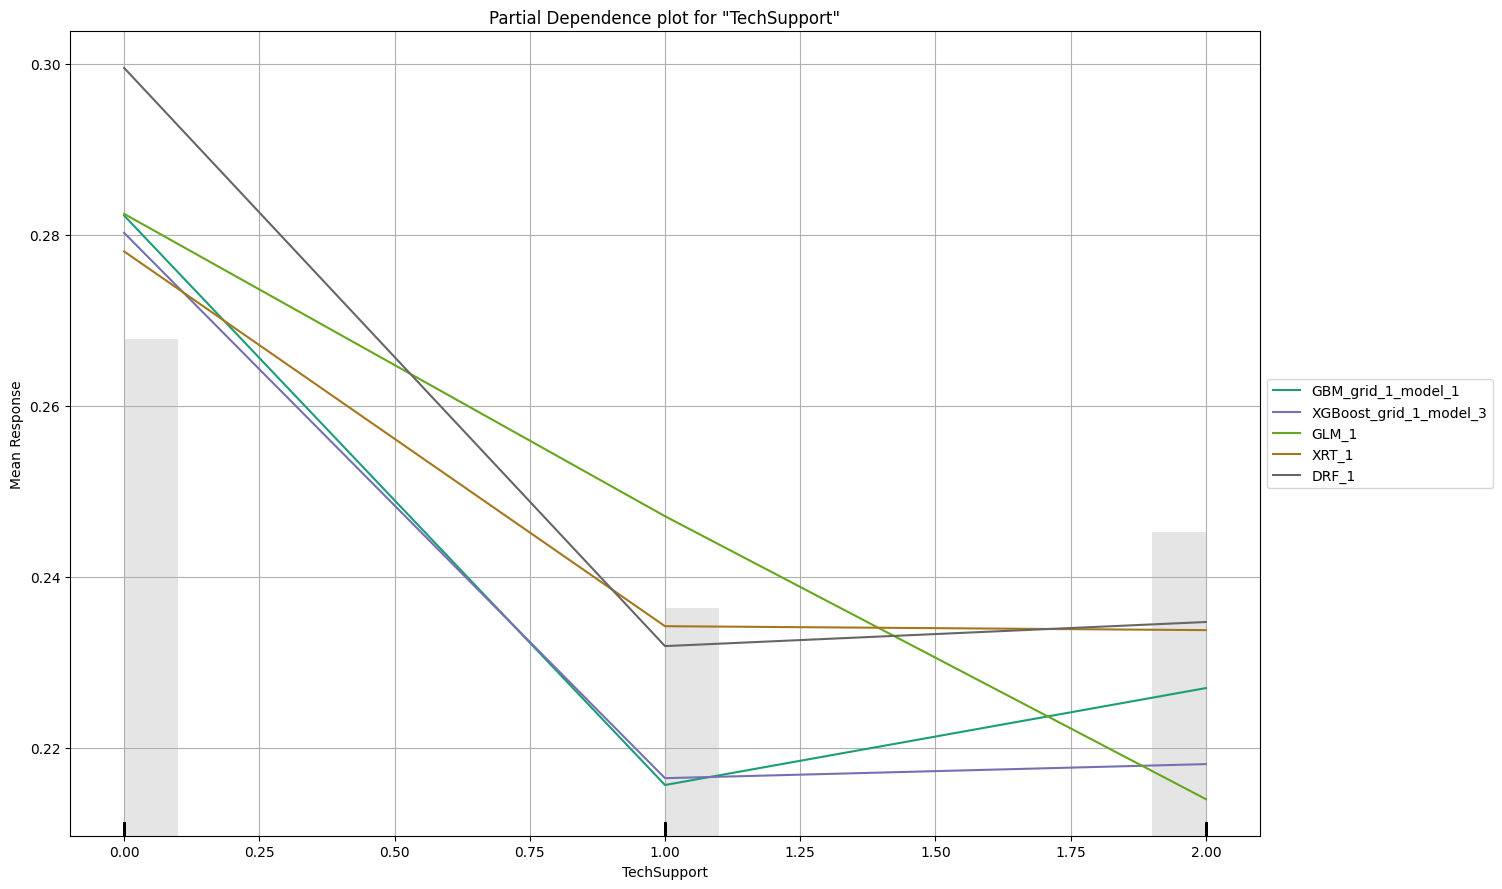

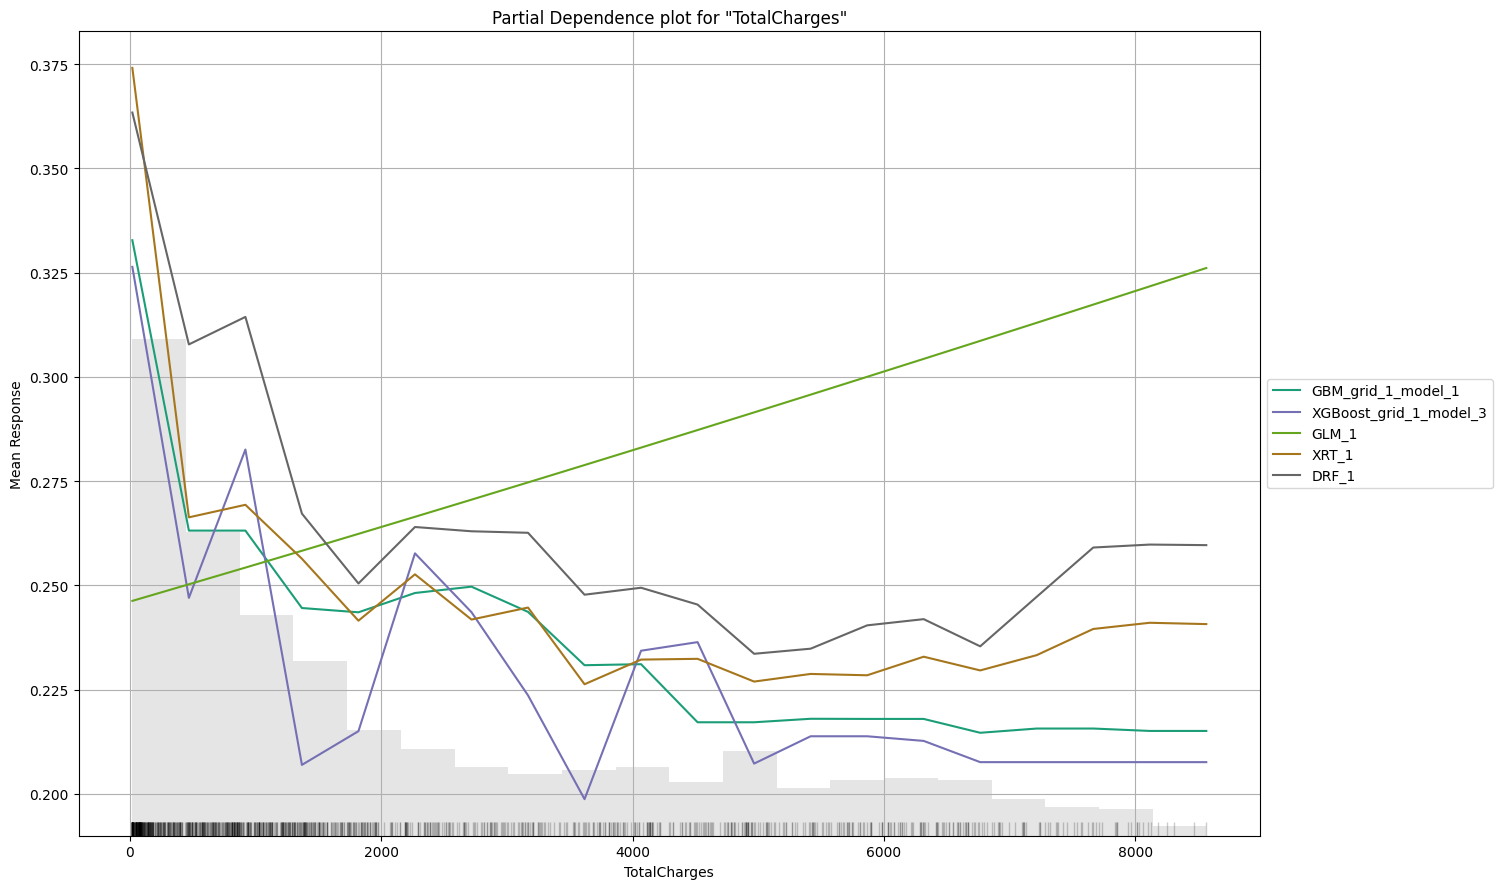

In [ ]:
exa_2 = auto_model_2.explain(test)

In [ ]:
h2o.automl.get_leaderboard(auto_model_2, extra_columns = "ALL")

model_id                                             auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
GBM_grid_1_AutoML_2_20230330_84118_model_1      0.850037   0.417329  0.68152                 0.221962  0.368761  0.135984                 852                   0.029129  GBM
GBM_1_AutoML_2_20230330_84118                   0.848374   0.416796  0.682093                0.224432  0.368839  0.136042                1498                   0.024465  GBM
XGBoost_grid_1_AutoML_2_20230330_84118_model_3  0.847174   0.418694  0.672511                0.234585  0.370613  0.137354                2705                   0.013873  XGBoost
GLM_1_AutoML_2_20230330_84118                   0.840442   0.427121  0.651966                0.231429  0.374185  0.140014                1031                   0.010124  GLM
XGBoost_3_AutoML_2_20230330_84118               0.840245   0.427553  0.661051                0.2377    0.37412   0.139966                 968                   0.01643   XGBoost
GBM_5_AutoML_2_20230330_84118                   0.837024   0.42992   0.655159                0.23588   0.376967  0.142104                1283                   0.026706  GBM
GBM_3_AutoML_2_20230330_84118                   0.835242   0.433367  0.655569                0.238189  0.377062  0.142176                1189                   0.023126  GBM
XGBoost_grid_1_AutoML_2_20230330_84118_model_1  0.833354   0.437095  0.648621                0.233753  0.379225  0.143812                1231                   0.01071   XGBoost
GBM_2_AutoML_2_20230330_84118                   0.831973   0.435026  0.653744                0.249047  0.378391  0.14318                 1321                   0.030545  GBM
XGBoost_2_AutoML_2_20230330_84118               0.829473   0.447     0.63675                 0.236858  0.382501  0.146307                1470                   0.015187  XGBoost
[15 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_2_20230330_84118_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.337078812749743
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     680   160    0.1905   (160.0/840.0)
Yes    75    186    0.2874   (75.0/261.0)
Total  755   346    0.2134   (235.0/1101.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

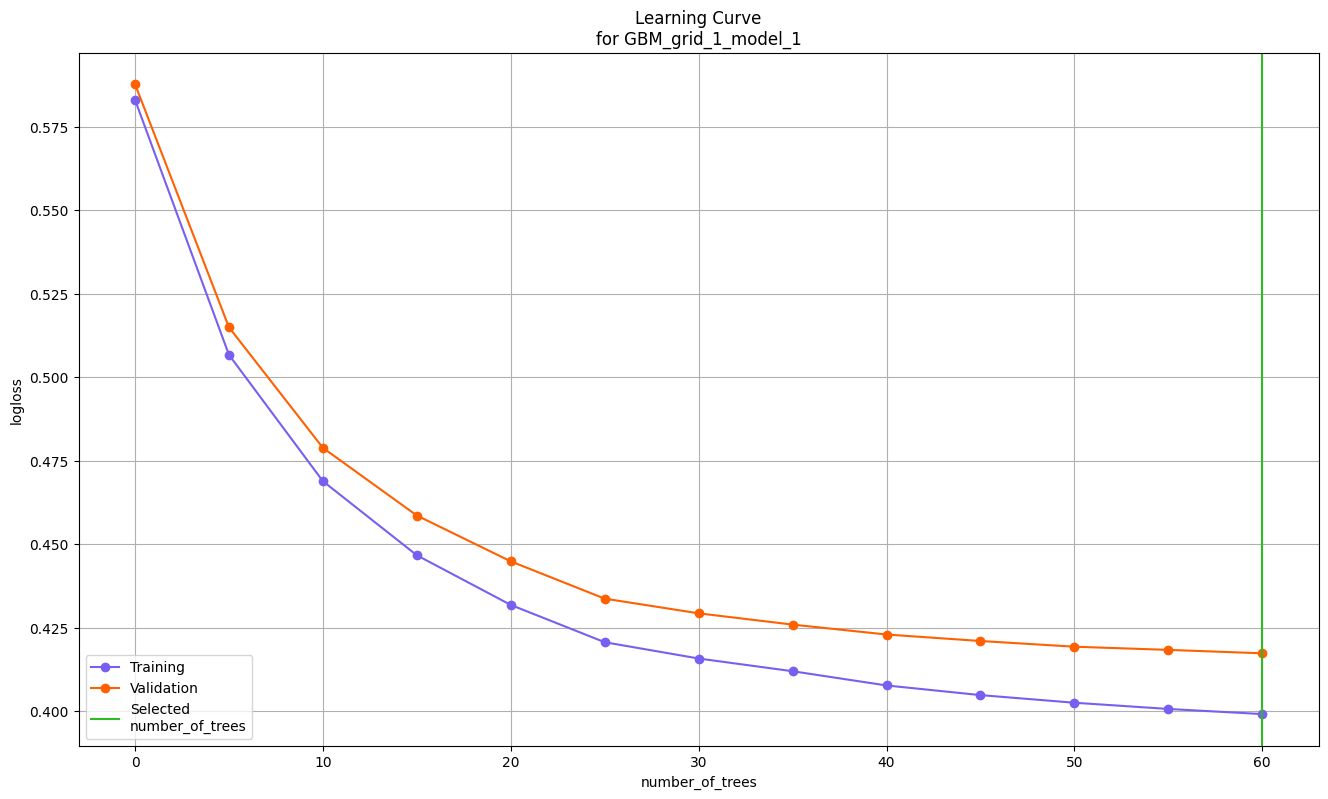

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

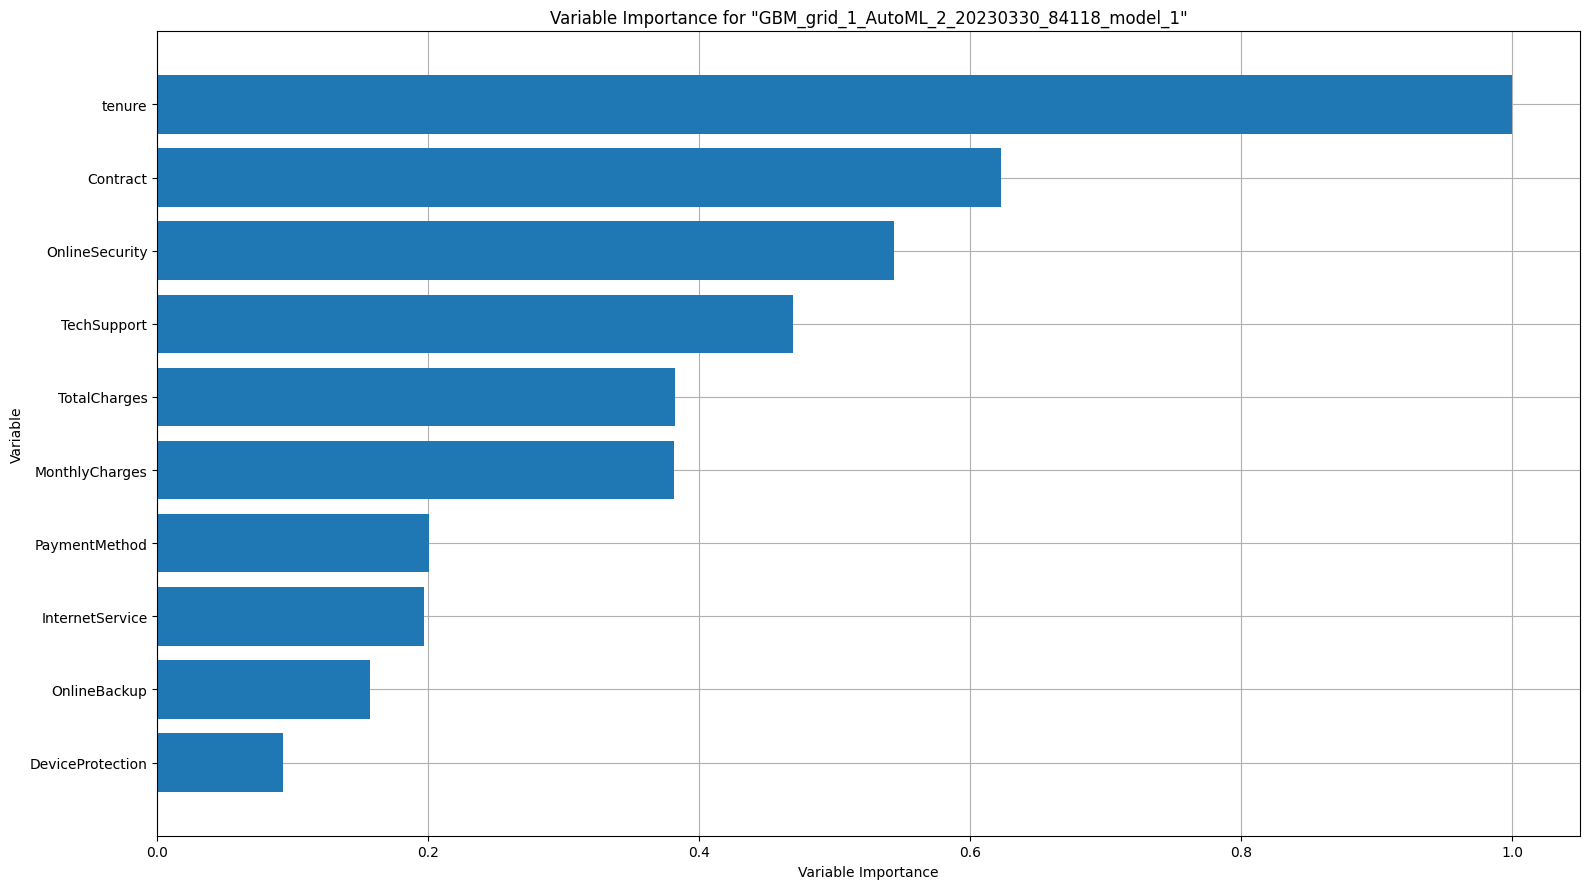

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

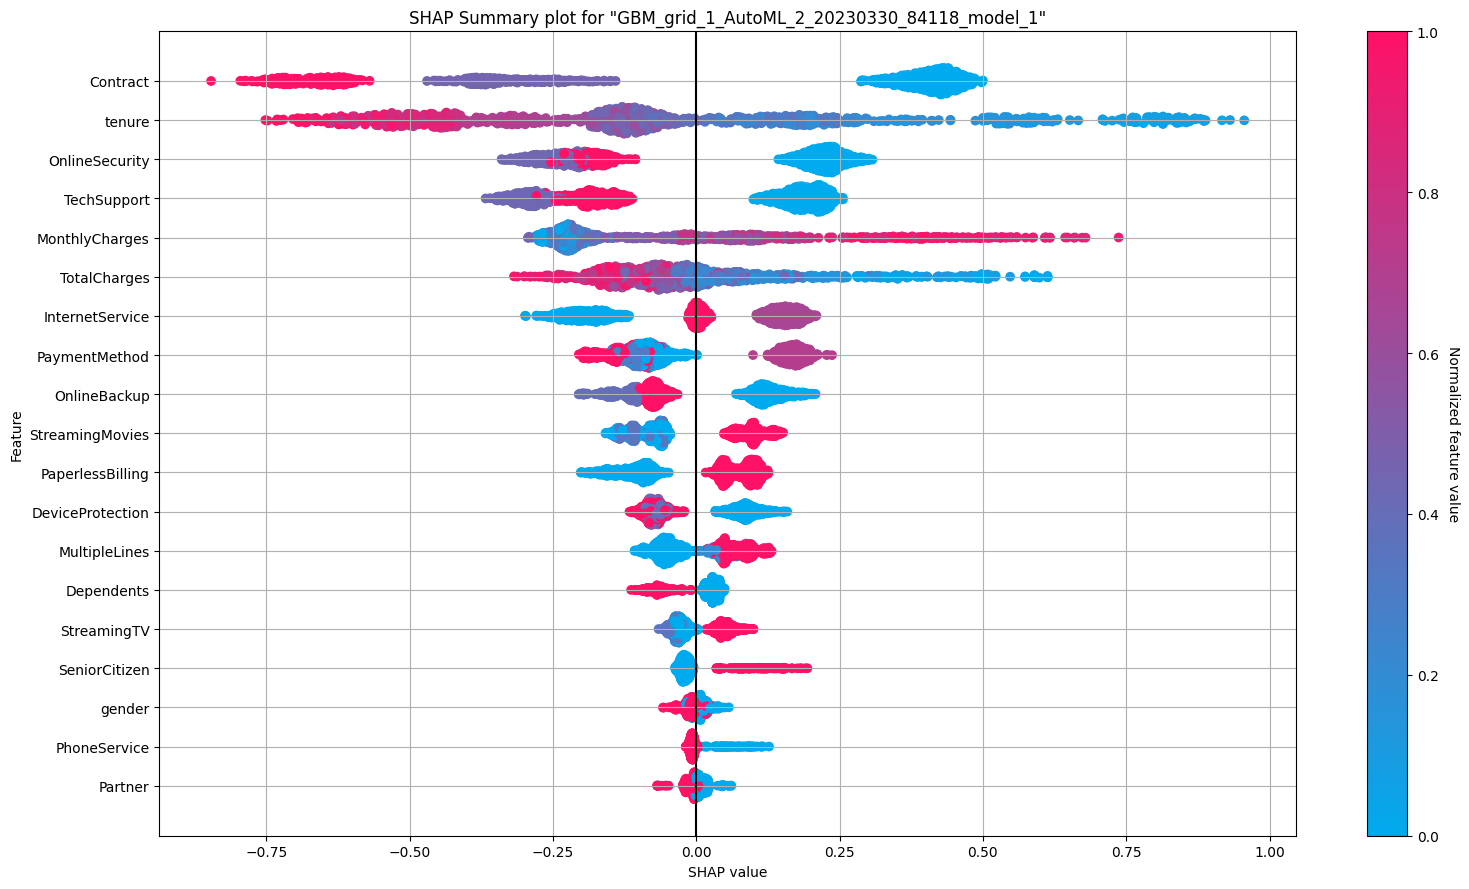

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

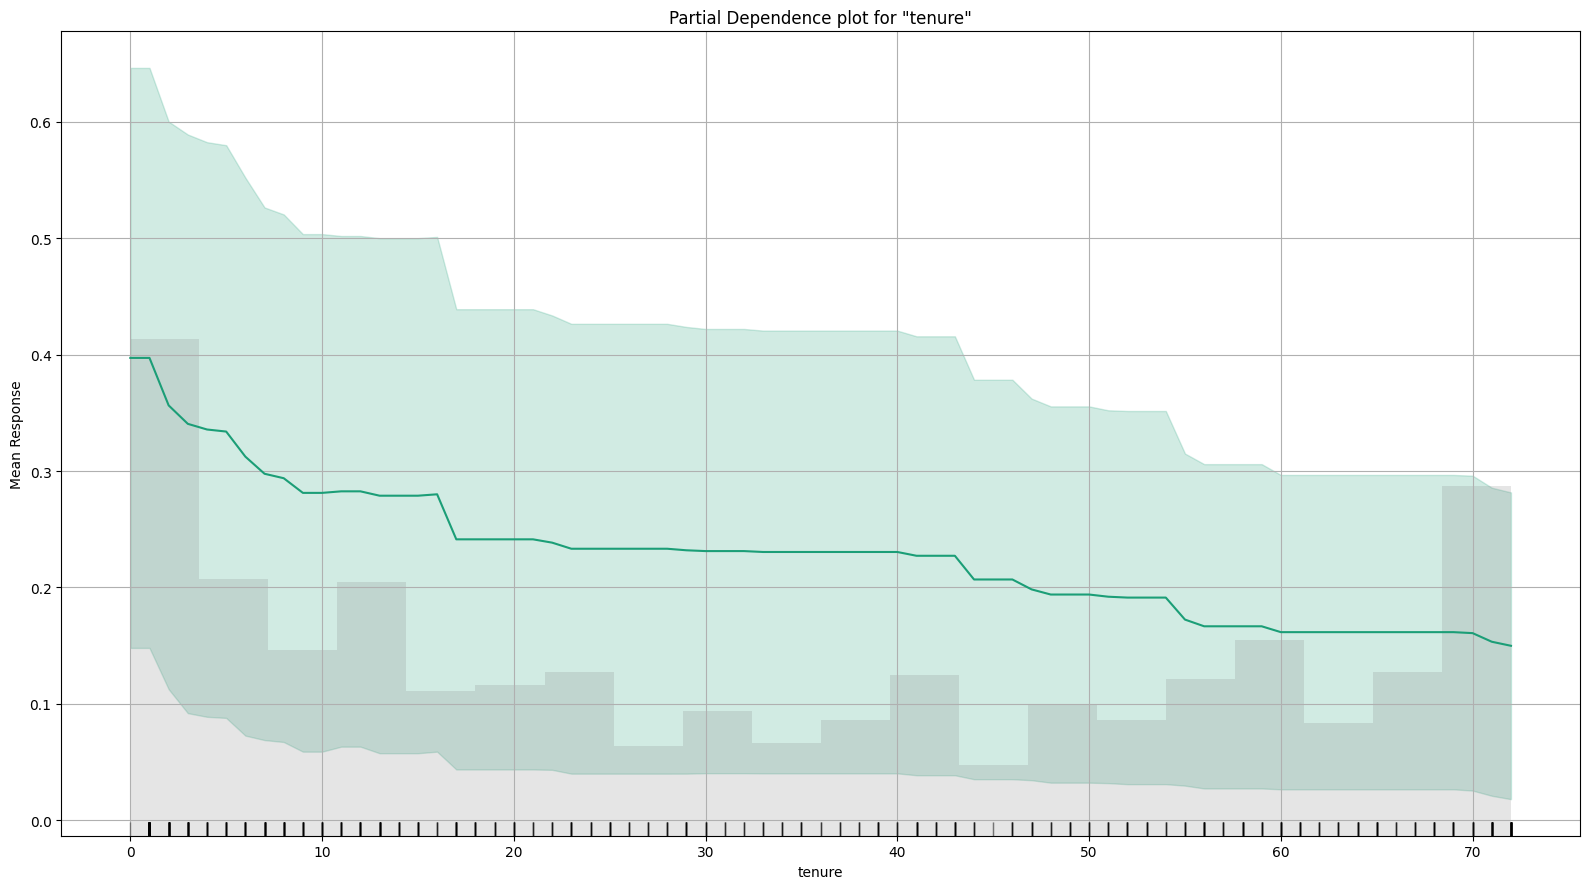

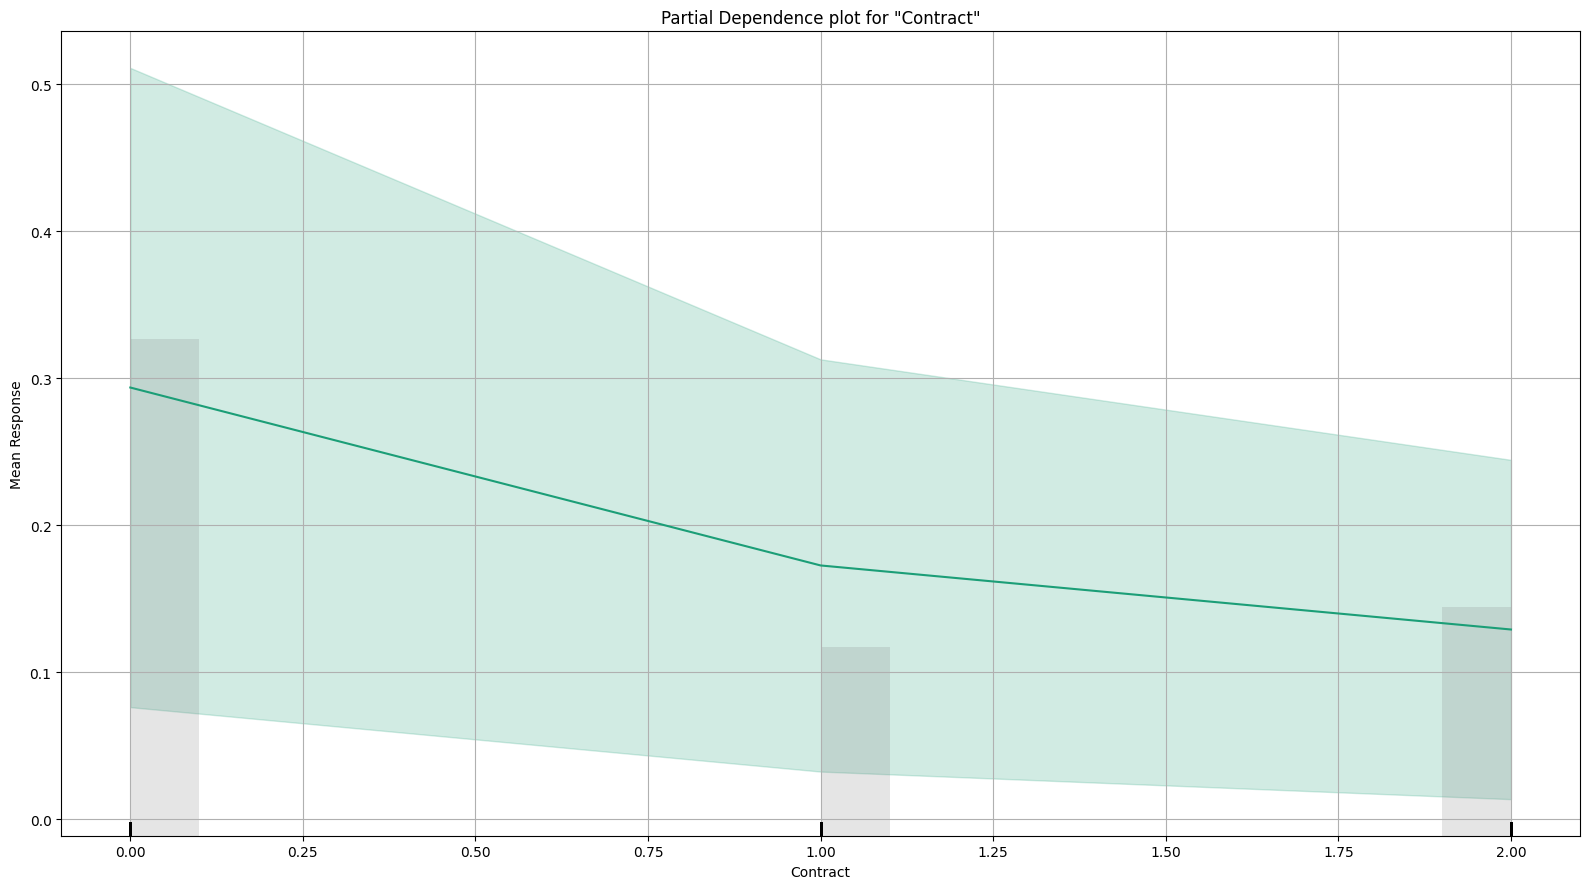

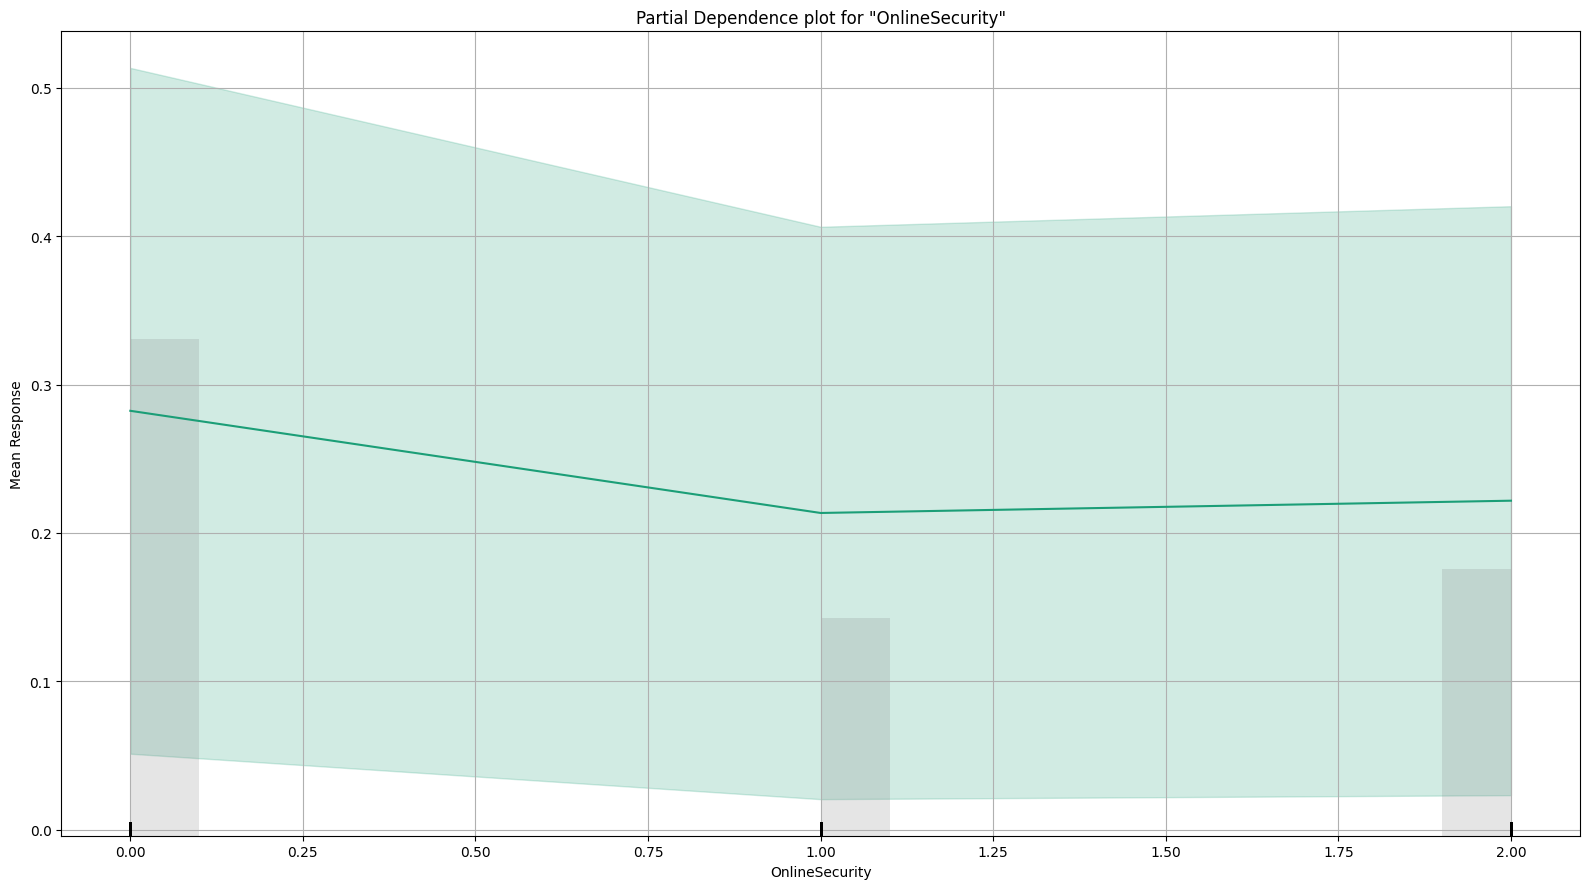

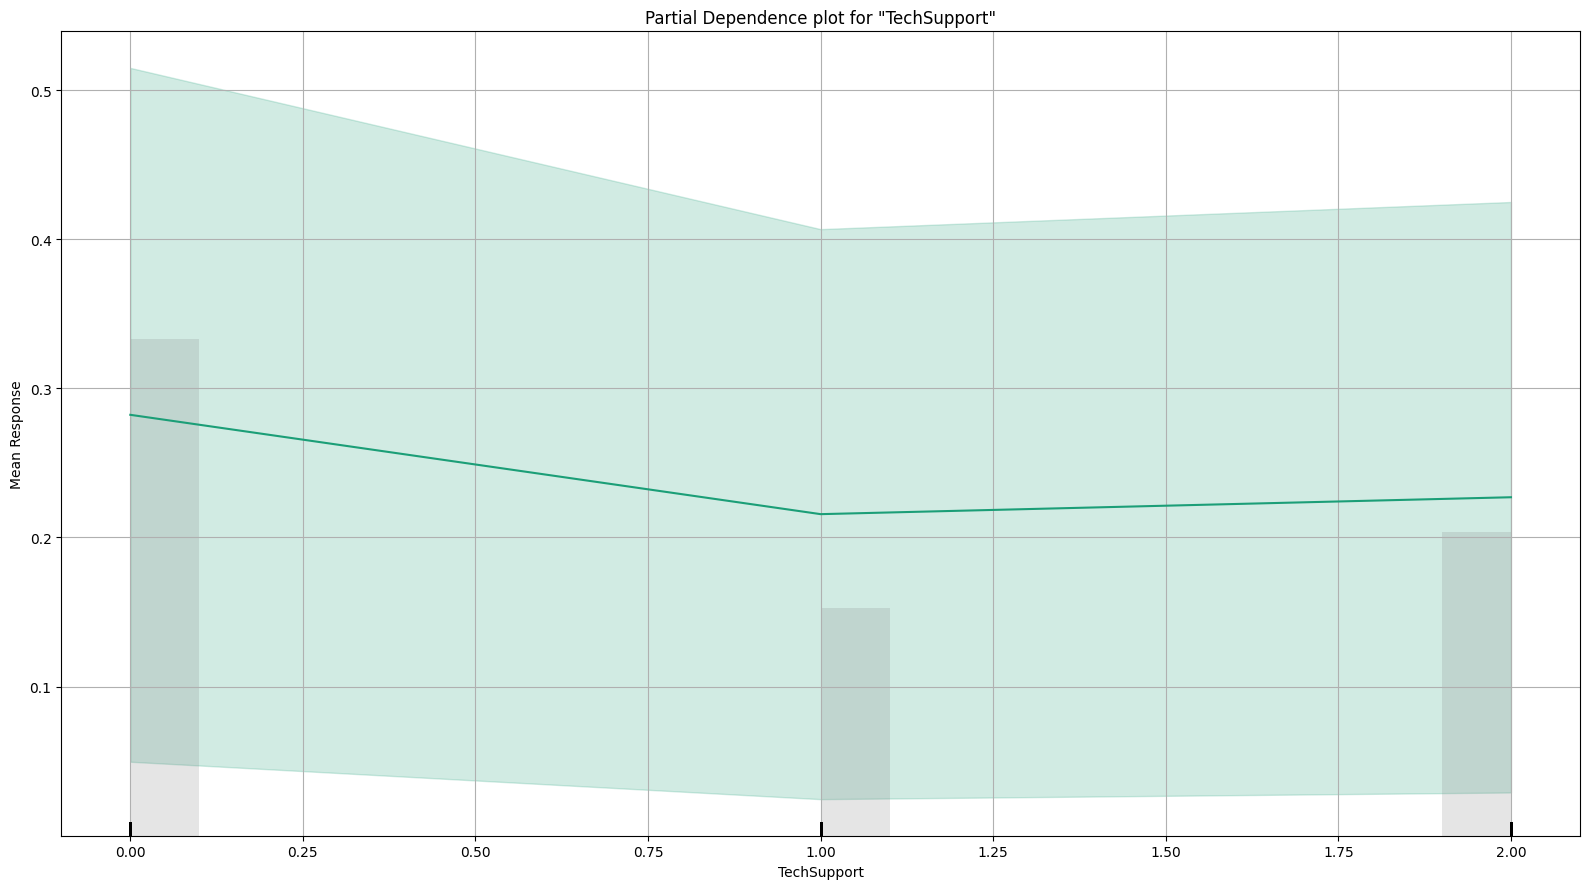

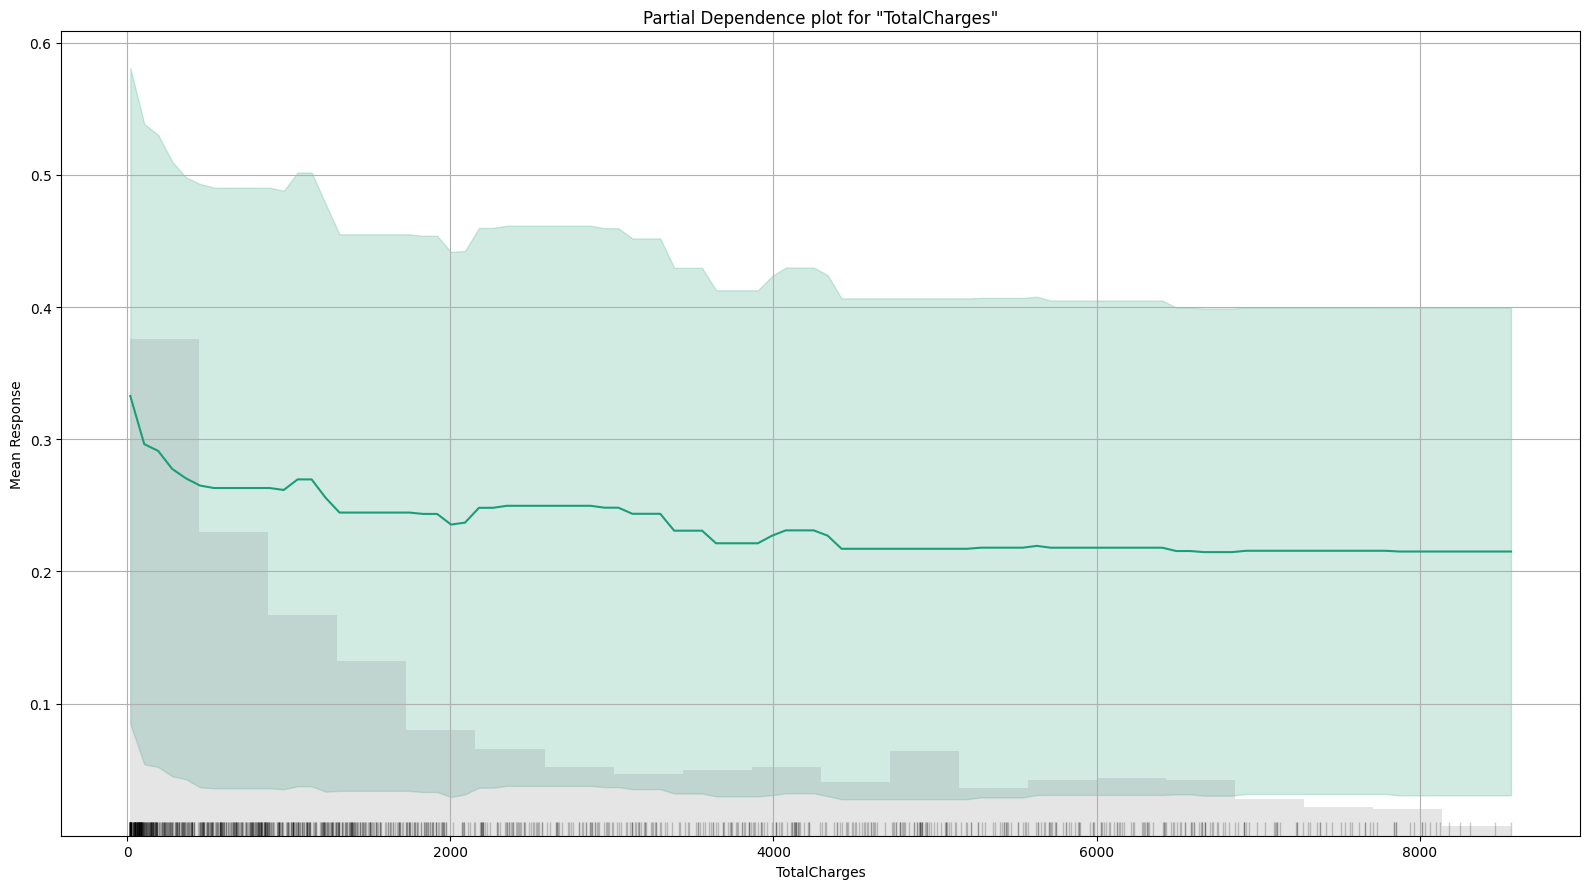

In [ ]:
exa_leader = auto_model_2.leader.explain(test)

# 

# Fairness checks using Admissible ML

infogram Model Build progress: |█████████████████████████████████████████████████| (done) 100%


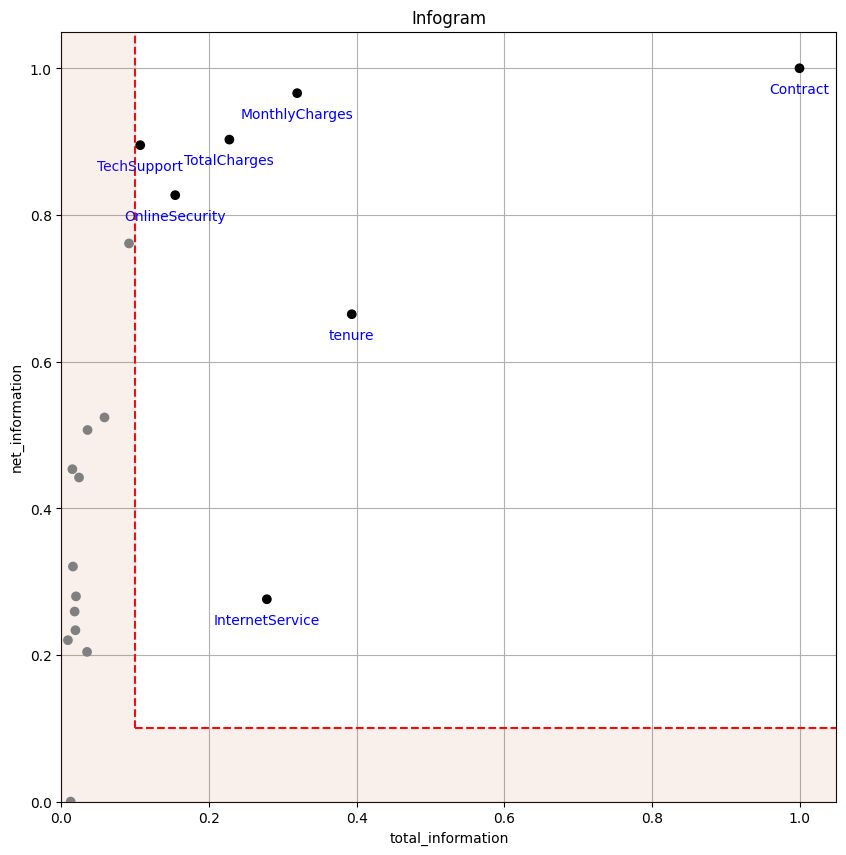

In [ ]:
#Core Infogram - measure of how much the variables drive the response, top right quadrant is the Admissible section
ig = H2OInfogram()
ig.train(x=x, y=y, training_frame = churn_train, validation_frame=churn_valid)
ig.plot()

# Getting the Protected Columns and inspecting the model fairness
*   Race
*   Color
*   Religion
*   National Origin
*   Sex
*   Marital Status
*   Age

In our case, the protected columns should be categorical data (Documentation constraint).



In [ ]:
# For a fair infogram, you must remove any protected variables
train.columns

['C1',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

infogram Model Build progress: |█████████████████████████████████████████████████| (done) 100%


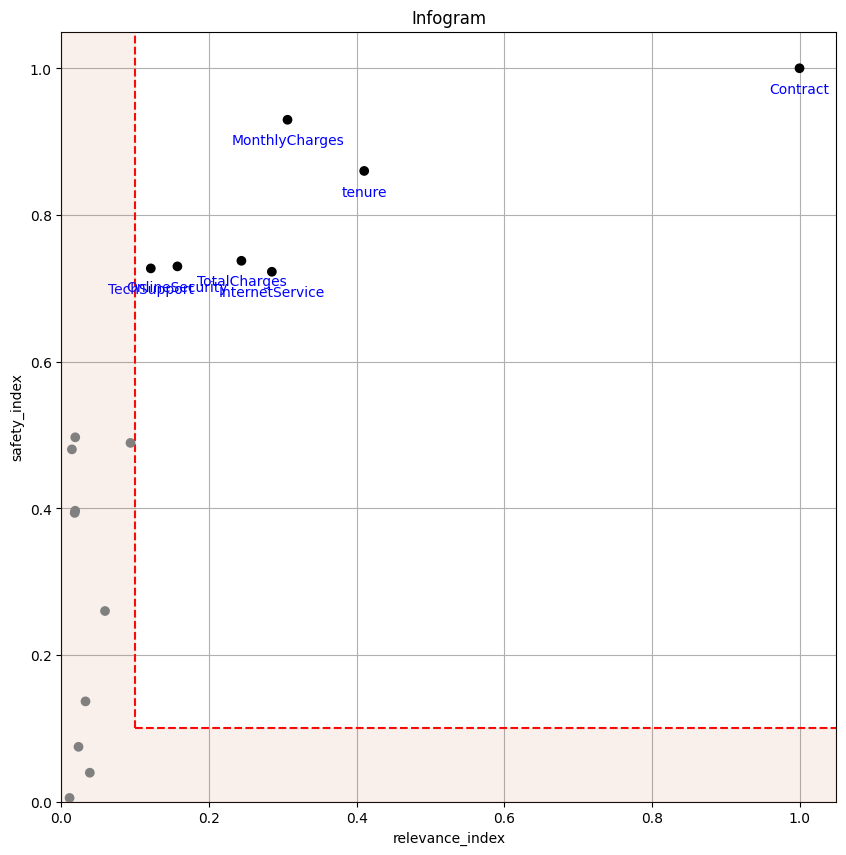

In [ ]:
pcols = ['gender', 'Partner']
ig2 = H2OInfogram(protected_columns = pcols)
ig2.train(x=x, y=y, training_frame=churn_train, validation_frame=churn_valid)
ig2.plot()

In [ ]:
#admissible score frames
asf1 = ig.get_admissible_score_frame()
asf1

column              admissible    admissible_index    total_information    net_information     cmi_raw
----------------  ------------  ------------------  -------------------  -----------------  ----------
Contract                     1            1                   1                   1         0.0100488
MonthlyCharges               1            0.719448            0.319398            0.96602   0.00970738
TotalCharges                 1            0.658264            0.227531            0.902692  0.009071
TechSupport                  1            0.637428            0.106785            0.895112  0.00899483
OnlineSecurity               1            0.594823            0.154189            0.826955  0.00830993
tenure                       1            0.546099            0.39336             0.664618  0.00667863
PaymentMethod                0            0.542061            0.0916106           0.761096  0.00764813
PaperlessBilling             0            0.372682            0.0583561           0.523811  0.0052637
MultipleLines                0            0.35917             0.0354068           0.506707  0.00509182
DeviceProtection             0            0.320672            0.0148686           0.453255  0.00455469
[19 rows x 6 columns]

In [ ]:
asf2 = ig2.get_admissible_score_frame()
asf2

column              admissible    admissible_index    relevance_index    safety_index    cmi_raw
----------------  ------------  ------------------  -----------------  --------------  ---------
Contract                     1            1                 1                1         0.127694
MonthlyCharges               1            0.692198          0.306326         0.929753  0.118724
tenure                       1            0.673731          0.410216         0.859971  0.109813
TotalCharges                 1            0.549221          0.243852         0.737443  0.0941673
InternetService              1            0.54921           0.285103         0.722481  0.0922567
OnlineSecurity               1            0.527897          0.15715          0.729832  0.0931953
TechSupport                  1            0.521205          0.121116         0.727076  0.0928434
PaymentMethod                0            0.352128          0.0935783        0.489112  0.0624568
OnlineBackup                 0            0.351508          0.0187343        0.496755  0.0634327
DeviceProtection             0            0.339769          0.0142068        0.480296  0.061331
[17 rows x 6 columns]

In [ ]:
#get admissible columns
acols = ig2.get_admissible_features()

#get unprotected columns
ucols = list(set(x).difference(pcols))

In [ ]:
reference = ["Male", "Yes"]
favorable_class = "No"
da = ig2.train_subset_models(H2OAutoML, y, churn_train, churn_test, pcols, reference, favorable_class, max_models=10, seed=1)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████████████████████████████████

model_id                                                       auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo               num_of_features         var    corrected_var    air_min    air_mean    air_median    air_max      cair    significant_air_min    significant_air_mean    significant_air_median    significant_air_max    p.value_min    p.value_mean    p.value_median    p.value_max
--------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------  -----------------  ----------  ---------------  ---------  ----------  ------------  ---------  --------  ---------------------  ----------------------  ------------------------  ---------------------  -------------  --------------  ----------------  -------------
GBM_1_AutoML_104_20230330_95212                           0.843833   0.425532  0.662929                0.224467  0.372014  0.138394                 566                   0.044657  GBM                             14  0.0027944        0.0027944    0.648848    0.831221      0.838019    1        0.833321               0.648848                0.69963                   0.69963                0.750412    1.04699e-10        0.28447          0.0689392              1
StackedEnsemble_AllModels_1_AutoML_104_20230330_95212     0.843311   0.425821  0.659015                0.227435  0.372127  0.138478               12157                   0.080151  StackedEnsemble                 14  0.00374301       0.00374301   0.685041    0.841683      0.840846    1        0.842401               0.685041                0.71242                   0.71242                0.739799    5.94168e-09        0.321388         0.142776               1
StackedEnsemble_BestOfFamily_1_AutoML_104_20230330_95212  0.843296   0.425889  0.658998                0.227435  0.372136  0.138486               14016                   0.124692  StackedEnsemble                 14  0.00350926       0.00350926   0.688273    0.845972      0.847807    1        0.846375               0.688273                0.715781                  0.715781               0.743289    1.09495e-08        0.34825          0.196499               1
StackedEnsemble_BestOfFamily_1_AutoML_102_20230330_94918  0.839992   0.429462  0.650847                0.230726  0.373993  0.139871               13466                   0.047315  StackedEnsemble                 12  0.00279696       0.00279696   0.702688    0.846756      0.842168    1        0.847777               0.702688                0.727128                  0.727128               0.751568    5.57486e-08        0.301718         0.103436               1
GBM_2_AutoML_107_20230330_95627                           0.839877   0.431562  0.654404                0.236034  0.374833  0.140499                 502                   0.022627  GBM                             17  0.00311353       0.00311353   0.726954    0.86763       0.871782    1        0.867191               0.726954                0.747104                  0.747104               0.767255    2.04159e-08        0.409622         0.319245               1
StackedEnsemble_AllModels_1_AutoML_97_20230330_94238      0.836191   0.434809  0.648859                0.24803   0.376325  0.141621               14112                   0.054294  StackedEnsemble                  7  0.00211479       0.00211479   0.737564    0.872219      0.875657    1        0.871691               0.737564                0.755365                  0.755365               0.773167    1.81152e-06        0.417943         0.335885               1
GBM_2_AutoML_102_20230330_94918                           0.832467   0.440212  0.629213                0.248119  0.378512  0.143271                 406                   0.027476  GBM                             12  0.00198047       0.00198047   0.754581    0.875301      0.873311    1        0.874968   

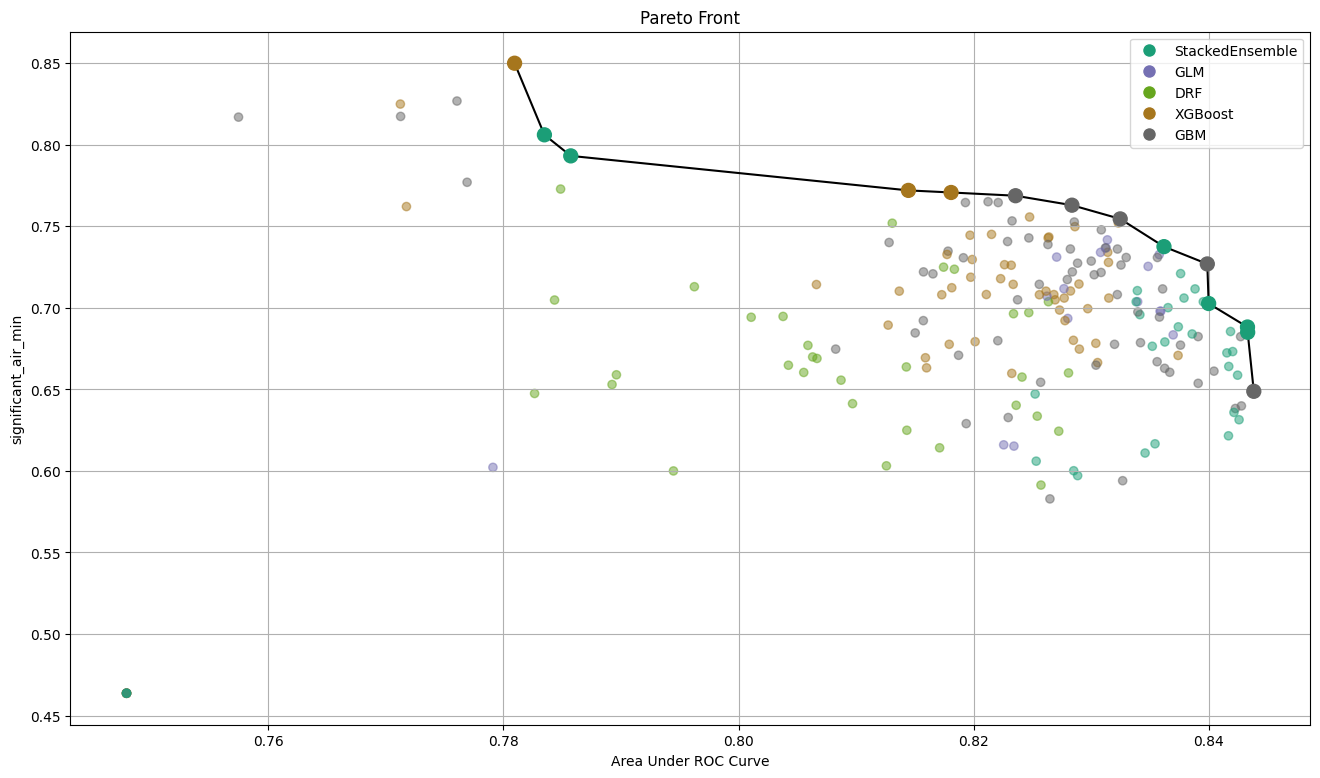

In [ ]:
h2o.explanation.pareto_front(da, x_metric="auc", y_metric="significant_air_min", optimum="top right", color_col="algo")

In [ ]:
#pick a model that fits the four fifth rule
potentially_fair_model = h2o.get_model(da[da["significant_air_min"] > 0.8, "model_id"][0, 0])

# Overview for model StackedEnsemble_AllModels_1_AutoML_92_20230330_93644

> The following table shows fairness metrics for intersections determined using the protected_columns. Apart from the fairness metrics, there is a p-value from Fisher's exact test or G-test (depends on the size of the intersections) for hypothesis that being selected (positive response) is independent to being in the reference group or a particular protected group.

After the table there are two kinds of plot. The first kind starts with AIR prefix which stands for Adverse Impact Ratio. These plots show values relative to the reference group and also show two dashed lines corresponding to 0.8 and 1.25 (the four-fifths rule). 
 The second kind is showing the absolute value of given metrics. The reference group is shown by using a different colored bar.

gender    Partner      AIR_auc    AIR_aucpr    AIR_f1    AIR_selectedRatio       auc     aucpr        f1     p.value    selectedRatio    total
--------  ---------  ---------  -----------  --------  -------------------  --------  --------  --------  ----------  ---------------  -------
Female    No          0.922401     0.923971  0.873975             0.806144  0.756831  0.873066  0.748503  0.00146739         0.555147      272
Male      No          0.87634      0.902089  0.843971             0.826211  0.719037  0.852389  0.722807  0.00712321         0.568966      232
Female    Yes         0.988273     0.992695  0.974844             1.04013   0.810878  0.938003  0.834891  0.55063            0.716279      215
Male      Yes         1            1         1                    1         0.8205    0.944906  0.856436  1                  0.688645      273
[4 rows x 12 columns]

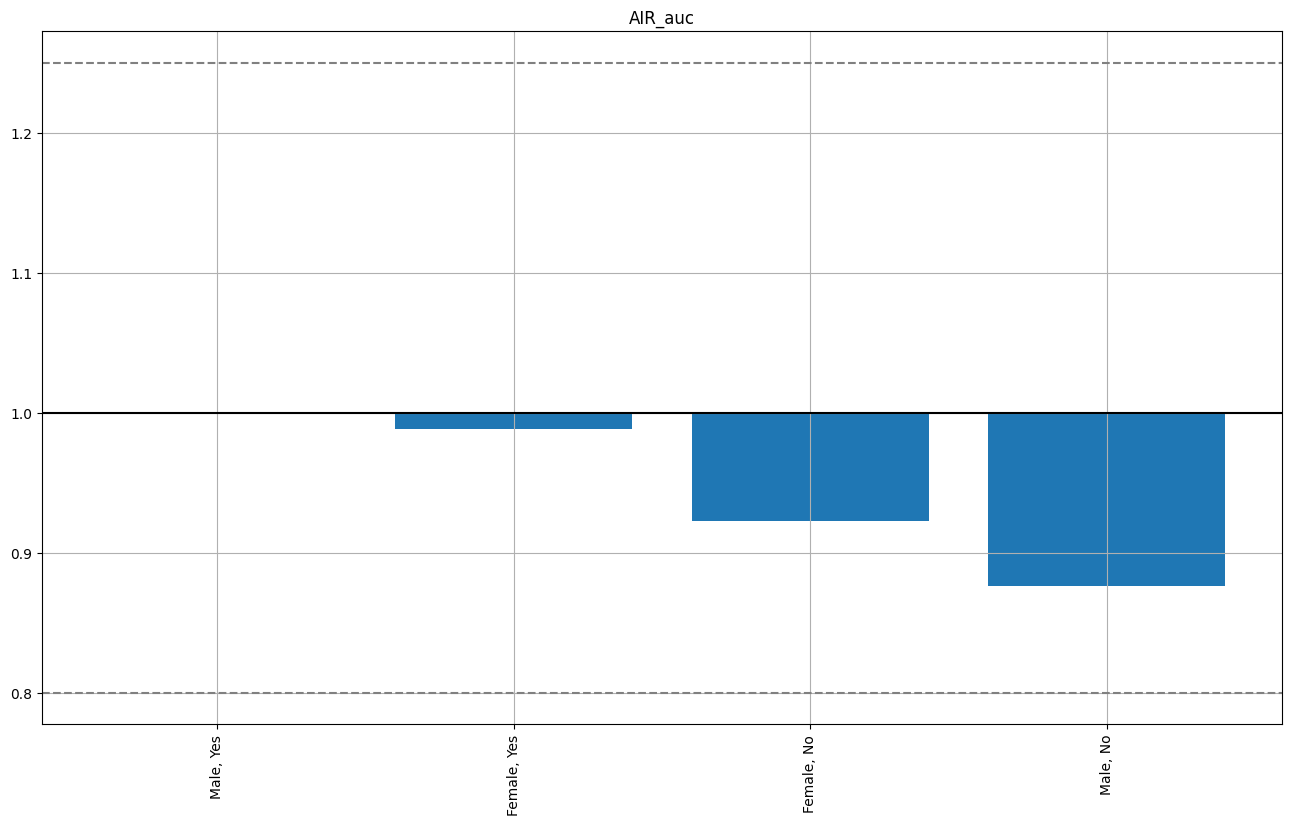

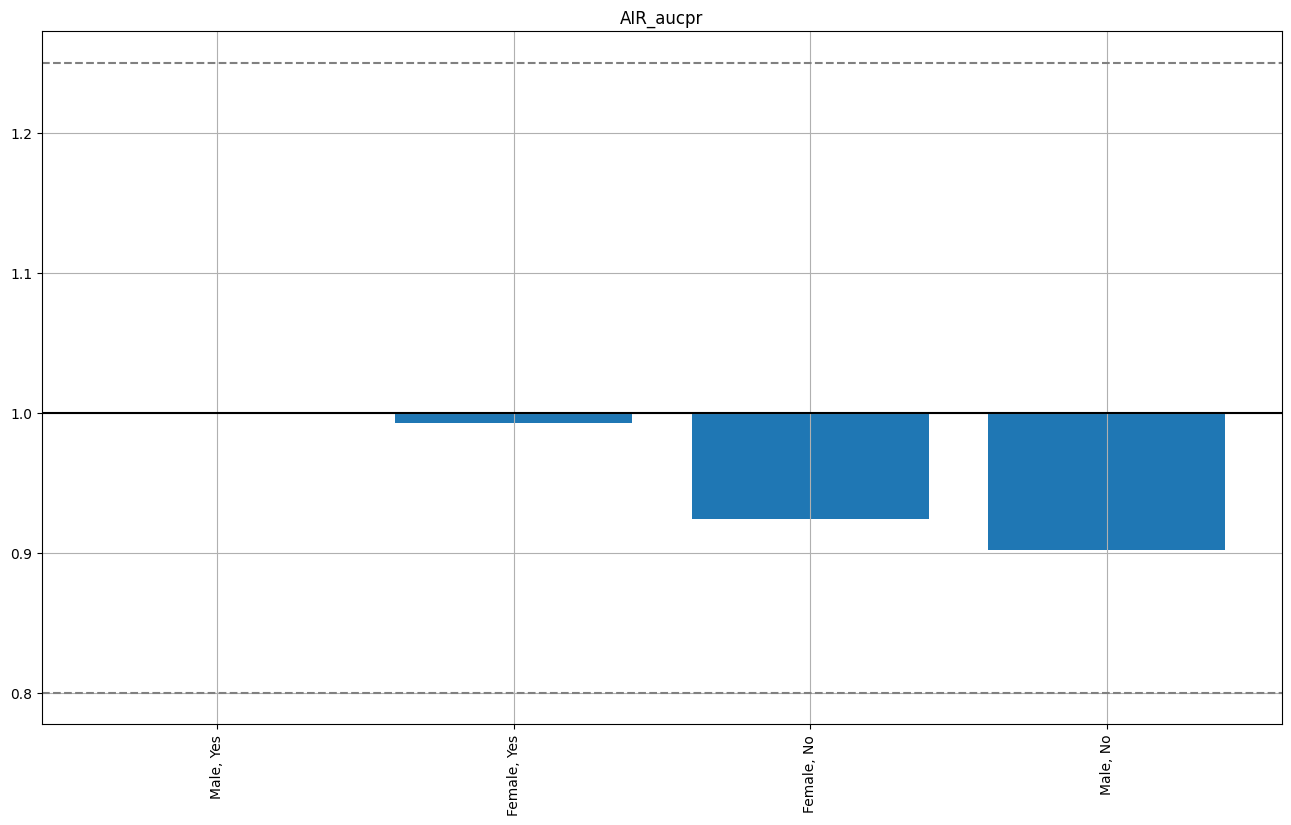

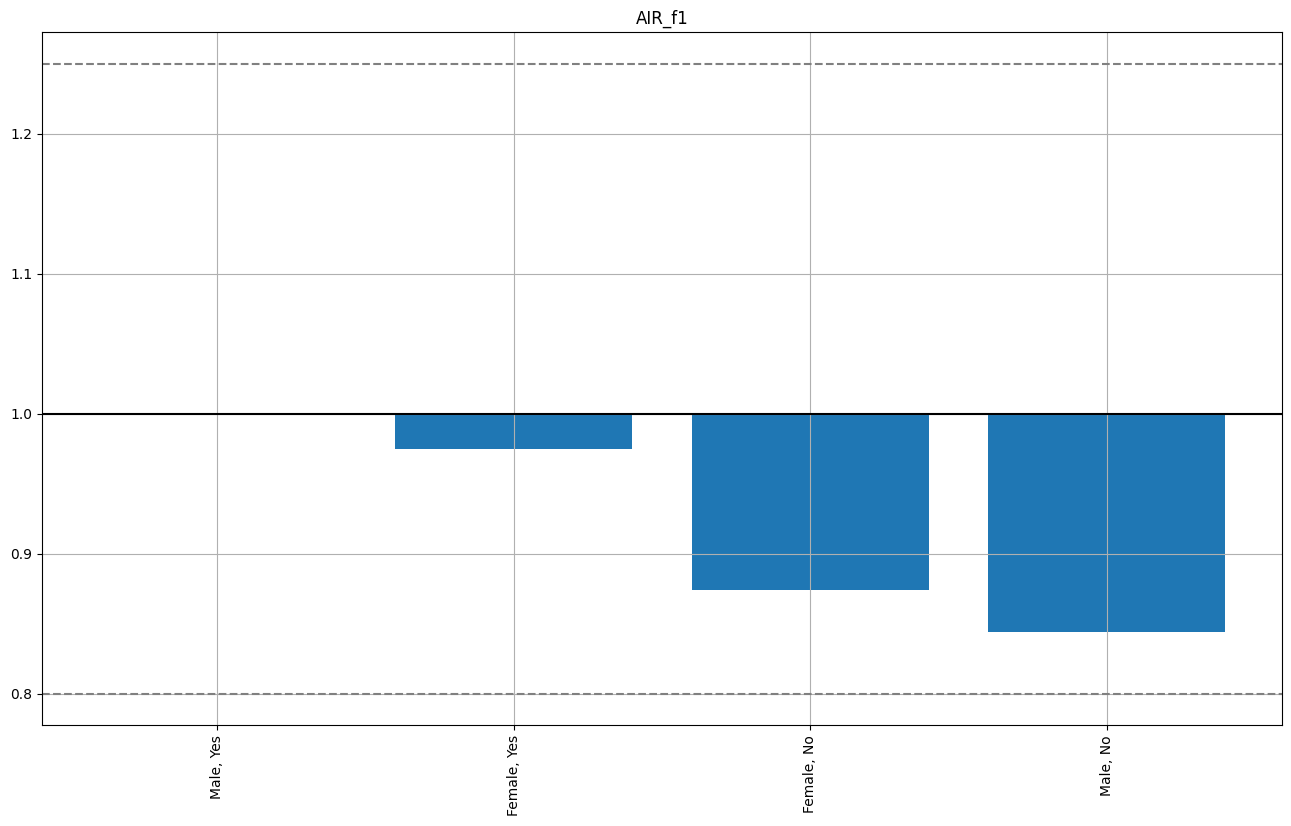

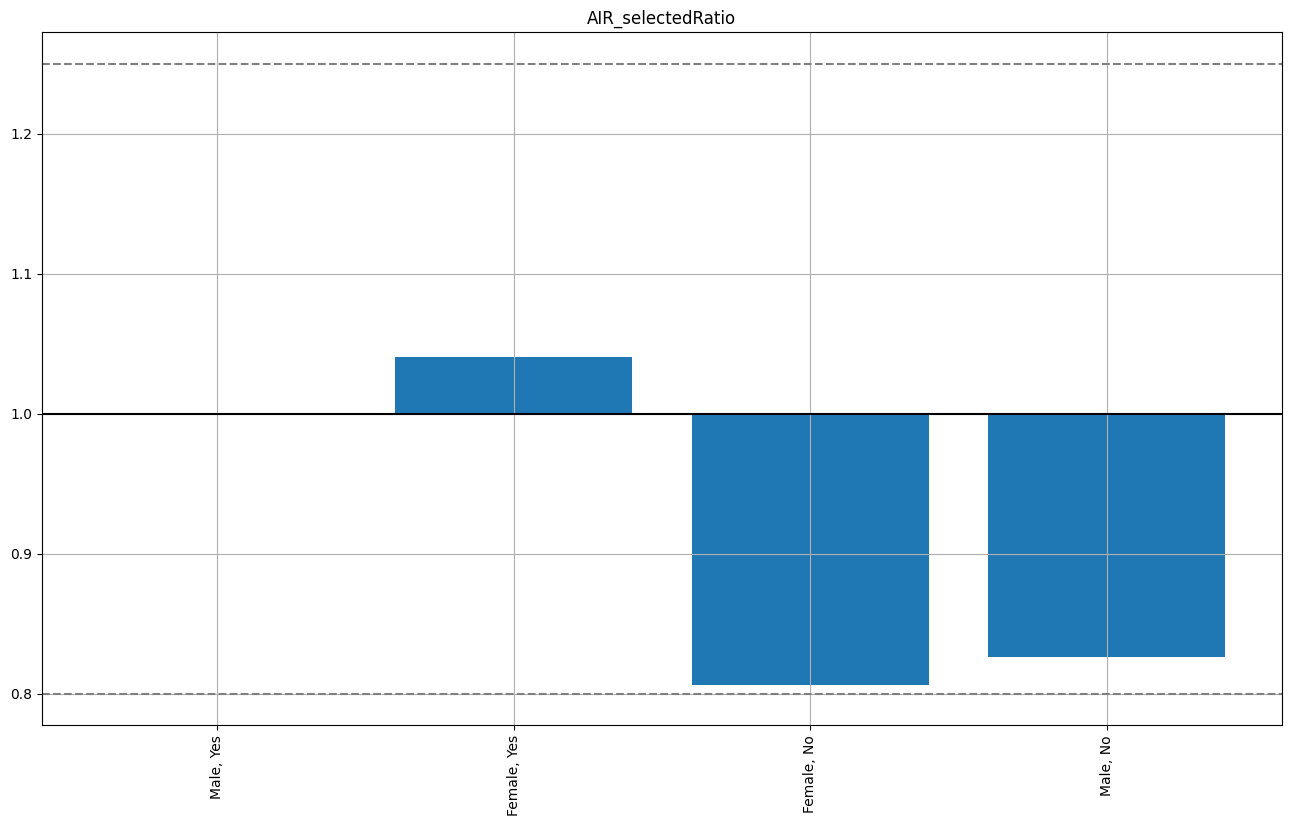

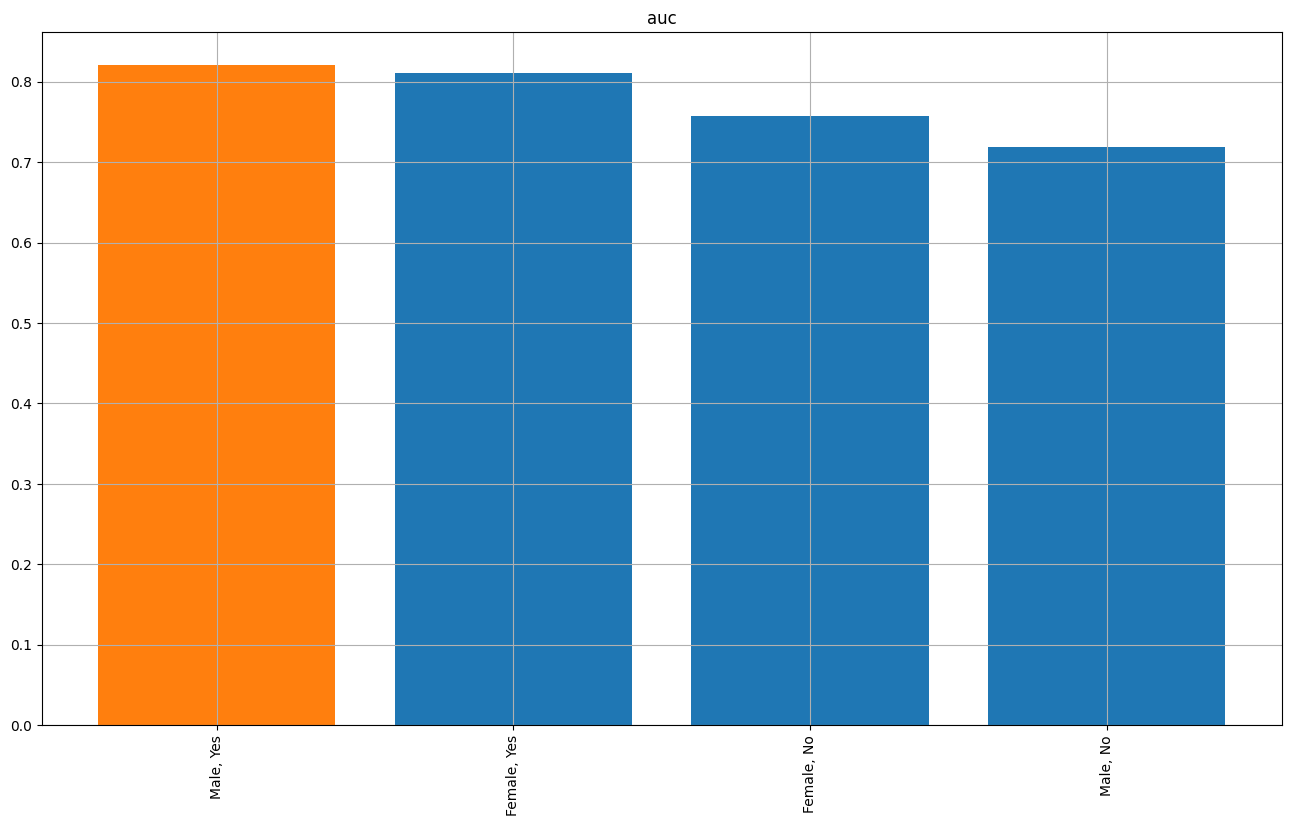

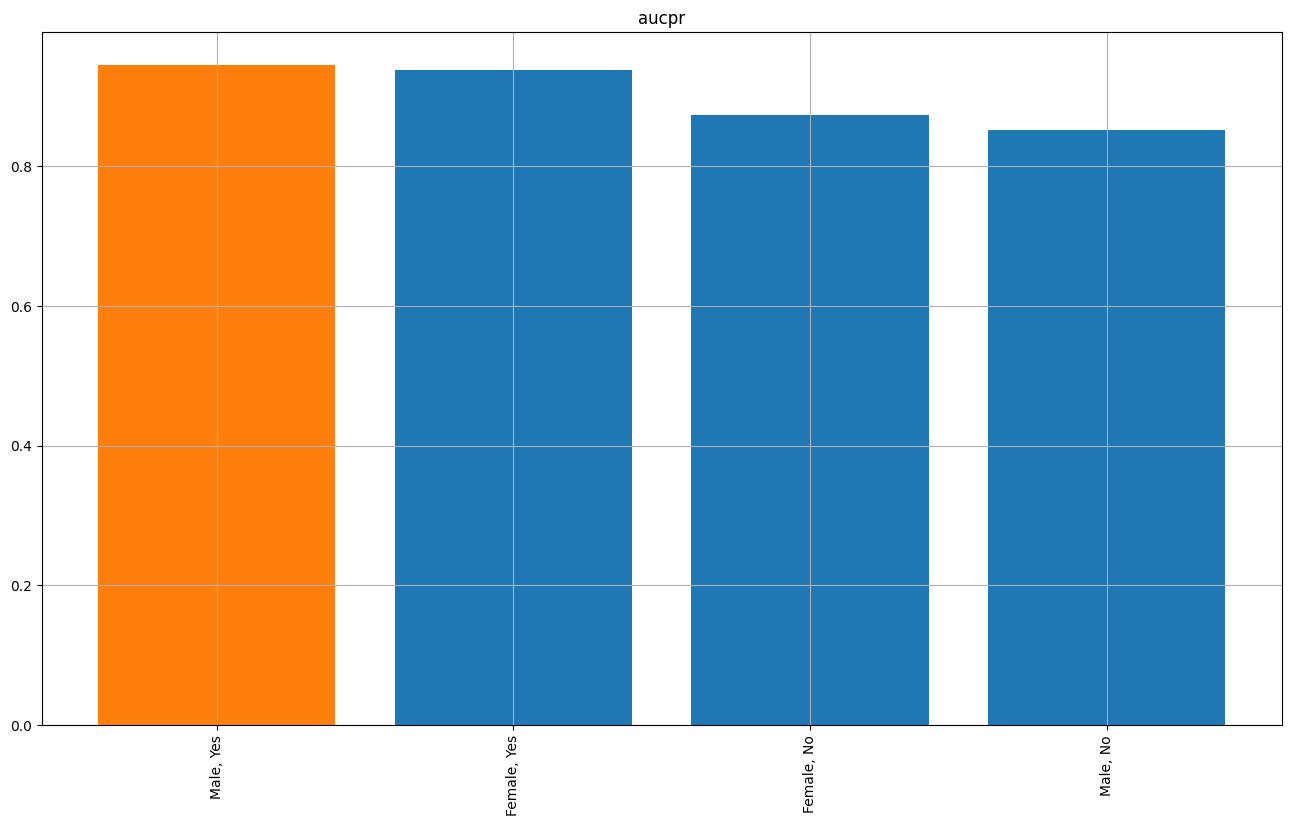

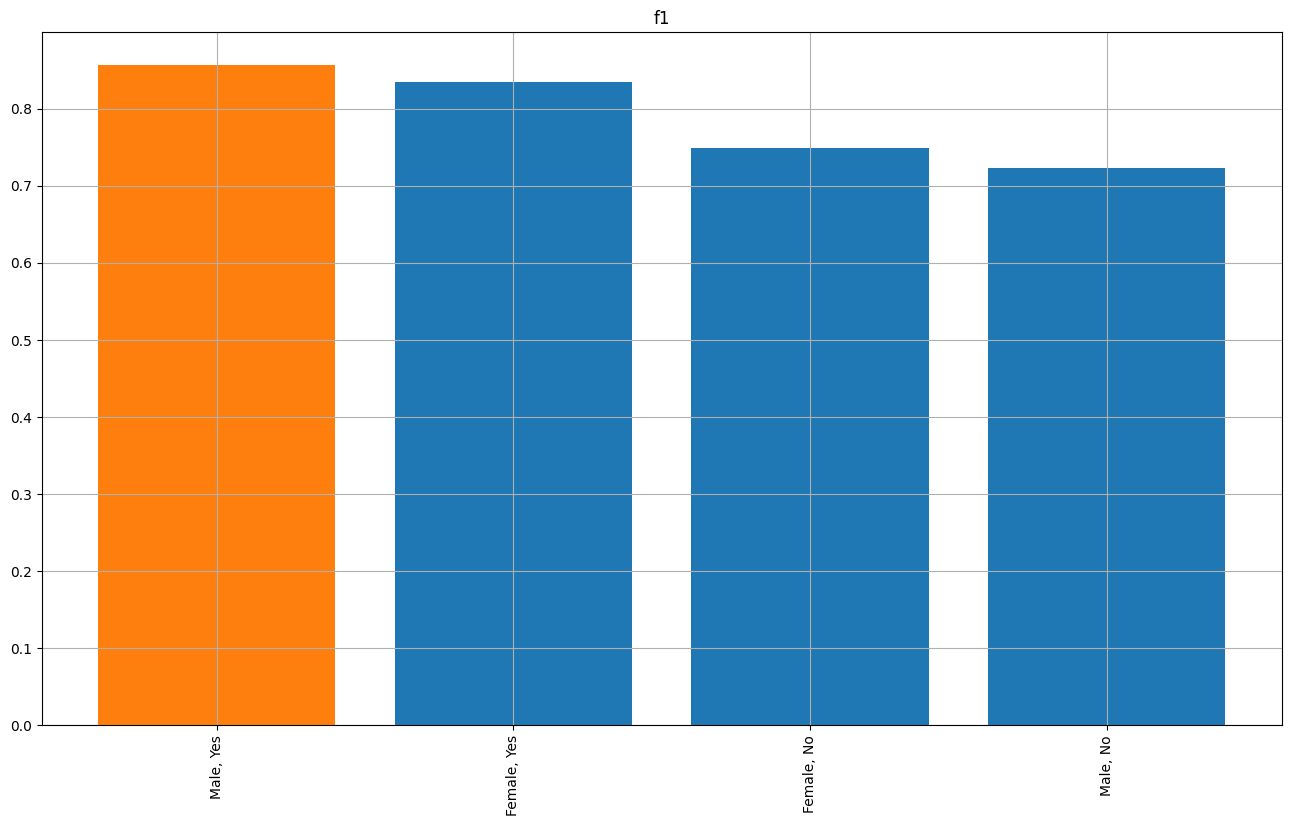

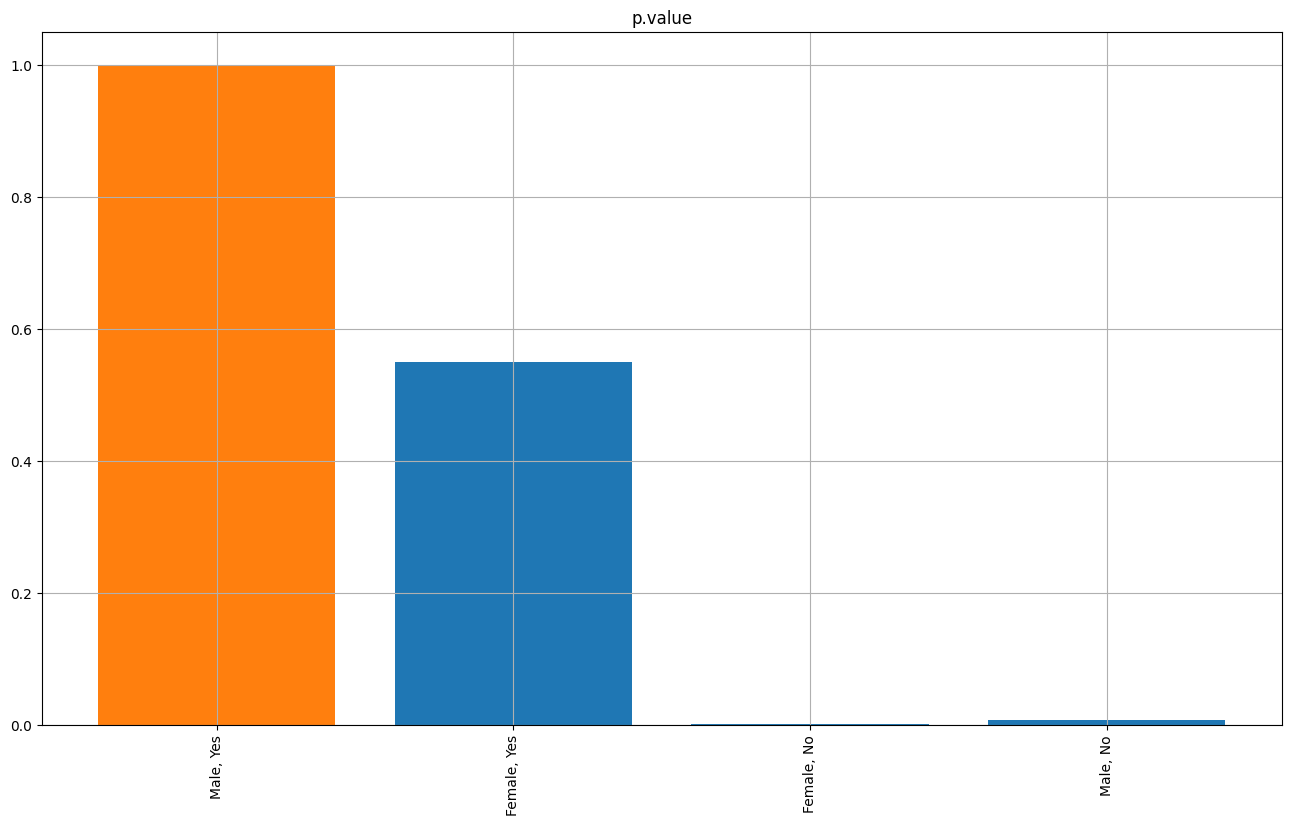

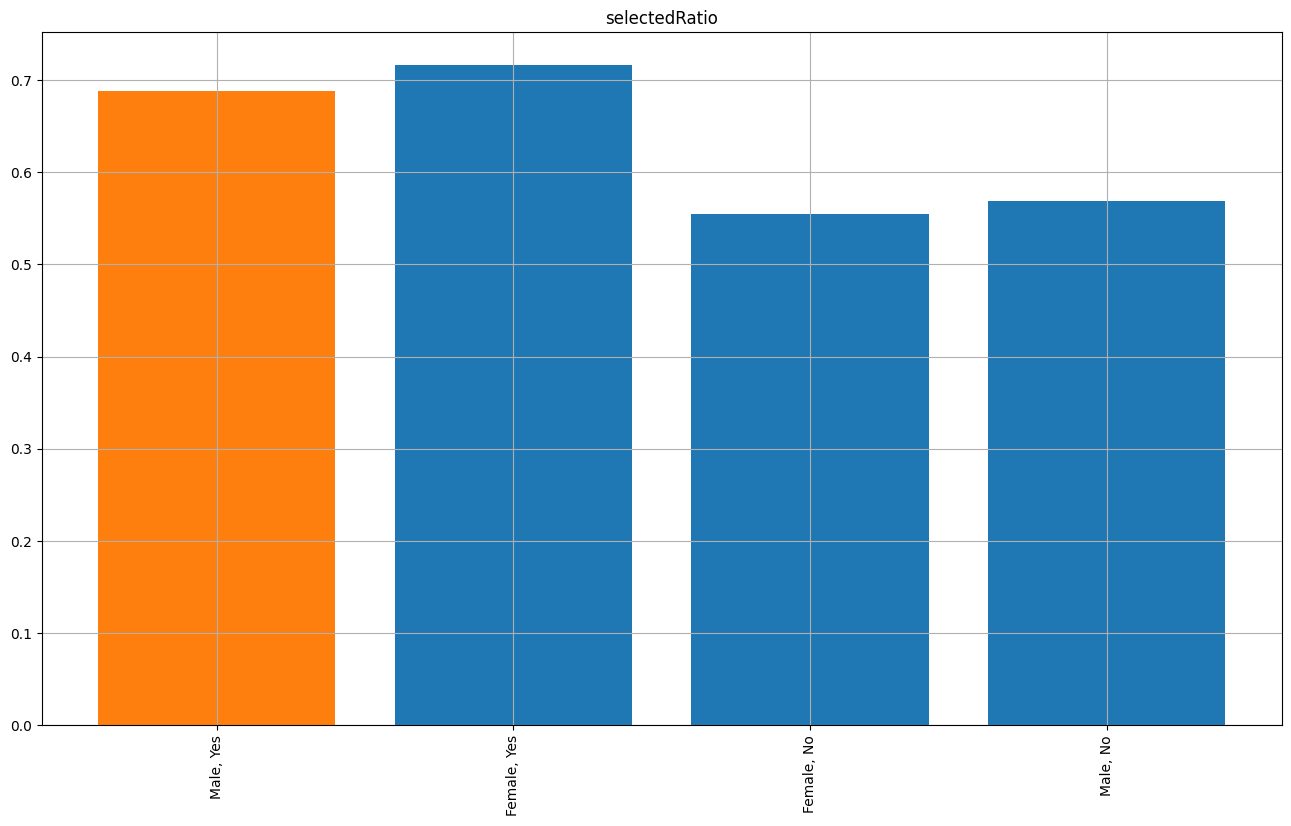

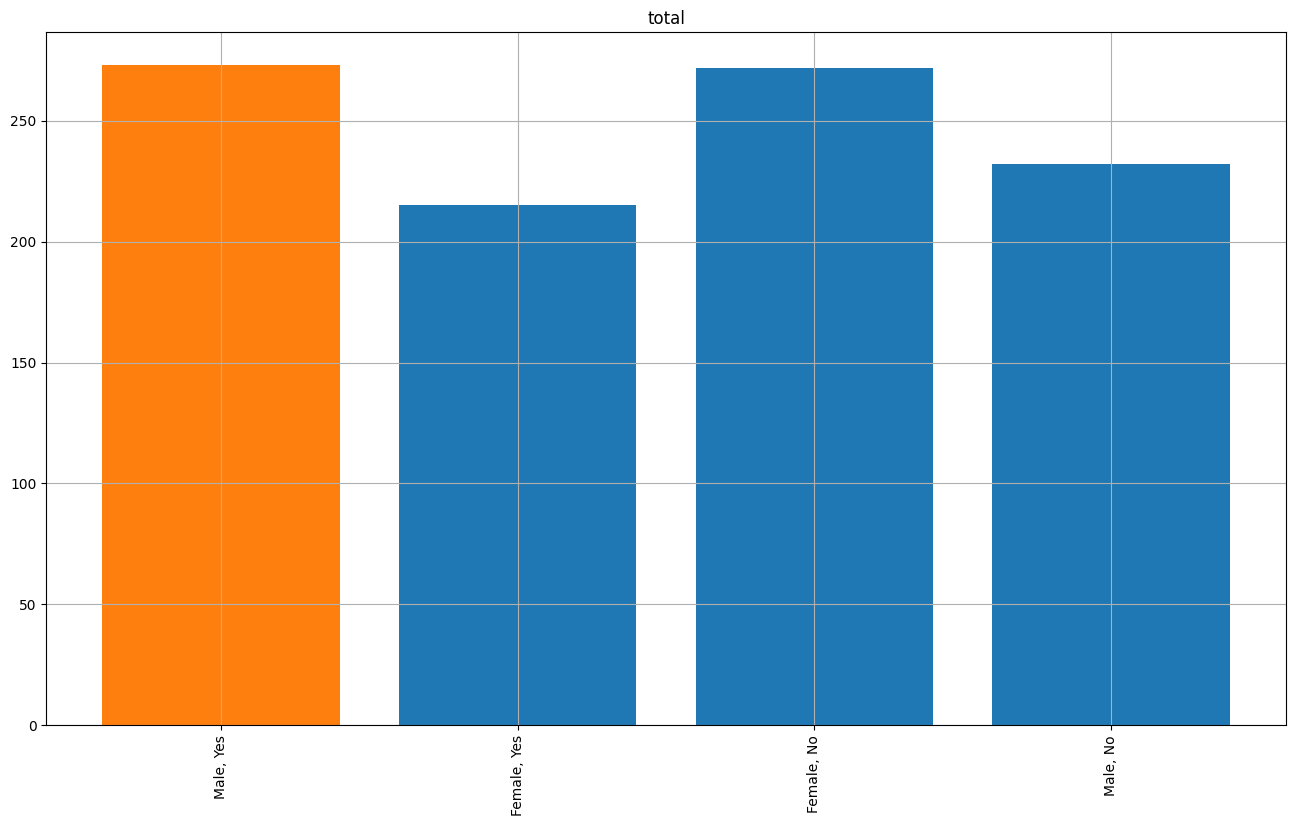

# ROC

> The following plot shows a Receiver Operating Characteristic (ROC) for each intersection. This plot could be used for selecting different threshold of the classifier to make it more fair in some sense this is described in, e.g., HARDT, Moritz, PRICE, Eric and SREBRO, Nathan, 2016. Equality of Opportunity in Supervised Learning. arXiv:1610.02413.

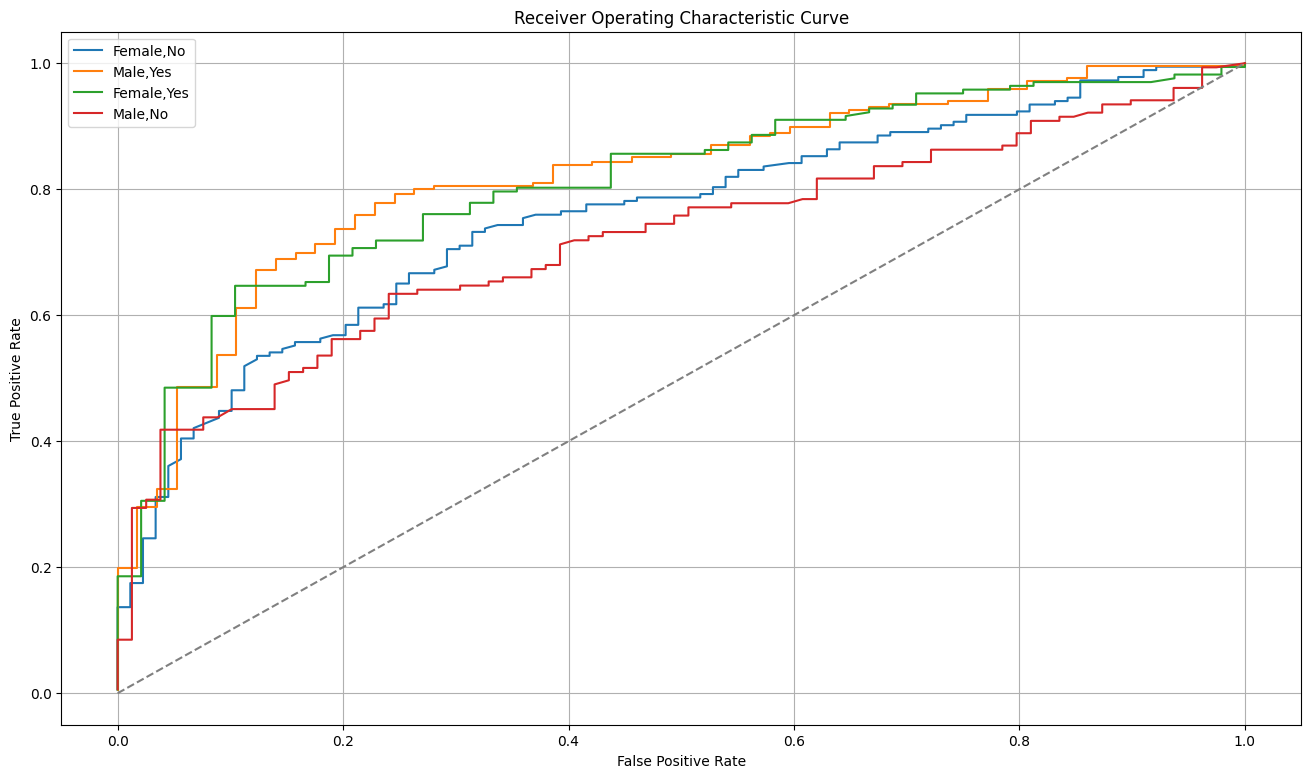

# Precision-Recall Curve

> The following plot shows a Precision-Recall Curve for each intersection.

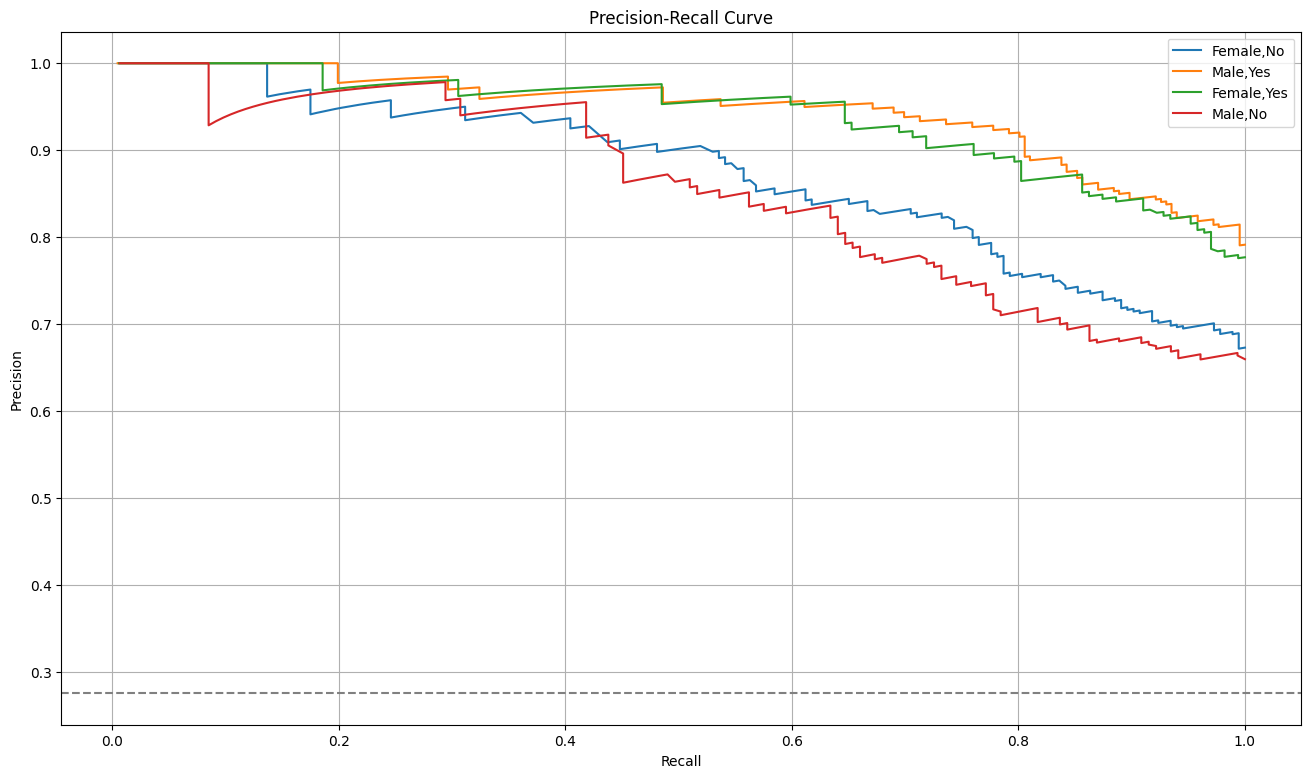

# Permutation Variable Importance

> Permutation variable importance is obtained by measuring the distance between prediction errors before and after a feature is permuted; only one feature at a time is permuted.

Variable Importances
Variable        Relative Importance    Scaled Importance    Percentage
--------------  ---------------------  -------------------  ------------
Contract        0.235036               1                    0.860421
MonthlyCharges  0.0381278              0.162221             0.139579

# Partial Dependence Plots for Individual Protected Groups

> The following plots show partial dependence for each intersection separately. This plot can be used to see how the membership to a particular intersection influences the dependence on a given feature.

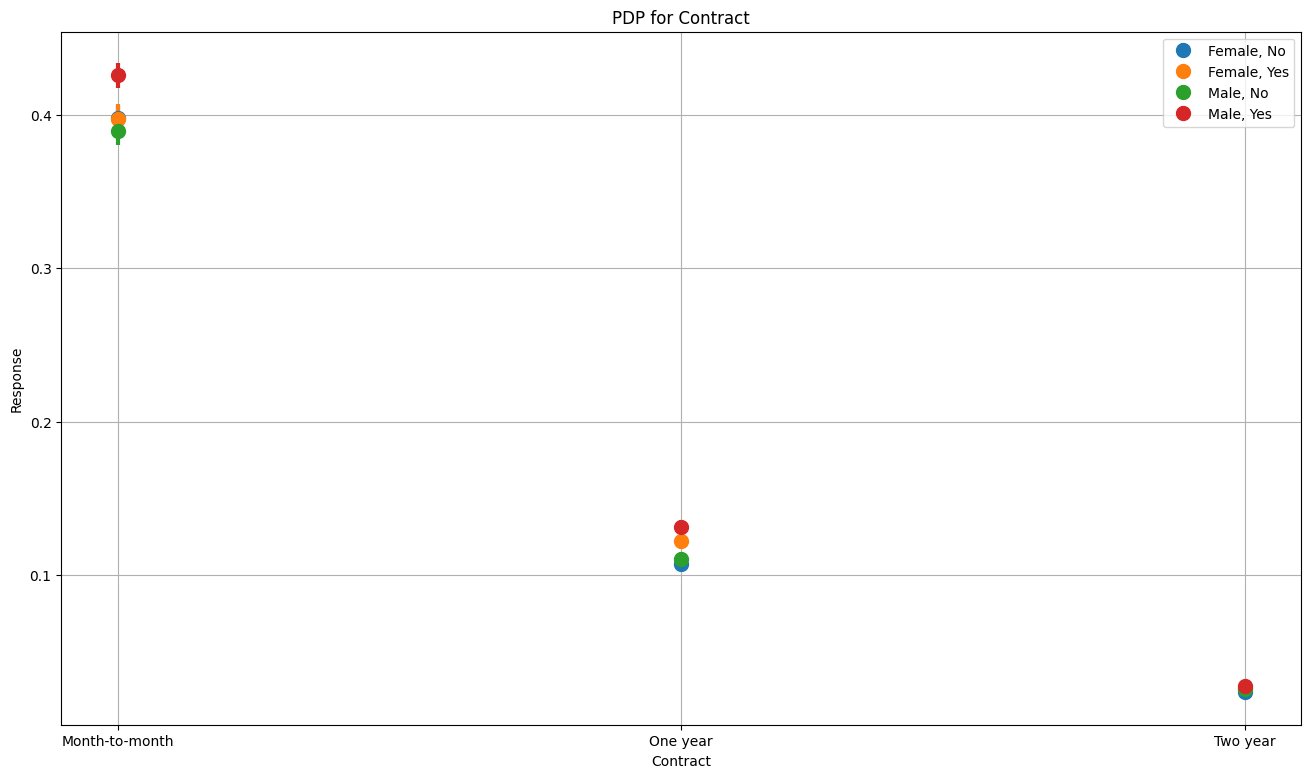

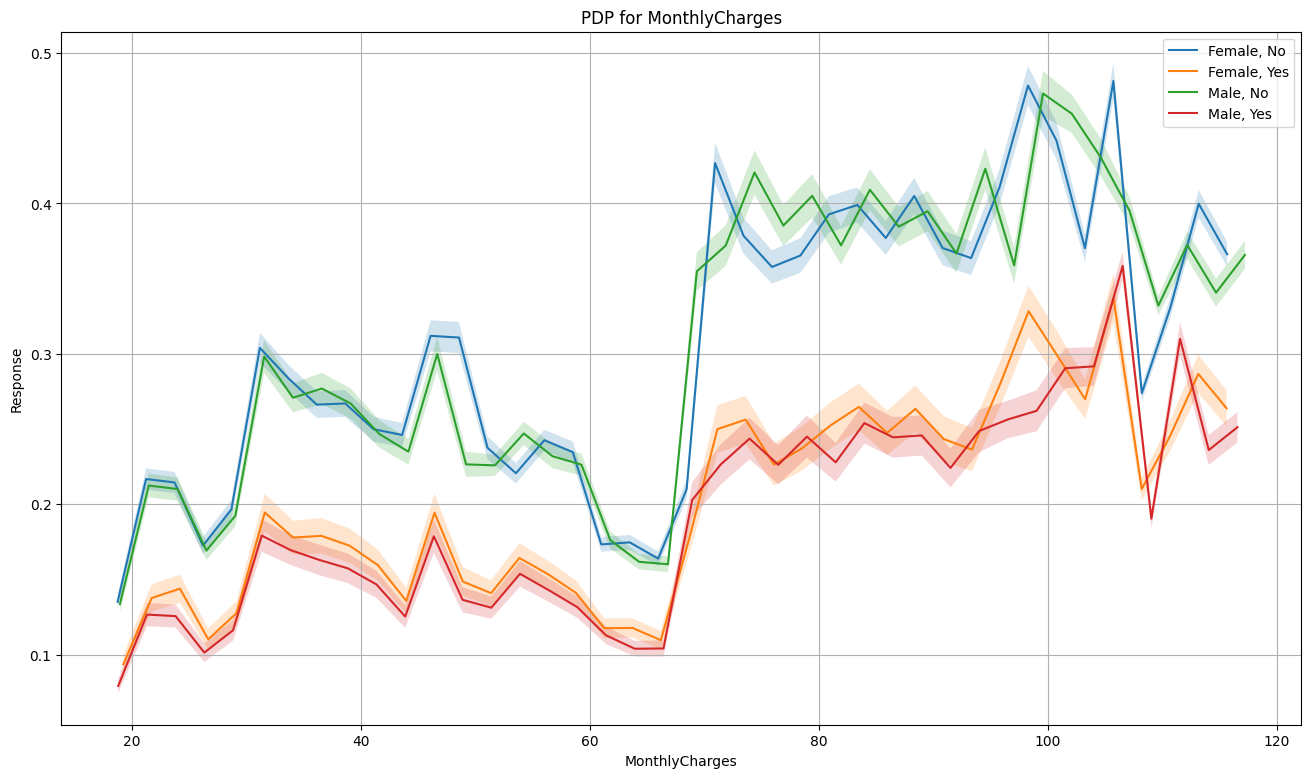

# Overview for model StackedEnsemble_AllModels_1_AutoML_92_20230330_93644

> The following table shows fairness metrics for intersections determined using the protected_columns. Apart from the fairness metrics, there is a p-value from Fisher's exact test or G-test (depends on the size of the intersections) for hypothesis that being selected (positive response) is independent to being in the reference group or a particular protected group.

After the table there are two kinds of plot. The first kind starts with AIR prefix which stands for Adverse Impact Ratio. These plots show values relative to the reference group and also show two dashed lines corresponding to 0.8 and 1.25 (the four-fifths rule). 
 The second kind is showing the absolute value of given metrics. The reference group is shown by using a different colored bar.

gender    Partner      AIR_auc    AIR_aucpr    AIR_f1    AIR_selectedRatio       auc     aucpr        f1     p.value    selectedRatio    total
--------  ---------  ---------  -----------  --------  -------------------  --------  --------  --------  ----------  ---------------  -------
Female    No          0.922401     0.923971  0.873975             0.806144  0.756831  0.873066  0.748503  0.00146739         0.555147      272
Male      No          0.87634      0.902089  0.843971             0.826211  0.719037  0.852389  0.722807  0.00712321         0.568966      232
Female    Yes         0.988273     0.992695  0.974844             1.04013   0.810878  0.938003  0.834891  0.55063            0.716279      215
Male      Yes         1            1         1                    1         0.8205    0.944906  0.856436  1                  0.688645      273
[4 rows x 12 columns]

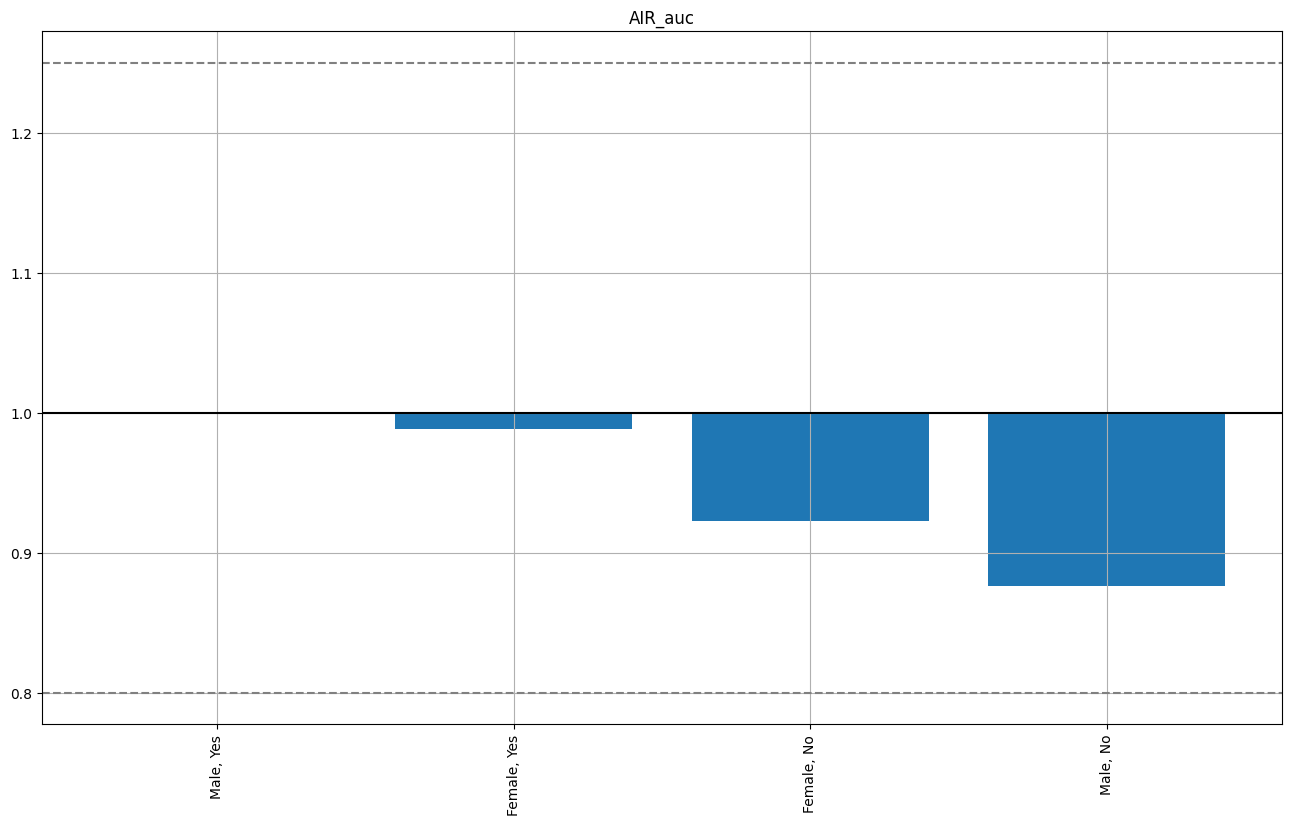

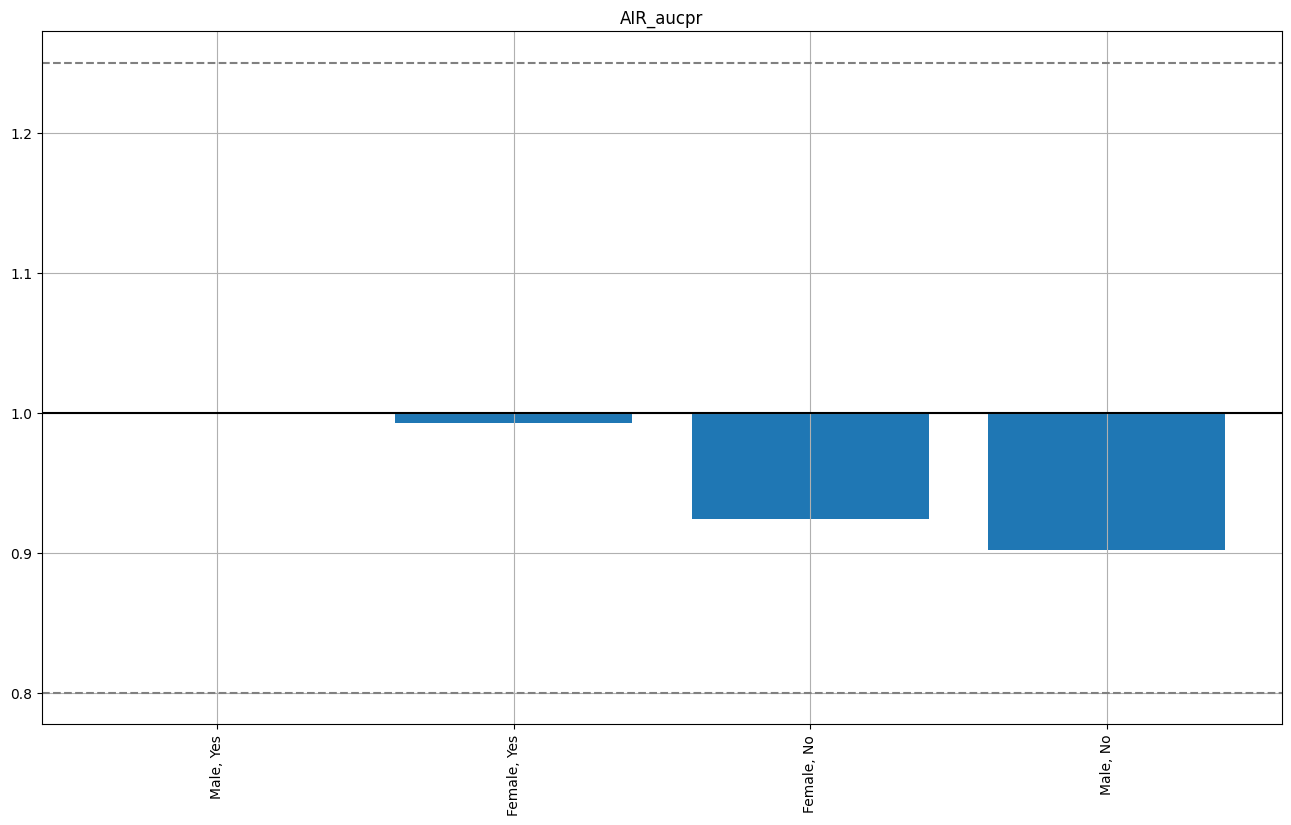

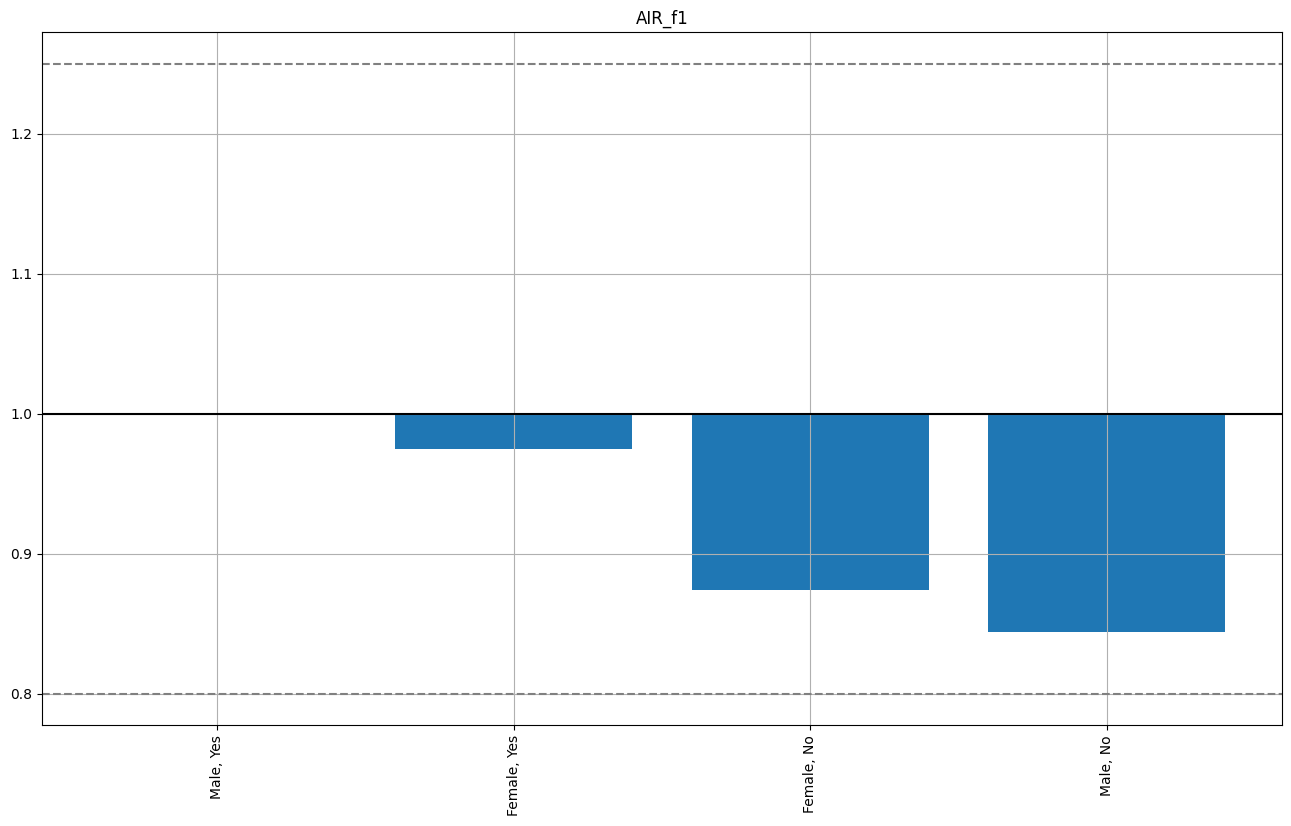

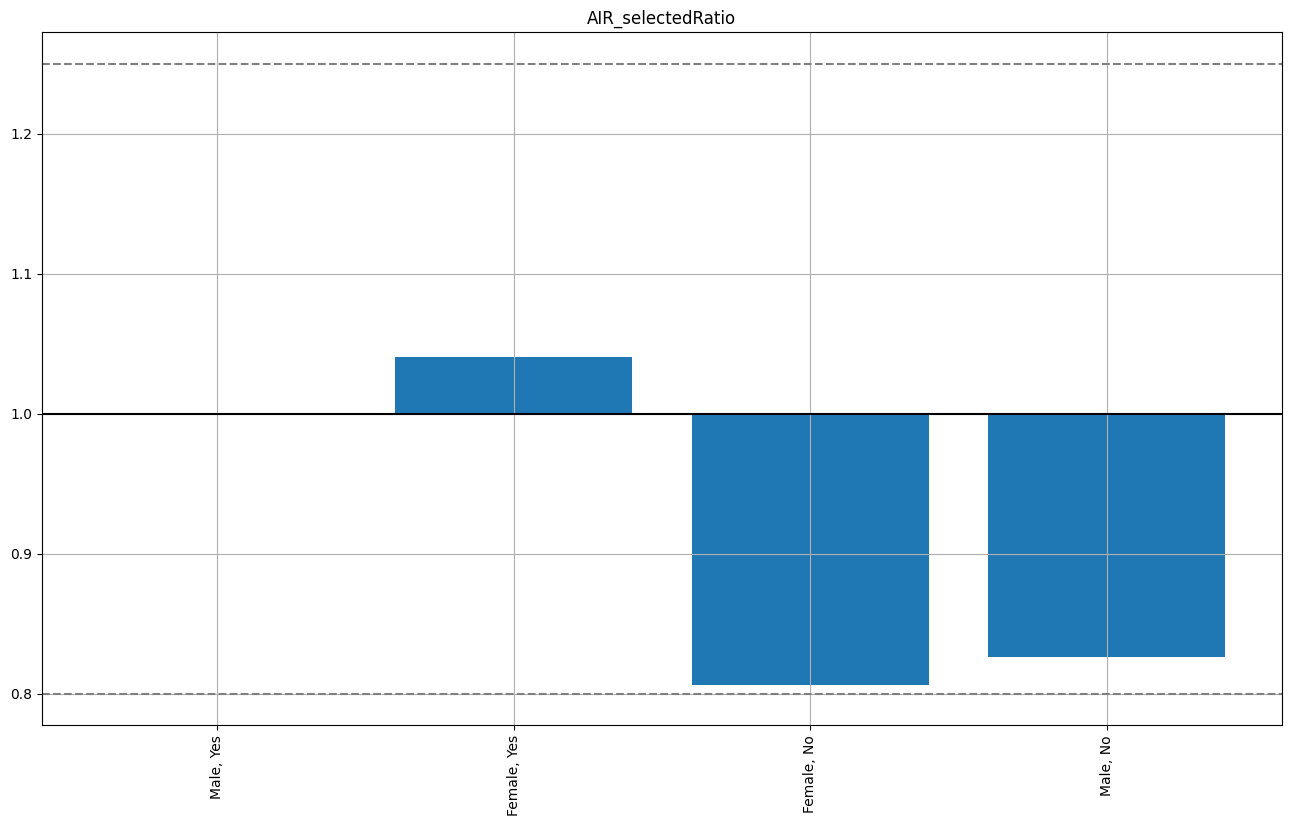

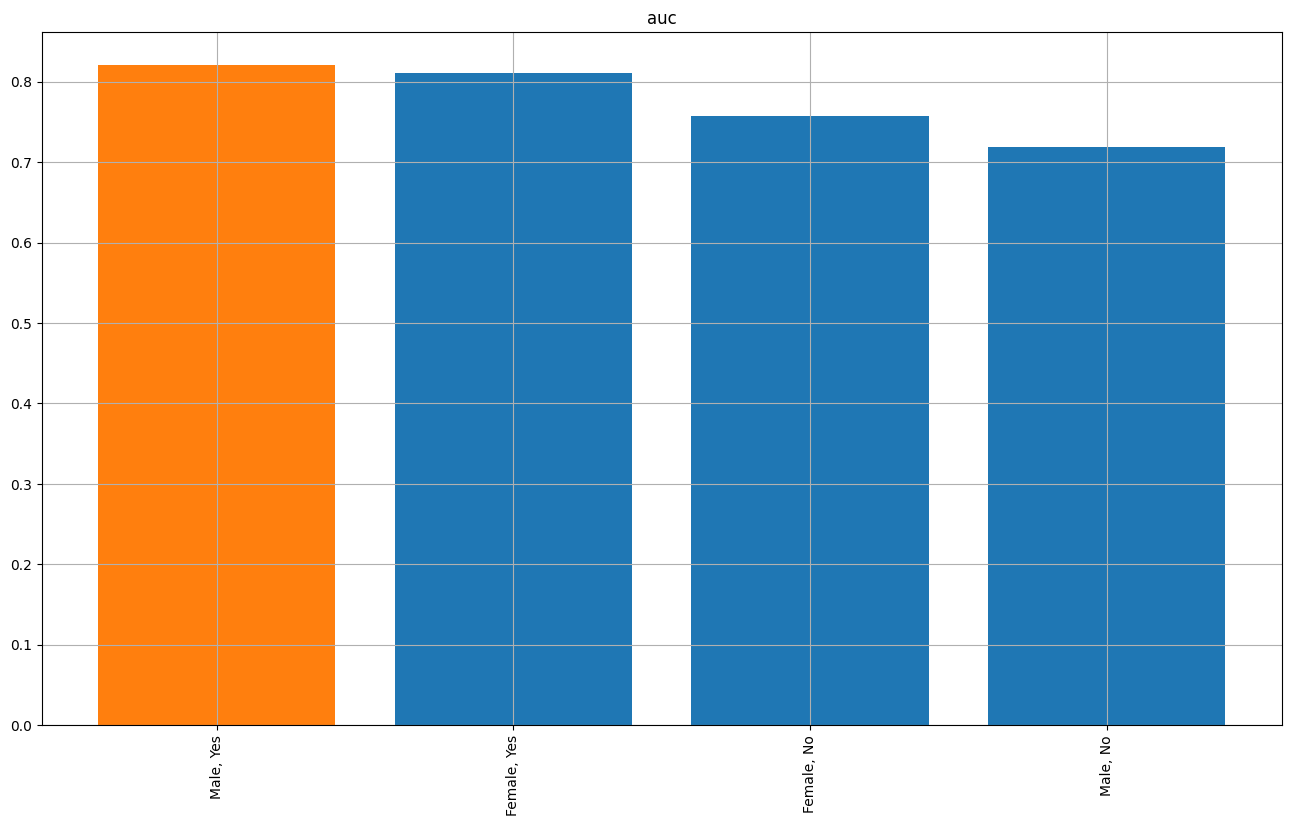

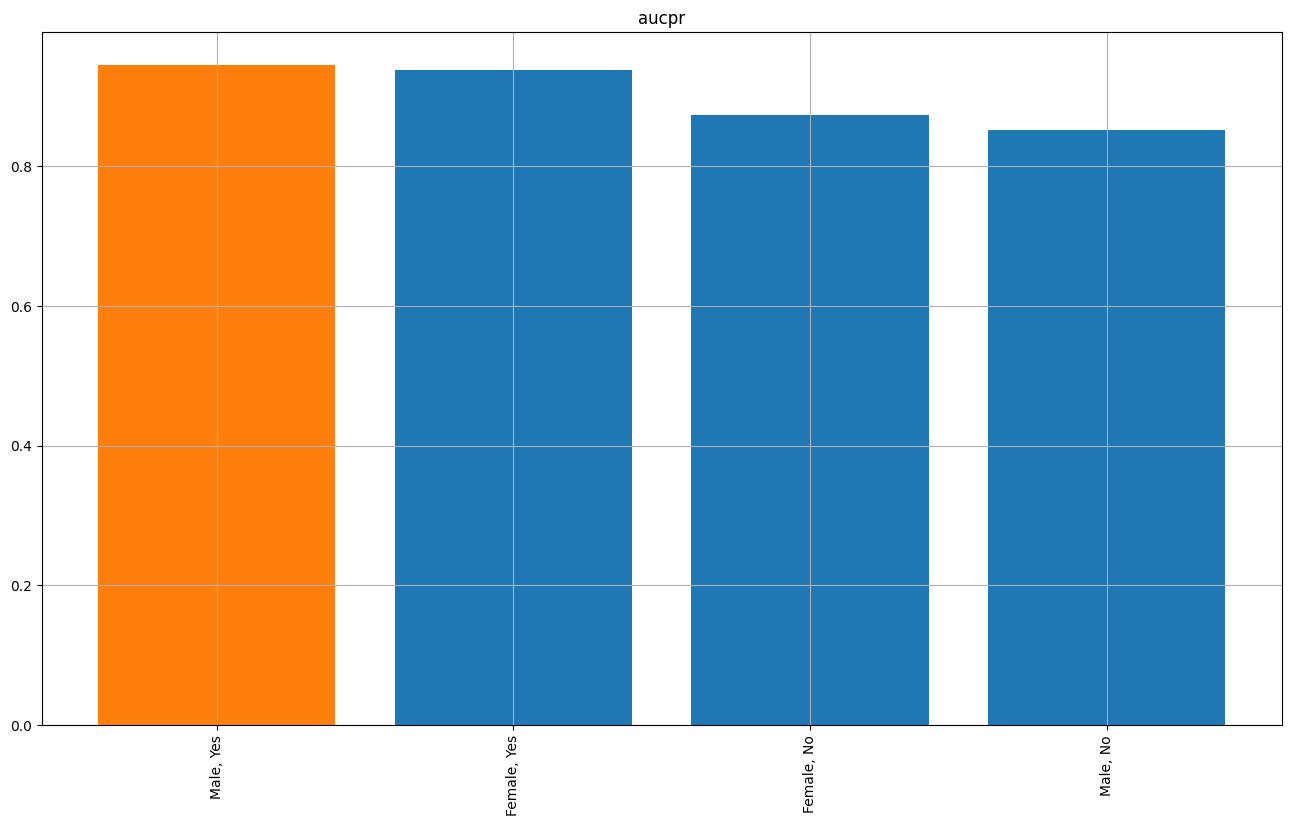

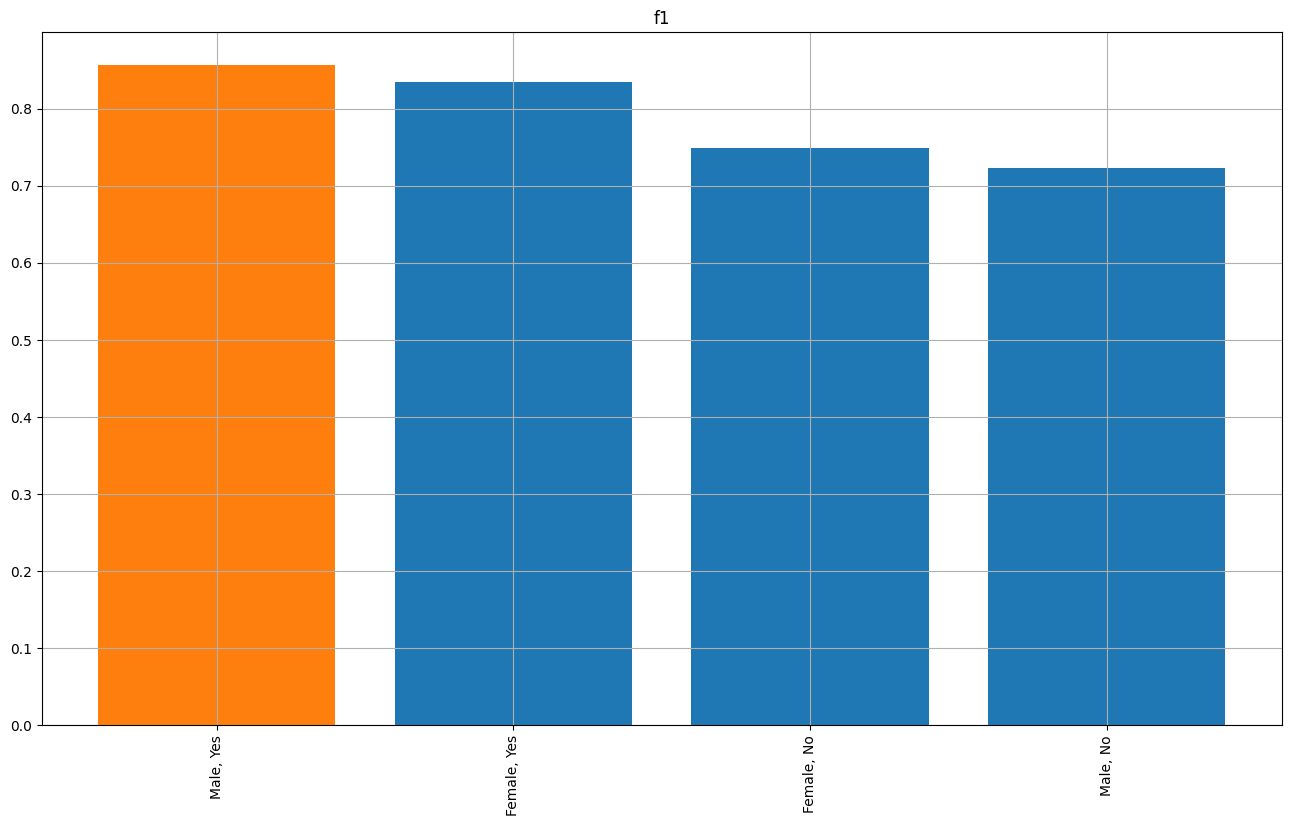

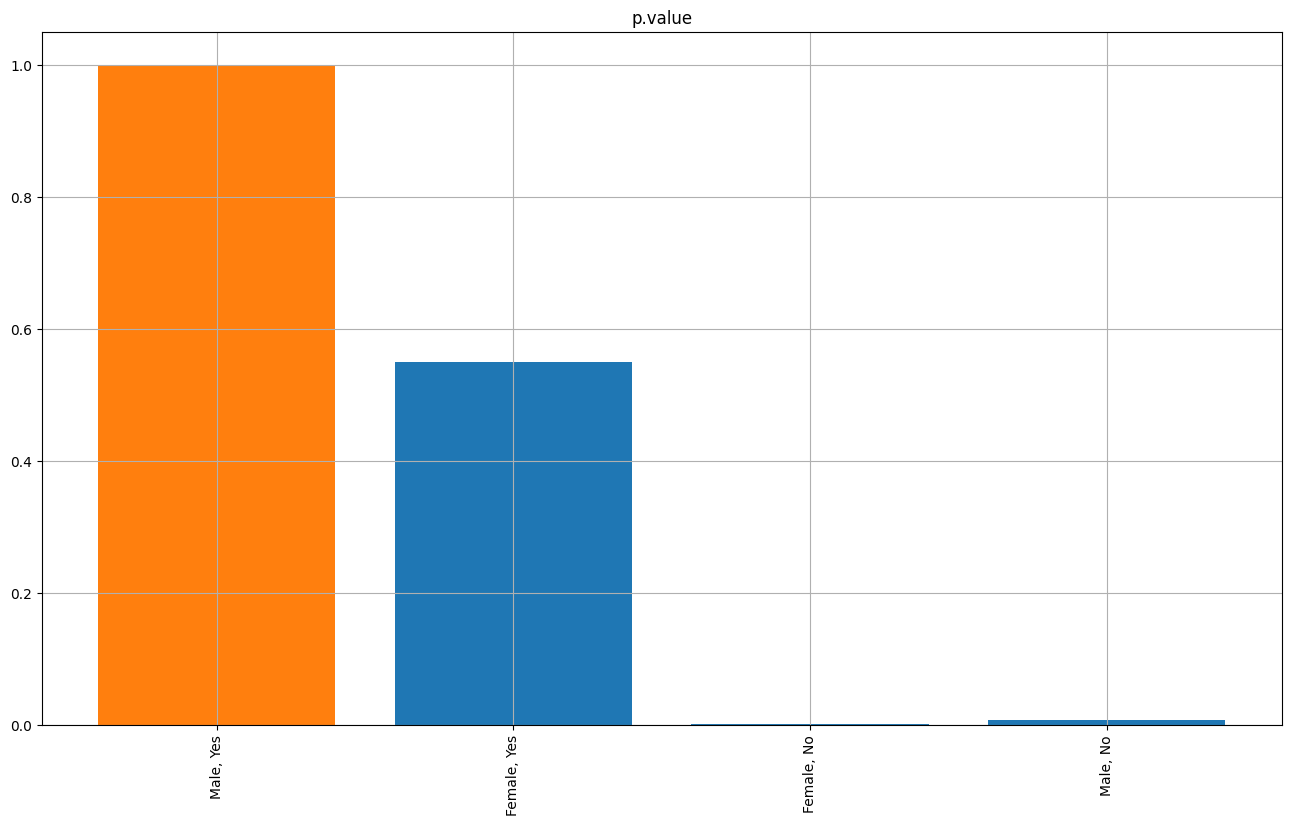

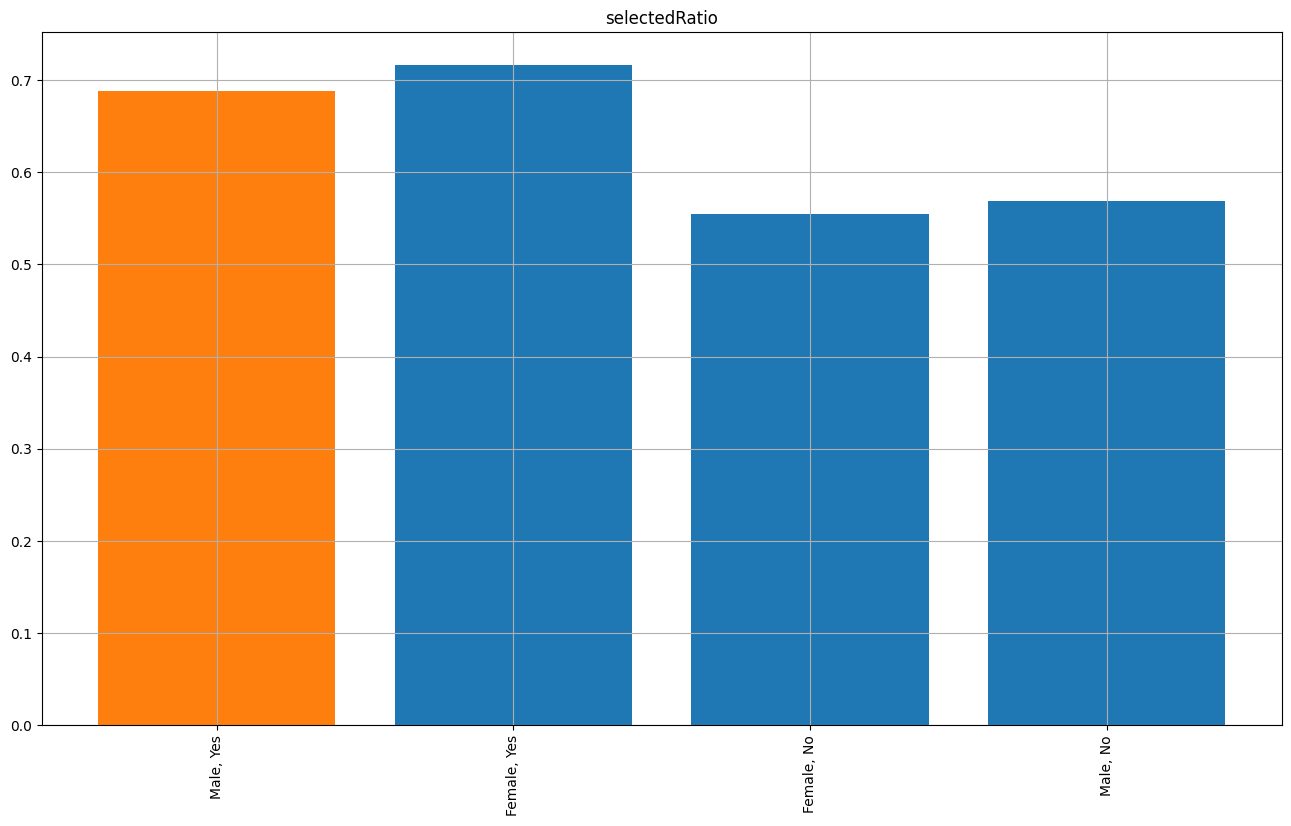

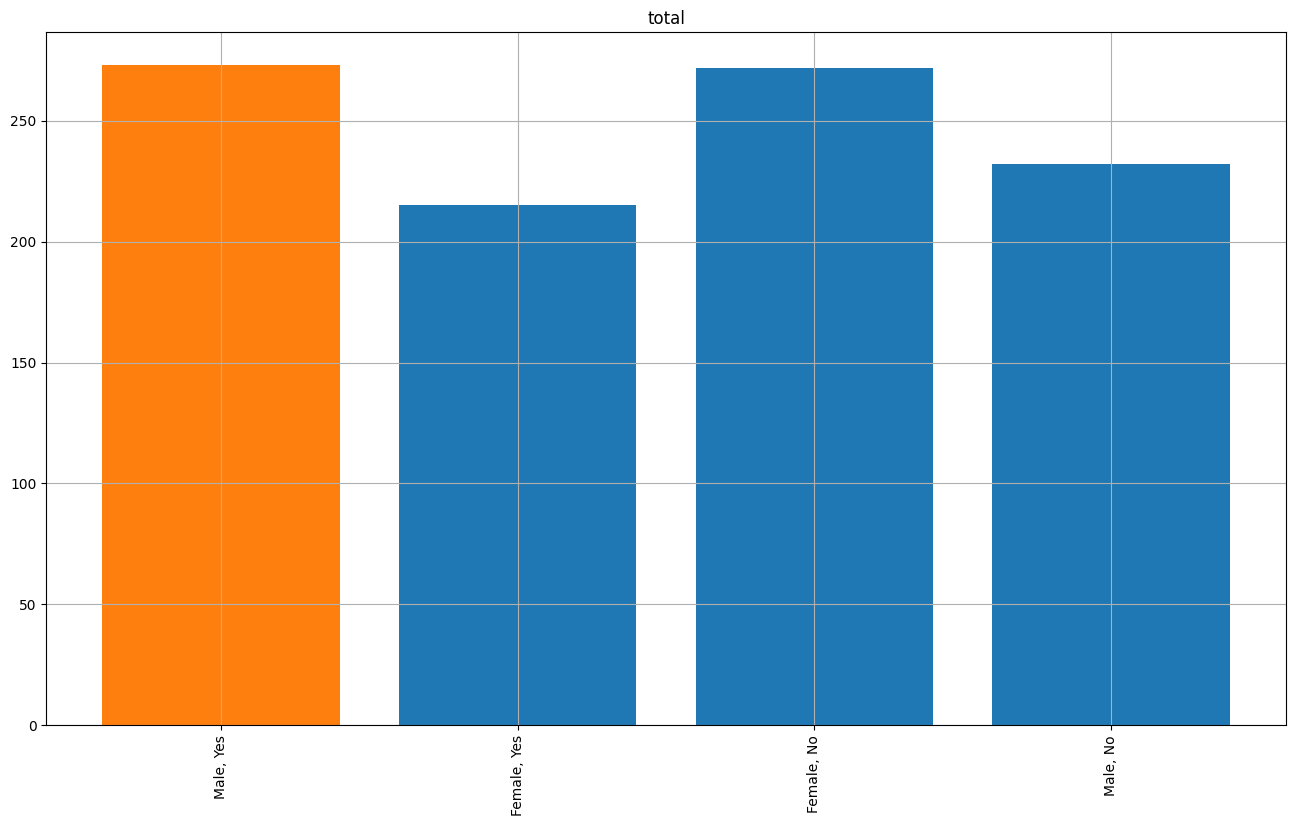

# ROC

> The following plot shows a Receiver Operating Characteristic (ROC) for each intersection. This plot could be used for selecting different threshold of the classifier to make it more fair in some sense this is described in, e.g., HARDT, Moritz, PRICE, Eric and SREBRO, Nathan, 2016. Equality of Opportunity in Supervised Learning. arXiv:1610.02413.

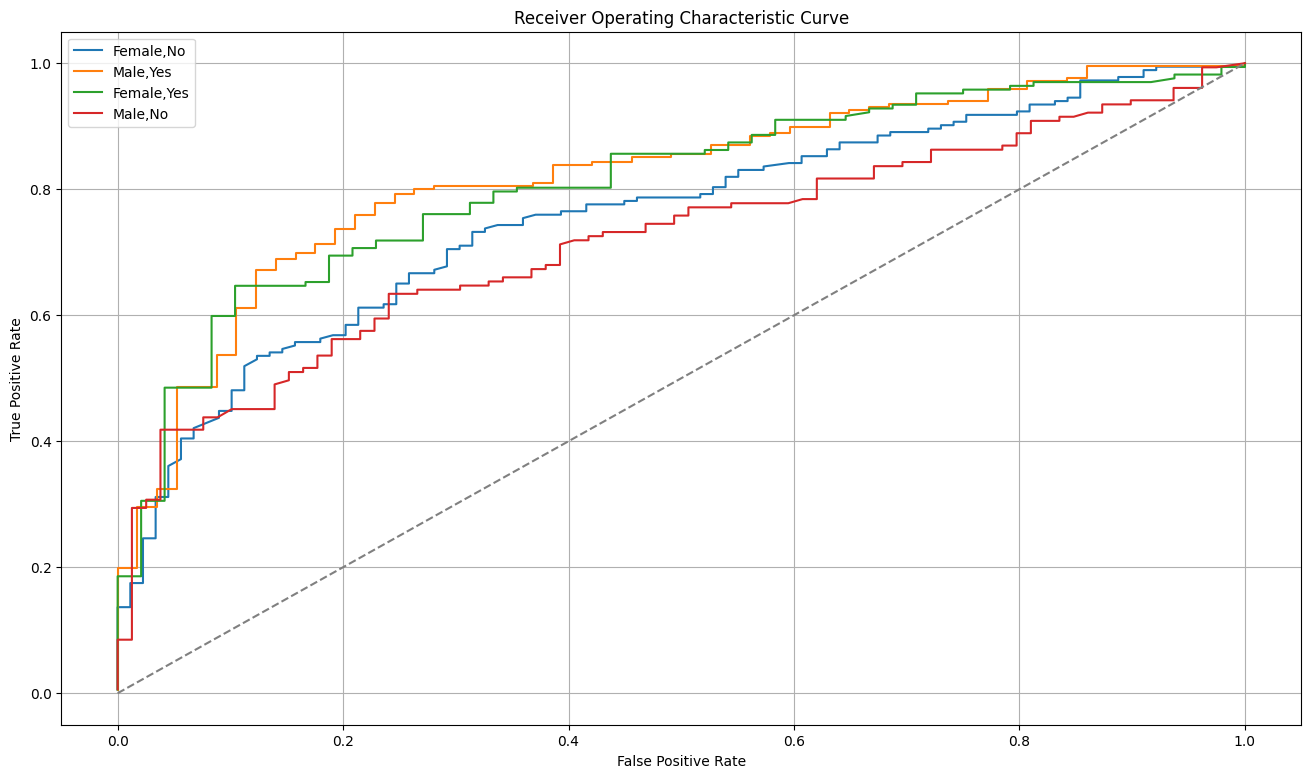

# Precision-Recall Curve

> The following plot shows a Precision-Recall Curve for each intersection.

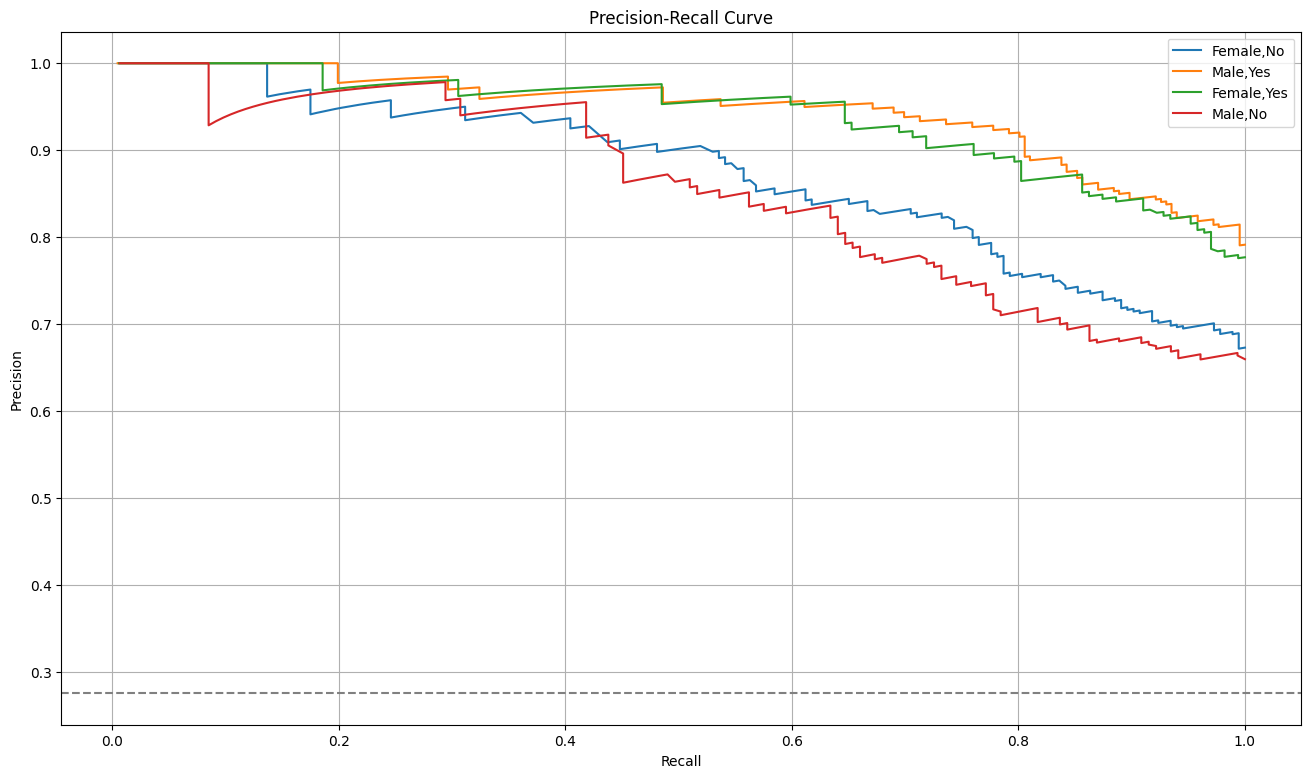

# Permutation Variable Importance

> Permutation variable importance is obtained by measuring the distance between prediction errors before and after a feature is permuted; only one feature at a time is permuted.

Variable Importances
Variable        Relative Importance    Scaled Importance    Percentage
--------------  ---------------------  -------------------  ------------
Contract        0.235036               1                    0.860421
MonthlyCharges  0.0381278              0.162221             0.139579

# Partial Dependence Plots for Individual Protected Groups

> The following plots show partial dependence for each intersection separately. This plot can be used to see how the membership to a particular intersection influences the dependence on a given feature.

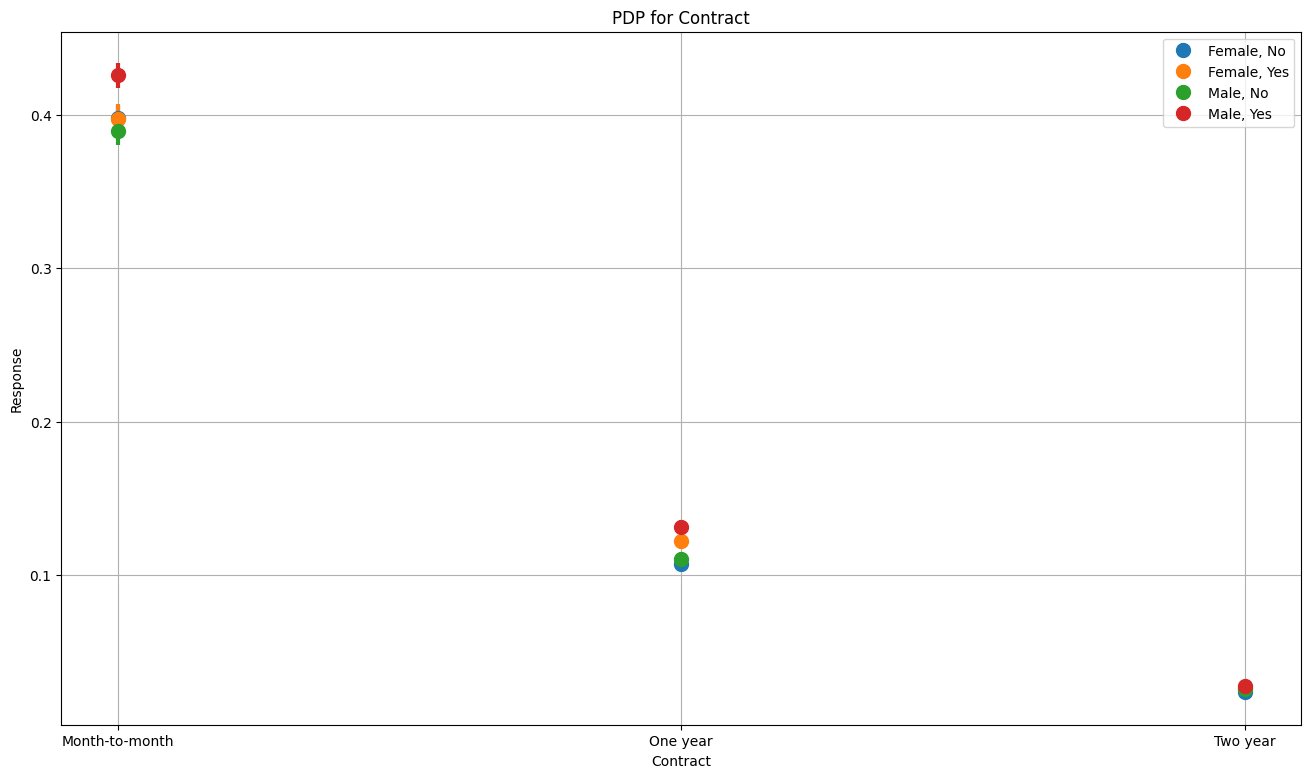

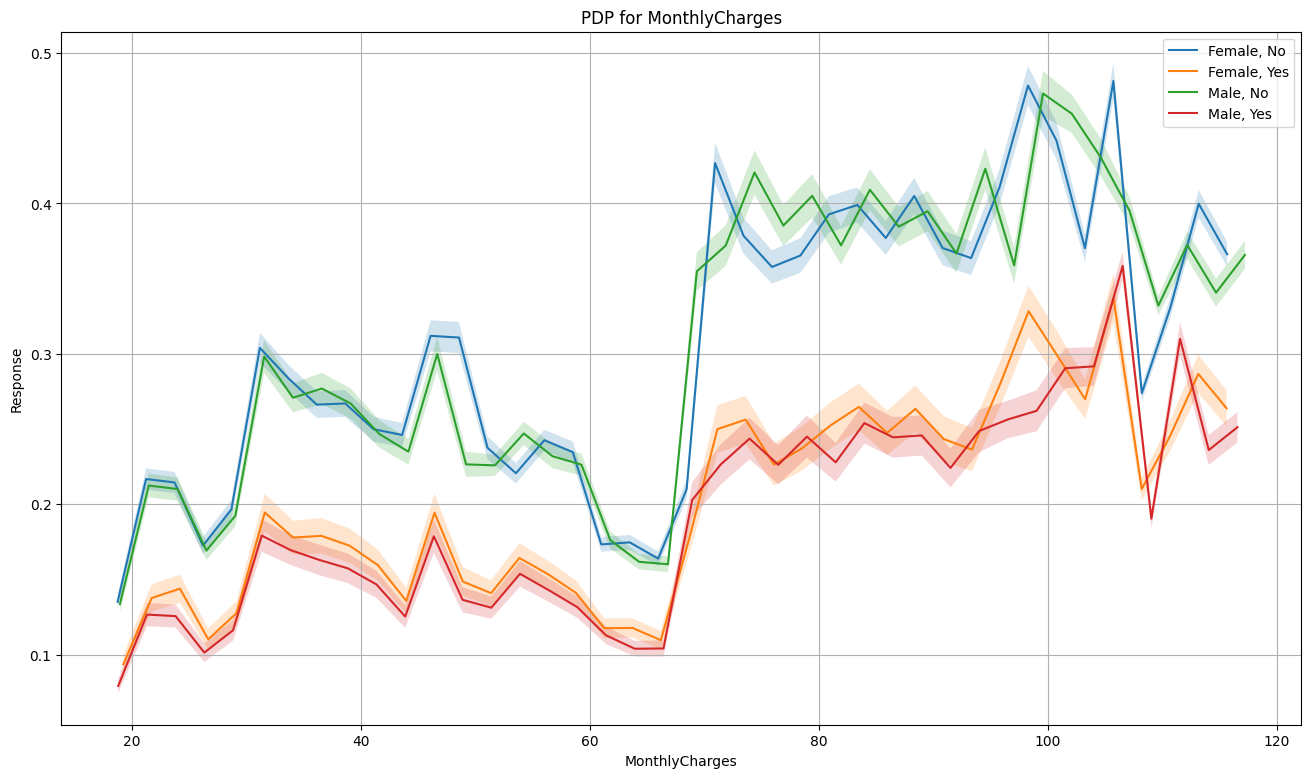

In [ ]:
#inspect the model fairness
potentially_fair_model.inspect_model_fairness(churn_test, pcols, reference, favorable_class)

In [ ]:
#Admissible AutoML
admissible_auto_model = H2OAutoML(max_models = 10, seed = 10, exclude_algos= ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds = 0)
admissible_auto_model.train(x=acols, y=y, training_frame=churn_train, validation_frame=churn_valid)

AutoML progress: |
08:43:42.660: Project: AutoML_3_20230330_84342
08:43:42.660: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:43:42.660: Setting stopping tolerance adaptively based on the training frame: 0.014166238734668348
08:43:42.660: Build control seed: 10
08:43:42.660: training frame: Frame key: AutoML_3_20230330_84342_training_py_2_sid_b01e    cols: 21    rows: 4983  chunks: 8    size: 268026  checksum: 7618811302832231675
08:43:42.660: validation frame: Frame key: py_4_sid_b01e    cols: 21    rows: 1068  chunks: 8    size: 139345  checksum: 7690955687600769119
08:43:42.660: leaderboard frame: Frame key: py_4_sid_b01e    cols: 21    rows: 1068  chunks: 8    size: 139345  checksum: 7690955687600769119
08:43:42.660: blending frame: NULL
08:43:42.660: response column: Churn
08:43:42.660: fold column: null
08:43:42.660: weights column: null
08:43:42.661: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20230330_84342


GLM Model: summary
    family    link    regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.01204 )  nlambda = 30, lambda.max = 15.284, lambda.min = 0.01204, lambda.1se = -1.0  15                            15                             32                      AutoML_3_20230330_84342_training_py_2_sid_b01e

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13744958850960268
RMSE: 0.37074194328346866
LogLoss: 0.4214207428622105
AUC: 0.8425297198024471
AUCPR: 0.6577601433930885
Gini: 0.6850594396048941
Null degrees of freedom: 4982
Residual degrees of freedom: 4967
Null deviance: 5761.5508400226245
Residual deviance: 4199.87912336479
AIC: 4231.87912336479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3403545377530014
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2927  736    0.2009   (736.0/3663.0)
Yes    367   953    0.278    (367.0/1320.0)
Total  3294  1689   0.2214   (1103.0/4983.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.340355     0.633433  190
max f2                       0.183315     0.748598  273
max f0point5                 0.461068     0.618485  133
max accuracy                 0.461068     0.798314  133
max precision                0.760703     1         0
max recall                   0.0156923    1         394
max specificity              0.760703     1         0
max absolute_mcc             0.340355     0.485737  190
max min_per_class_accuracy   0.303648     0.760606  210
max mean_per_class_accuracy  0.301982     0.761183  211
max tns                      0.760703     3663      0
max fns                      0.760703     1318      0
max fps                      0.0111409    3663      399
max tps                      0.0156923    1320      394
max tnr                      0.760703     1         0
max fnr                      0.760703     0.998485  0
max fpr                      0.0111409    1         399
max tpr                      0.0156923    1         394

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.49 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100341                   0.723361           3.3975     3.3975             0.9              0.738504   0.9                         0.738504            0.0340909       0.0340909                  239.75    239.75             0.0327259
2        0.0200682                   0.709222           3.322      3.35975            0.88             0.716407   0.89                        0.727456            0.0333333       0.0674242                  232.2     235.975            0.0644212
3        0.0301023                   0.698854           3.171      3.29683            0.84             0.703123   0.873333                    0.719345            0.0318182       0.0992424                  217.1     

In [ ]:
#Unprotected AutoML
u_auto_model = H2OAutoML(max_models = 10, seed = 10, exclude_algos= ["StackedEnsemble", "DeepLearning"], nfolds = 0)
u_auto_model.train(x=ucols, y=y, training_frame=churn_train, validation_frame = churn_valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_4_20230330_84353


GLM Model: summary
    family    link    regularization             lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.0194 )  nlambda = 30, lambda.max = 15.284, lambda.min = 0.0194, lambda.1se = -1.0  40                            40                             30                      AutoML_4_20230330_84353_training_py_2_sid_b01e

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13430433696642533
RMSE: 0.3664755612130573
LogLoss: 0.41420682607511905
AUC: 0.8486020111020112
AUCPR: 0.6705095550500205
Gini: 0.6972040222040223
Null degrees of freedom: 4982
Residual degrees of freedom: 4942
Null deviance: 5761.5508400226245
Residual deviance: 4127.985228664636
AIC: 4209.985228664636

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32475013737001746
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2898  765    0.2088   (765.0/3663.0)
Yes    344   976    0.2606   (344.0/1320.0)
Total  3242  1741   0.2226   (1109.0/4983.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.32475      0.6377    203
max f2                       0.12887      0.74991   309
max f0point5                 0.519731     0.639694  118
max accuracy                 0.519731     0.807345  118
max precision                0.817563     1         0
max recall                   0.018363     1         393
max specificity              0.817563     1         0
max absolute_mcc             0.32475      0.491049  203
max min_per_class_accuracy   0.296916     0.764401  218
max mean_per_class_accuracy  0.254754     0.766923  238
max tns                      0.817563     3663      0
max fns                      0.817563     1319      0
max fps                      0.0106439    3663      399
max tps                      0.018363     1320      393
max tnr                      0.817563     1         0
max fnr                      0.817563     0.999242  0
max fpr                      0.0106439    1         399
max tpr                      0.018363     1         393

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.49 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100341                   0.767431           3.5485     3.5485             0.94             0.787411   0.94                        0.787411            0.0356061       0.0356061                  254.85    254.85             0.0347871
2        0.0200682                   0.742237           3.3975     3.473              0.9              0.751096   0.92                        0.769253            0.0340909       0.069697                   239.75    247.3              0.067513
3        0.0301023                   0.726829           3.171      3.37233            0.84             0.734482   0.893333                    0.757663            0.0318182       0.101515                   217.1     237.

In [ ]:
admissible_auto_model.leader.model_performance(churn_test).auc()

0.8259996841359845

In [ ]:
u_auto_model.leader.model_performance(churn_test).auc()

0.8320112895912618

In [ ]:
acols

['Contract',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService',
 'OnlineSecurity',
 'TechSupport']

# Customer Segmentation Analysis using K-Means Clustering

In [ ]:
new_churn_df = h2o.deep_copy(churn_df, 'new_churn_df') #Create a new copy for churn_df

In [ ]:
new_churn_df.drop('Churn')

customerID    gender      SeniorCitizen  Partner    Dependents      tenure  PhoneService    MultipleLines     InternetService    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport    StreamingTV    StreamingMovies    Contract        PaperlessBilling    PaymentMethod                MonthlyCharges    TotalCharges
------------  --------  ---------------  ---------  ------------  --------  --------------  ----------------  -----------------  ----------------  --------------  ------------------  -------------  -------------  -----------------  --------------  ------------------  -------------------------  ----------------  --------------
7590-VHVEG    Female                  0  Yes        No                   1  No              No phone service  DSL                No                Yes             No                  No             No             No                 Month-to-month  Yes                 Electronic check                      29.85           29.85
5575-GNVDE    Male                    0  No         No                  34  Yes             No                DSL                Yes               No              Yes                 No             No             No                 One year        No                  Mailed check                          56.95         1889.5
3668-QPYBK    Male                    0  No         No                   2  Yes             No                DSL                Yes               Yes             No                  No             No             No                 Month-to-month  Yes                 Mailed check                          53.85          108.15
7795-CFOCW    Male                    0  No         No                  45  No              No phone service  DSL                Yes               No              Yes                 Yes            No             No                 One year        No                  Bank transfer (automatic)             42.3          1840.75
9237-HQITU    Female                  0  No         No                   2  Yes             No                Fiber optic        No                No              No                  No             No             No                 Month-to-month  Yes                 Electronic check                      70.7           151.65
9305-CDSKC    Female                  0  No         No                   8  Yes             Yes               Fiber optic        No                No              Yes                 No             Yes            Yes                Month-to-month  Yes                 Electronic check                      99.65          820.5
1452-KIOVK    Male                    0  No         Yes                 22  Yes             Yes               Fiber optic        No                Yes             No                  No             Yes            No                 Month-to-month  Yes                 Credit card (automatic)               89.1          1949.4
6713-OKOMC    Female                  0  No         No                  10  No              No phone service  DSL                Yes               No              No                  No             No             No                 Month-to-month  No                  Mailed check                          29.75          301.9
7892-POOKP    Female                  0  Yes        No                  28  Yes             Yes               Fiber optic        No                No              Yes                 Yes            Yes            Yes                Month-to-month  Yes                 Electronic check                     104.8          3046.05
6388-TABGU    Male                    0  No         Yes                 62  Yes             No                DSL                Yes               Yes             No                  No             No             No                 One year        No                  Bank transfer (automatic)             56.15         3487.95
[7043 rows x 20 columns]

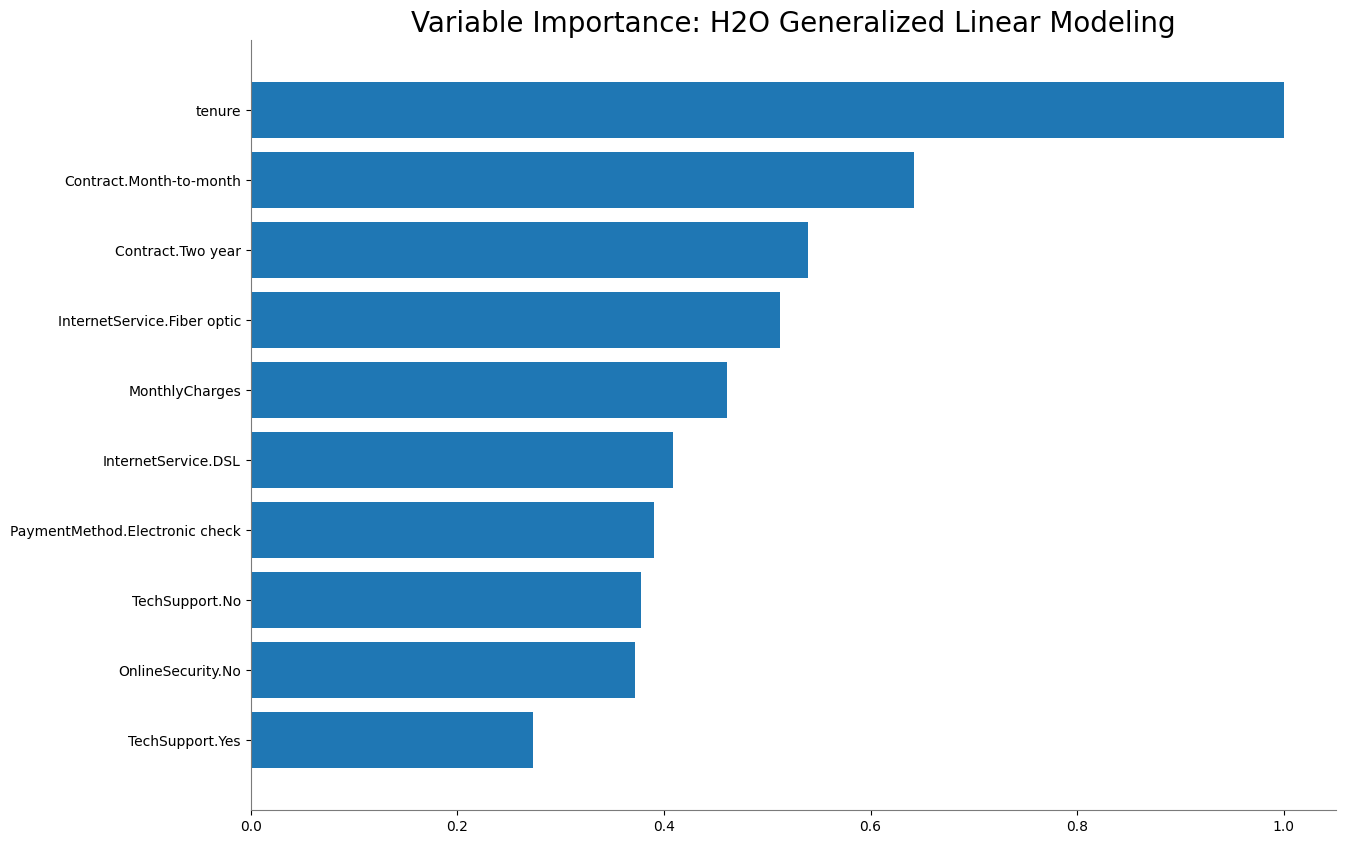

<Figure size 640x480 with 0 Axes>

In [ ]:
# Showcasing variable importance from model.explain() to know the top features for segmentation
va_plot = auto_model.leader.varimp_plot()

In [ ]:
new_churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
predictors = ["tenure", "MonthlyCharges", "TotalCharges"]
seg_split = new_churn_df.split_frame(ratios=[.8], seed = 1234)

In [ ]:
seg_train = seg_split[0]
seg_valid = seg_split[1]

In [ ]:
customer_kmeans = H2OKMeansEstimator(k=10, estimate_k=True, standardize = False, seed=1234) 

In [ ]:
#training the model
customer_kmeans.train(x=predictors, training_frame=seg_train, validation_frame=seg_valid)

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OKMeansEstimator : K-means
Model Key: KMeans_model_python_1680165483121_4632


Model Summary: 
    number_of_rows    number_of_clusters    number_of_categorical_columns    number_of_iterations    within_cluster_sum_of_squares    total_sum_of_squares    between_cluster_sum_of_squares
--  ----------------  --------------------  -------------------------------  ----------------------  -------------------------------  ----------------------  --------------------------------
    5663              5                     0                                40                      1.13622e+09                      2.93422e+10             2.8206e+10

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 1120148763.65305
Total Sum of Square Error to Grand Mean: 29342236949.00457
Between Cluster Sum of Square Error: 28222088185.35152

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           2475    2.71791e+08
    2           1304    2.99827e+08
    3           797     2.28694e+08
    4           669     1.84039e+08
    5           418     1.35798e+08

ModelMetricsClustering: kmeans
** Reported on validation data. **

Total Within Cluster Sum of Square Error: 270569958.8824209
Total Sum of Square Error to Grand Mean: 6787039227.776441
Between Cluster Sum of Square Error: 6516469268.89402

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           625     7.30288e+07
    2           320     6.6695e+07
    3           197     5.61141e+07
    4           145     4.15558e+07
    5           93      3.31761e+07

Scoring History: 
     timestamp            duration    iterations    number_of_clusters    number_of_reassigned_observations    within_cluster_sum_of_squares
---  -------------------  ----------  ------------  --------------------  -----------------------------------  -------------------------------
     2023-03-30 08:44:07  0.017 sec   0.0           0.0                   nan                                  nan
     2023-03-30 08:44:07  0.078 sec   1.0           1.0                   5663.0                               246792808495.0932
     2023-03-30 08:44:07  0.091 sec   2.0           1.0                   0.0                                  29342236880.24899
     2023-03-30 08:44:07  0.117 sec   3.0           2.0                   262.0                                6868126666.6132965
     2023-03-30 08:44:07  0.124 sec   4.0           2.0                   95.0                                 6530943703.503502
     2023-03-30 08:44:07  0.132 sec   5.0           2.0                   53.0                                 6475357979.946951
     2023-03-30 08:44:07  0.139 sec   6.0           2.0                   22.0                                 6459867176.26614
     2023-03-30 08:44:07  0.146 sec   7.0           2.0                   10.0                                 6457093503.869089
     2023-03-30 08:44:07  0.154 sec   8.0           2.0                   6.0                                  6456514961.544497
     2023-03-30 08:44:07  0.161 sec   9.0           2.0                   2.0                                  6456351511.4521475
---  ---                  ---         ---           ---                   ---                                  ---
     2023-03-30 08:44:07  0.378 sec   31.0          5.0                   179.0                                1463720645.9232643
     2023-03-30 08:44:07  0.388 sec   32.0          5.0                   149.0                                1387895498.358083
     2023-03-30 08:44:07  0.396 sec   33.0          5.0                   147.0                                1339282082.6119387
     2023-03-30 08:44:07  0.404 sec   34.0          5.0                   147.0                                1298284858.564719
     2023-0

In [ ]:
#performance evaluation
perf = customer_kmeans.model_performance()
pred = customer_kmeans.predict(seg_valid) #generating predictions on a validation set

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


In [ ]:
perf

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 1120148763.65305
Total Sum of Square Error to Grand Mean: 29342236949.00457
Between Cluster Sum of Square Error: 28222088185.35152

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           2475    2.71791e+08
    2           1304    2.99827e+08
    3           797     2.28694e+08
    4           669     1.84039e+08
    5           418     1.35798e+08

In [ ]:
seg_valid.shape

(1380, 21)

In [ ]:
pred

predict
---------
        1
        2
        1
        4
        0
        1
        0
        0
        3
        0
[1380 rows x 1 column]

In [ ]:
comb1 = seg_valid[['tenure', 'MonthlyCharges']]
comb2 = seg_valid[['tenure', 'MonthlyCharges', 'TotalCharges']]
contract_df_2d = comb1.cbind(pred)
contract_df_3d = comb2.cbind(pred)
contract_df_2d.head()

tenure    MonthlyCharges    predict
--------  ----------------  ---------
      45             42.3           1
      62             56.15          2
      25            105.5           1
      71            106.7           4
      10             55.2           0
      21             90.05          1
       1             39.65          0
      12             19.8           0
      47             99.35          3
      17             64.7           0
[10 rows x 3 columns]

In [ ]:
contract_df_2d = contract_df_2d.as_data_frame()
contract_df_3d = contract_df_3d.as_data_frame()

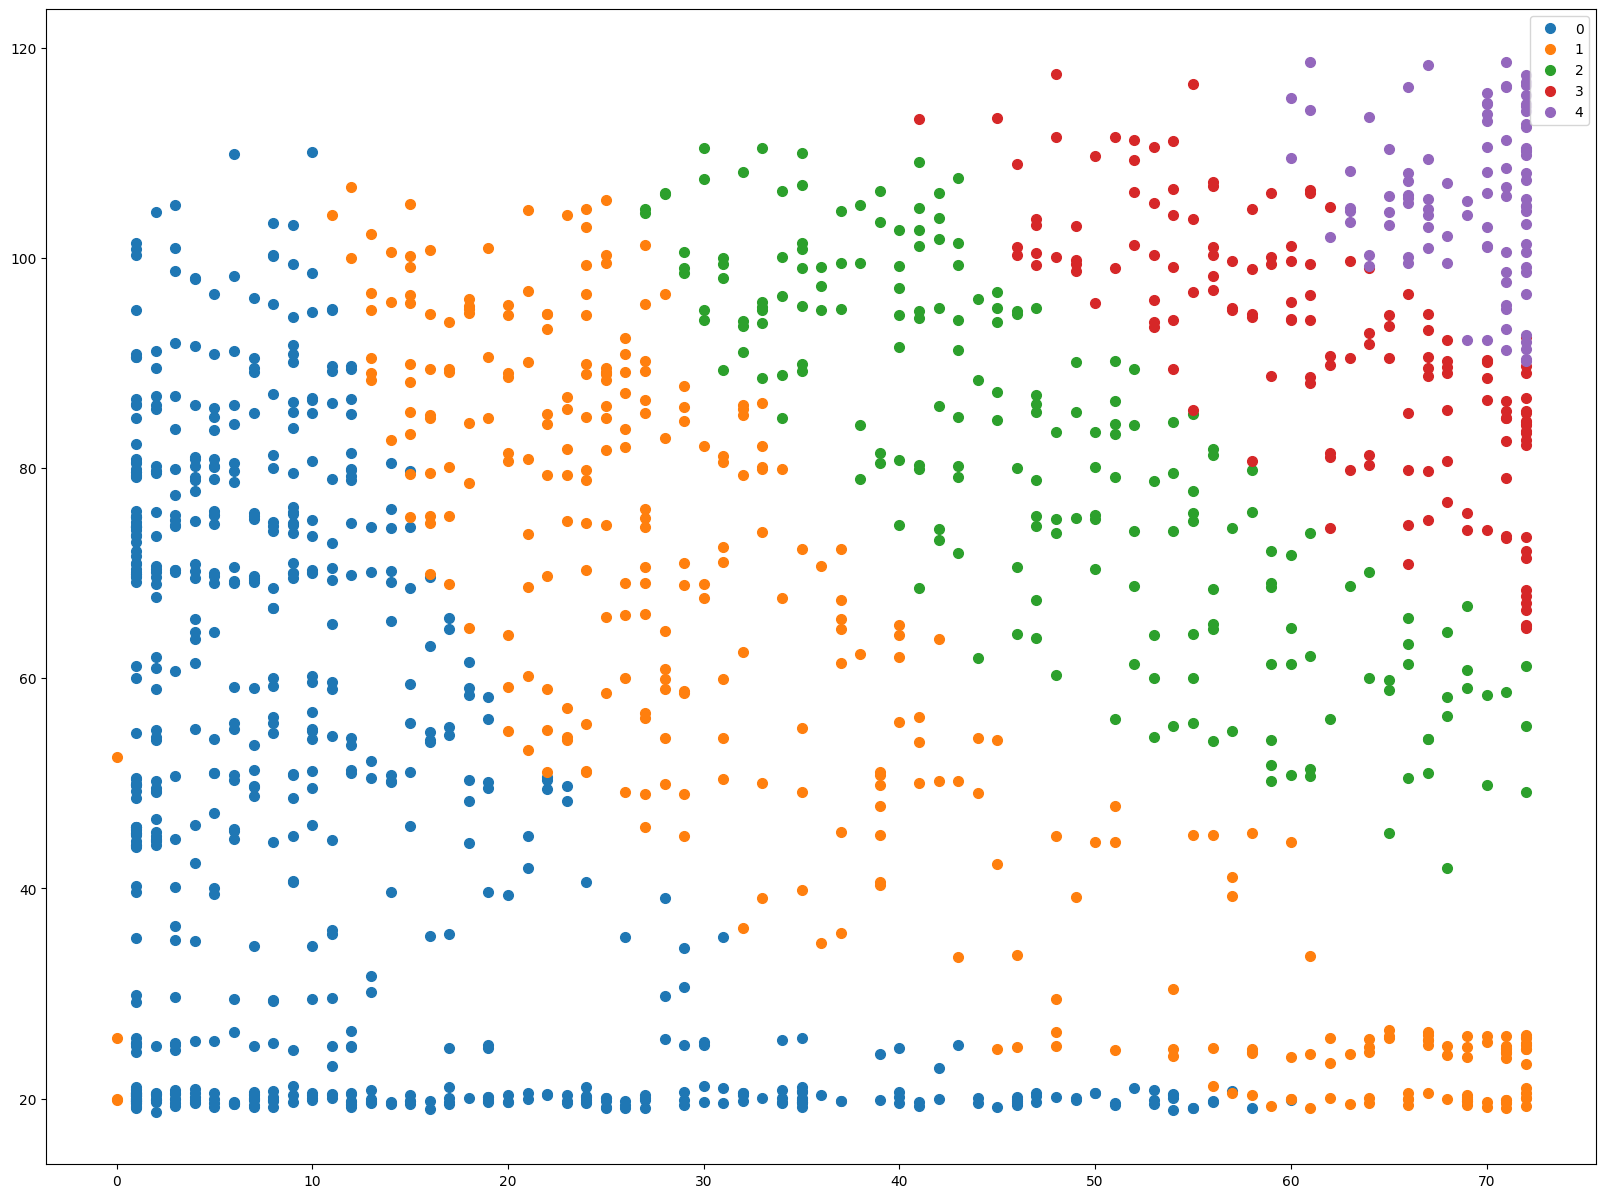

In [ ]:
groups_2d = contract_df_2d.groupby('predict')
fig, ax = plt.subplots(1,1,figsize=(20,15))

for name, group in groups_2d:
  ax.plot(group.tenure, group.MonthlyCharges, marker='o', linestyle='', ms=7, label=name)
ax.legend(numpoints=1)

In [ ]:
groups_3d = contract_df_3d.groupby('predict')

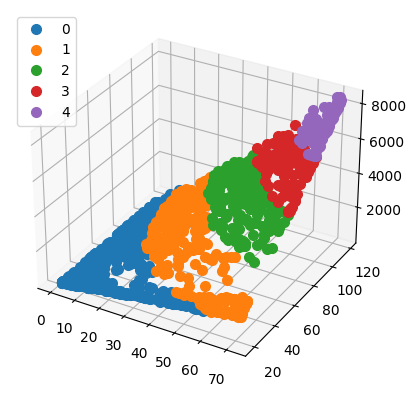

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection = '3d')

for name, group in groups_3d:
  ax.plot(group.tenure, group.MonthlyCharges, group.TotalCharges, marker = 'o', linestyle= '', ms=7, label=name)
ax.legend(numpoints = 1)

# Model Deployment

In [ ]:
#Saving and Uploading the model <leader model> to the H2O cluster
!pwd

/content


In [ ]:
#Saving the model
aml_leader = auto_model.leader
model_path = h2o.save_model(model=aml_leader, path = "/content/h2oModel/", force=True)
print(model_path)

/content/h2oModel/GLM_1_AutoML_1_20230330_83818


In [ ]:
#Downloading the model locally
local_model = h2o.download_model(aml_leader, path="/content/downloads/H2O")

In [ ]:
#Uploading the model to the H2O cluster 
uploaded_model = h2o.upload_model(local_model)